##  Обзор бизнес-показателей маркетплейса
Исполнитель: Хазанов Михаил

Дата: 27.08.2025

Цель: Проанализировать показатели маркетплейса.

Задачи:

Первичный анализ и сбор данных.

Обзор ключевых метрик.

Оценка метрик монетизации и юнит-экономики.

Поиск инсайтов и точек роста. Сегментация и формулирование гипотез.

Подготовка эксперимента и подведение его итогов.

## Описание событий

| Событие             | Описание                                                                                  |
|---------------------|-------------------------------------------------------------------------------------------|
| `page_view`         | Открытие любой страницы сайта или приложения пользователем.                                |
| `product_view`      | Просмотр страницы конкретного товара.                                                     |
| `product_click`     | Клик по товару (например, из списка товаров или на баннере).                              |
| `add_to_cart`       | Добавление товара в корзину.                                                              |
| `remove_from_cart`  | Удаление товара из корзины.                                                               |
| `search`            | Выполнение поиска по сайту или приложению.                                                |
| `filter_apply`      | Применение фильтра (например, по цене, бренду, категории).                                |
| `checkout_start`    | Начало оформления заказа (переход к оформлению корзины).                                  |
| `checkout_complete` | Завершение оформления заказа (не гарантирует покупку, покупка зависит от факта оплаты).                                          |
| `user_login`        | Вход пользователя в личный кабинет или аккаунт.                                           |
| `user_logout`       | Выход пользователя из аккаунта.                                                           |
| `wishlist_add`      | Добавление товара в список желаемого (wishlist).                                          |
| `category_view`     | Просмотр страницы категории товаров.                                                      |
| `banner_click`      | Клик по рекламному баннеру на сайте или в приложении.                                     |
| `promo_view`        | Просмотр промо-акции или специального предложения.                                        |


## Выручка маркетплейса = 5% от total_price

# Блок кода и расчета метрик

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind

In [2]:
pa_marketplace_orders = pd.read_csv('...')
pa_marketplace_campaign_costs = pd.read_csv('...')
pa_marketplace_users = pd.read_csv('...')
pa_marketplace_events = pd.read_csv('...')

### 2. Построить обзор ключевых метрик

На этом этапе вам нужно выполнить верхнеуровневую оценку состояния продукта с помощью собранных витрин. Бизнес просит просто оценить текущее состояние — без глубокой сегментации и оценки сложных метрик.

Выручка бизнеса — 5% комиссии от стоимости любой продажи.

Посмотрите на общую динамику ключевых метрик: например, Revenue, ARPU или ARPPU, MAU, WAU, DAU, AOV, Retention, CTR, CR в заказ. Следовать этому списку необязательно, исходите из данных.

Ваша цель — быстро получить целостную картину, не применяя сегментацию и не рассматривая глубокие срезы. Определите, соответствует ли продукт базовым ожиданиям, виден ли рост, есть ли тревожные сигналы.

Результатом задания будет ваш вывод о динамике основных продуктовых метрик.

In [3]:
pa_marketplace_orders.head()

,order_id,user_id,order_date,product_name,quantity,unit_price,total_price,category_name,order_week,order_month
0,1,3,2024-01-19 01:52:52.000,Шуруповерт,2,5539.13,11078.26,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
1,2,3,2024-01-19 01:52:52.000,Молоток слесарный,1,11340.38,11340.38,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
2,3,3,2024-01-19 01:52:52.000,Секатор садовый,2,10892.09,21784.18,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
3,4,3,2024-01-25 13:59:38.000,Шуруповерт,2,5539.13,11078.26,Инструменты и садовый инвентарь,2024-01-22,2024-01-01
4,5,3,2024-01-25 13:59:38.000,Чай черный,1,2099.59,2099.59,Продукты питания,2024-01-22,2024-01-01


In [4]:
pa_marketplace_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31357 entries, 0 to 31356
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       31357 non-null  int64  
 1   user_id        31357 non-null  int64  
 2   order_date     31357 non-null  object 
 3   product_name   31357 non-null  object 
 4   quantity       31357 non-null  int64  
 5   unit_price     31357 non-null  float64
 6   total_price    31357 non-null  float64
 7   category_name  31357 non-null  object 
 8   order_week     31357 non-null  object 
 9   order_month    31357 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 2.4+ MB


In [5]:
pa_marketplace_orders.duplicated().sum()

0

In [6]:
# Посмотрим уникальные значения в категории

print("\nУникальные значения:")
print(pa_marketplace_orders['category_name'].unique())



Уникальные значения:
['Инструменты и садовый инвентарь' 'Продукты питания' 'Женская одежда'
 'Аксессуары для гаджетов' 'Одежда для спорта' 'Декор и освещение'
 'Детская одежда' 'Детские игрушки' 'Книги и канцтовары'
 'Медицинские товары' 'Косметика и парфюмерия' 'Товары для туризма'
 'Сумки и аксессуары' 'Автотовары' 'Обувь мужская' 'Обувь женская'
 'Мужская одежда' 'Бытовая техника' 'Зоотовары' 'Товары для кухни'
 'Средства для ухода' 'Мебель для дома' 'Спортивный инвентарь'
 'Товары для новорожденных' 'Украшения и часы']


In [7]:
pa_marketplace_orders['order_date'] = pd.to_datetime(pa_marketplace_orders['order_date'])

In [8]:
pa_marketplace_campaign_costs.head()

,Unnamed: 0,acq_channel,spend_month,budget
0,0,Affiliate,2024-01-01,179343.3875
1,1,Affiliate,2024-02-01,175488.4875
2,2,Affiliate,2024-03-01,164543.4750
3,3,Affiliate,2024-04-01,186869.9750
4,4,Affiliate,2024-05-01,166443.7750


In [9]:
pa_marketplace_campaign_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   88 non-null     int64  
 1   acq_channel  88 non-null     object 
 2   spend_month  88 non-null     object 
 3   budget       88 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


In [10]:
pa_marketplace_campaign_costs.duplicated().sum()

0

In [11]:
# Посмотрим уникальные значения в канале привлечения
print("\nУникальные значения:")
print(pa_marketplace_campaign_costs['acq_channel'].unique())


Уникальные значения:
['Affiliate' 'Direct' 'Email Marketing' 'Social Media' 'Google Ads' 'SEO'
 'TikTok']


In [12]:
pa_marketplace_users.head()

,user_id,registration_date,age,gender,region,acq_channel,buyer_segment,cohort_week,cohort_month
0,1,2024-01-01 00:47:00,35,M,Москва,Google Ads,regular,2024-01-01,2024-01-01
1,2,2024-01-01 19:01:00,53,M,Москва,Email Marketing,rare,2024-01-01,2024-01-01
2,3,2024-01-01 04:13:00,66,F,Санкт-Петербург,Google Ads,regular,2024-01-01,2024-01-01
3,4,2024-01-01 17:18:00,58,M,Краснодар,Affiliate,one_time,2024-01-01,2024-01-01
4,5,2024-01-01 08:29:00,58,F,Другие регионы,Google Ads,regular,2024-01-01,2024-01-01


In [13]:
pa_marketplace_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44151 entries, 0 to 44150
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            44151 non-null  int64 
 1   registration_date  44151 non-null  object
 2   age                44151 non-null  int64 
 3   gender             44151 non-null  object
 4   region             44151 non-null  object
 5   acq_channel        44151 non-null  object
 6   buyer_segment      44151 non-null  object
 7   cohort_week        44151 non-null  object
 8   cohort_month       44151 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.0+ MB


In [14]:
pa_marketplace_users.duplicated().sum()

0

In [15]:
pa_marketplace_users['registration_date'] = pd.to_datetime(pa_marketplace_users['registration_date'])

In [16]:
# Посмотрим уникальные значения в регионе и сегменте покупателя
print("\nУникальные значения:")
print(pa_marketplace_users['region'].unique())
print(pa_marketplace_users['buyer_segment'].unique())


Уникальные значения:
['Москва' 'Санкт-Петербург' 'Краснодар' 'Другие регионы' 'Нижний Новгород'
 'Екатеринбург' 'Московская область' 'Новосибирск' 'Ростов-на-Дону']
['regular' 'rare' 'one_time' 'medium']


In [17]:
pa_marketplace_events.head()

,event_id,user_id,event_date,event_type,os,device,product_name,event_week,event_month
0,3132,100,2024-01-01,page_view,iOS,mobile,NaN,2024-01-01,2024-01-01
1,3133,100,2024-01-01,product_view,iOS,mobile,Шорты для тренировок,2024-01-01,2024-01-01
2,3134,100,2024-01-01,product_click,iOS,mobile,Куртка детская,2024-01-01,2024-01-01
3,3135,100,2024-01-01,add_to_cart,iOS,mobile,Балетки классические,2024-01-01,2024-01-01
4,3136,100,2024-01-01,checkout_start,iOS,mobile,NaN,2024-01-01,2024-01-01


In [18]:
pa_marketplace_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785859 entries, 0 to 785858
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   event_id      785859 non-null  int64 
 1   user_id       785859 non-null  int64 
 2   event_date    785859 non-null  object
 3   event_type    785859 non-null  object
 4   os            785859 non-null  object
 5   device        785859 non-null  object
 6   product_name  385740 non-null  object
 7   event_week    785859 non-null  object
 8   event_month   785859 non-null  object
dtypes: int64(2), object(7)
memory usage: 54.0+ MB


In [19]:
pa_marketplace_events.duplicated().sum()

0

In [20]:
pa_marketplace_events['event_date'] = pd.to_datetime(pa_marketplace_events['event_date'])

In [21]:
# Посмотрим уникальные значения в типе события, операционной системе и типе устройства
print("\nУникальные значения:")
print(pa_marketplace_events['event_type'].unique())
print(pa_marketplace_events['os'].unique())
print(pa_marketplace_events['device'].unique())


Уникальные значения:
['page_view' 'product_view' 'product_click' 'add_to_cart' 'checkout_start'
 'checkout_complete' 'user_logout' 'search' 'category_view' 'filter_apply'
 'promo_view' 'wishlist_add' 'user_login' 'banner_click'
 'remove_from_cart']
['iOS' 'Windows' 'macOS' 'Android']
['mobile' 'desktop' 'tablet']


In [22]:
# Выручка (5% от total_price)
pa_marketplace_orders['revenue'] = pa_marketplace_orders['total_price'] * 0.05
total_revenue = pa_marketplace_orders['revenue'].sum()
print(f"Общая выручка: {total_revenue:,.0f} руб.")

Общая выручка: 21,997,211 руб.


Посмотрели основные таблицы, дубликатов нет. Есть пропуски в таблице по событиям в столбце "Название товара", это связано с тем, что пользователи не добавили товар в корзину.

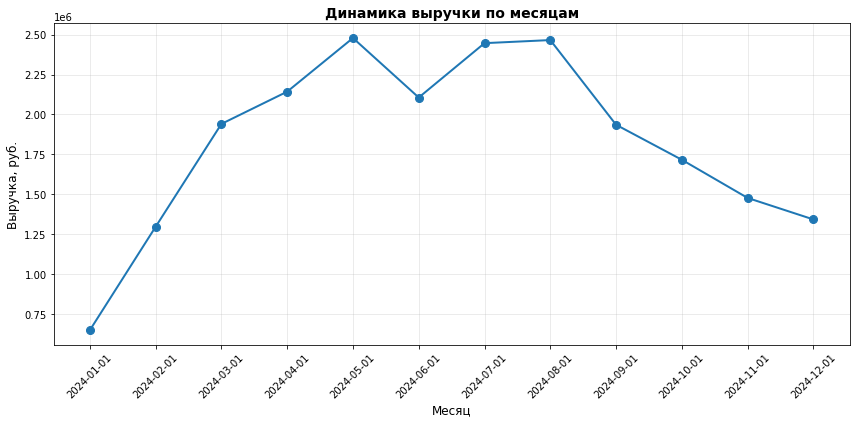

Выручка по месяцам:
   order_month       revenue revenue_formatted
0   2024-01-01  6.488900e+05           648,890
1   2024-02-01  1.296557e+06         1,296,557
2   2024-03-01  1.940750e+06         1,940,750
3   2024-04-01  2.142838e+06         2,142,838
4   2024-05-01  2.478758e+06         2,478,758
5   2024-06-01  2.106012e+06         2,106,012
6   2024-07-01  2.446535e+06         2,446,535
7   2024-08-01  2.465802e+06         2,465,802
8   2024-09-01  1.935367e+06         1,935,367
9   2024-10-01  1.716108e+06         1,716,108
10  2024-11-01  1.477100e+06         1,477,100
11  2024-12-01  1.342492e+06         1,342,492


In [23]:
# Выручка по месяцам
revenue_by_month = pa_marketplace_orders.groupby('order_month')['revenue'].sum().reset_index()
revenue_by_month['order_month'] = revenue_by_month['order_month'].astype(str)

# Форматирование чисел для вывода
revenue_by_month['revenue_formatted'] = revenue_by_month['revenue'].apply(lambda x: f"{x:,.0f}")

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(revenue_by_month['order_month'], revenue_by_month['revenue'], marker='o', linewidth=2, markersize=8)
plt.title('Динамика выручки по месяцам', fontsize=14, fontweight='bold')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Выручка, руб.', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Вывод данных
print("Выручка по месяцам:")
print(revenue_by_month)

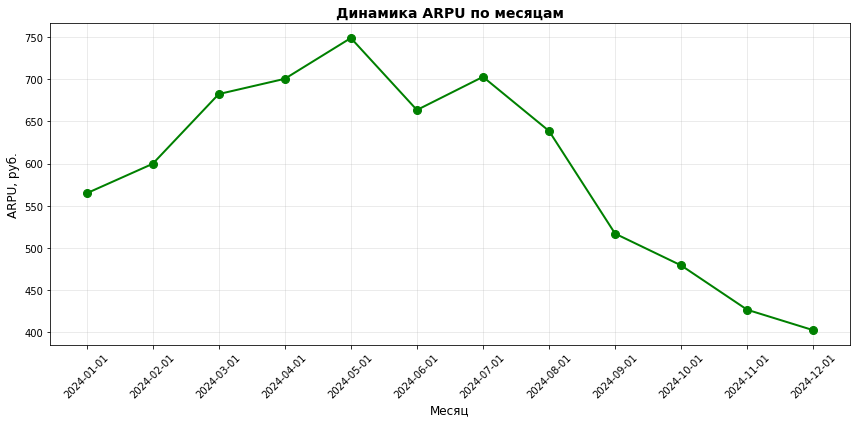

ARPU по месяцам:
2024-01-01: 565 руб. (Выручка: 648,890 руб., Пользователи: 1,149)
2024-02-01: 600 руб. (Выручка: 1,296,557 руб., Пользователи: 2,162)
2024-03-01: 682 руб. (Выручка: 1,940,750 руб., Пользователи: 2,844)
2024-04-01: 701 руб. (Выручка: 2,142,838 руб., Пользователи: 3,059)
2024-05-01: 749 руб. (Выручка: 2,478,758 руб., Пользователи: 3,310)
2024-06-01: 664 руб. (Выручка: 2,106,012 руб., Пользователи: 3,174)
2024-07-01: 703 руб. (Выручка: 2,446,535 руб., Пользователи: 3,481)
2024-08-01: 639 руб. (Выручка: 2,465,802 руб., Пользователи: 3,861)
2024-09-01: 517 руб. (Выручка: 1,935,367 руб., Пользователи: 3,744)
2024-10-01: 479 руб. (Выручка: 1,716,108 руб., Пользователи: 3,581)
2024-11-01: 427 руб. (Выручка: 1,477,100 руб., Пользователи: 3,462)
2024-12-01: 402 руб. (Выручка: 1,342,492 руб., Пользователи: 3,336)


In [24]:
# Уникальные пользователи по месяцам (по событиям)
users_by_month = pa_marketplace_events.groupby('event_month')['user_id'].nunique().reset_index()
users_by_month.columns = ['order_month', 'unique_users']

# Объединение данных
monthly_data = pd.merge(revenue_by_month, users_by_month, on='order_month', how='inner')

# Расчет ARPU
monthly_data['arpu'] = monthly_data['revenue'] / monthly_data['unique_users']
monthly_data['order_month'] = monthly_data['order_month'].astype(str)

# Визуализация ARPU
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['order_month'], monthly_data['arpu'], marker='o', linewidth=2, markersize=8, color='green')
plt.title('Динамика ARPU по месяцам', fontsize=14, fontweight='bold')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('ARPU, руб.', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Вывод данных
print("ARPU по месяцам:")
for index, row in monthly_data.iterrows():
    print(f"{row['order_month']}: {row['arpu']:.0f} руб. (Выручка: {row['revenue']:,.0f} руб., Пользователи: {row['unique_users']:,.0f})")

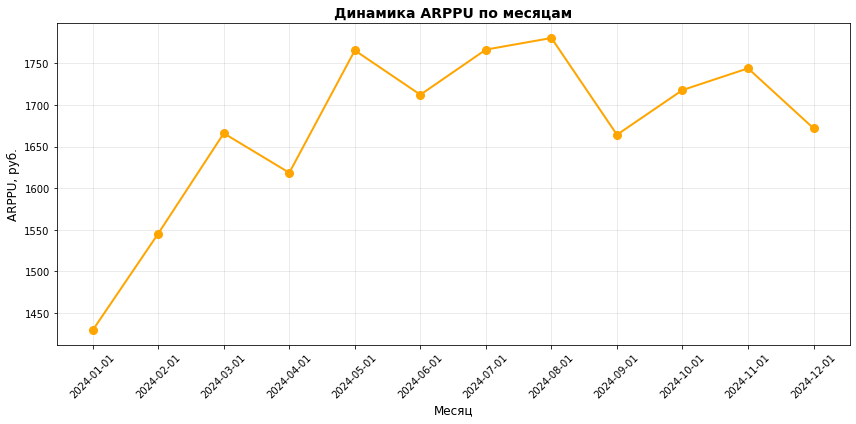

ARPPU по месяцам:
2024-01-01: 1429 руб. (Выручка: 648,890 руб., Платящие пользователи: 454)
2024-02-01: 1545 руб. (Выручка: 1,296,557 руб., Платящие пользователи: 839)
2024-03-01: 1666 руб. (Выручка: 1,940,750 руб., Платящие пользователи: 1,165)
2024-04-01: 1618 руб. (Выручка: 2,142,838 руб., Платящие пользователи: 1,324)
2024-05-01: 1765 руб. (Выручка: 2,478,758 руб., Платящие пользователи: 1,404)
2024-06-01: 1712 руб. (Выручка: 2,106,012 руб., Платящие пользователи: 1,230)
2024-07-01: 1766 руб. (Выручка: 2,446,535 руб., Платящие пользователи: 1,385)
2024-08-01: 1780 руб. (Выручка: 2,465,802 руб., Платящие пользователи: 1,385)
2024-09-01: 1664 руб. (Выручка: 1,935,367 руб., Платящие пользователи: 1,163)
2024-10-01: 1718 руб. (Выручка: 1,716,108 руб., Платящие пользователи: 999)
2024-11-01: 1744 руб. (Выручка: 1,477,100 руб., Платящие пользователи: 847)
2024-12-01: 1672 руб. (Выручка: 1,342,492 руб., Платящие пользователи: 803)


In [25]:
# Уникальные платящие пользователи по месяцам
paying_users_by_month = pa_marketplace_orders.groupby('order_month')['user_id'].nunique().reset_index()
paying_users_by_month.columns = ['order_month', 'paying_users']

# Объединение данных
monthly_data = pd.merge(revenue_by_month, paying_users_by_month, on='order_month', how='inner')

# Расчет ARPPU
monthly_data['arppu'] = monthly_data['revenue'] / monthly_data['paying_users']
monthly_data['order_month'] = monthly_data['order_month'].astype(str)

# Визуализация ARPPU
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['order_month'], monthly_data['arppu'], marker='o', linewidth=2, markersize=8, color='orange')
plt.title('Динамика ARPPU по месяцам', fontsize=14, fontweight='bold')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('ARPPU, руб.', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Вывод данных
print("ARPPU по месяцам:")
for index, row in monthly_data.iterrows():
    print(f"{row['order_month']}: {row['arppu']:.0f} руб. (Выручка: {row['revenue']:,.0f} руб., Платящие пользователи: {row['paying_users']:,.0f})")

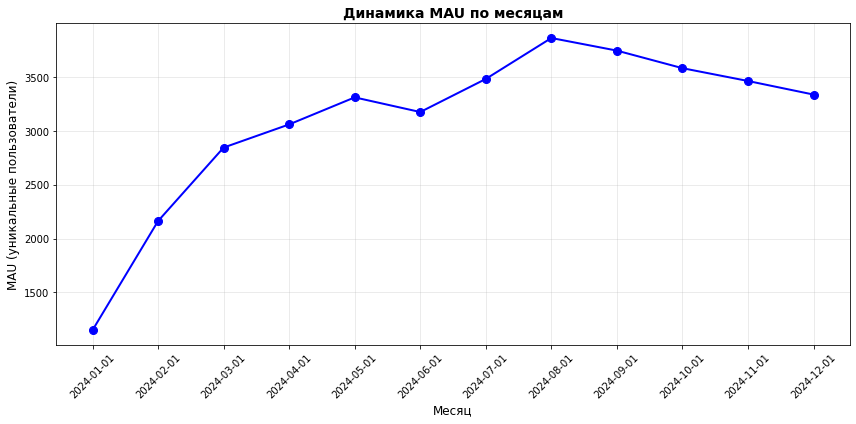

MAU по месяцам:
2024-01-01: 1,149 пользователей
2024-02-01: 2,162 пользователей
2024-03-01: 2,844 пользователей
2024-04-01: 3,059 пользователей
2024-05-01: 3,310 пользователей
2024-06-01: 3,174 пользователей
2024-07-01: 3,481 пользователей
2024-08-01: 3,861 пользователей
2024-09-01: 3,744 пользователей
2024-10-01: 3,581 пользователей
2024-11-01: 3,462 пользователей
2024-12-01: 3,336 пользователей


In [26]:
# Расчет MAU (уникальные пользователи по месяцам)
mau_by_month = pa_marketplace_events.groupby('event_month')['user_id'].nunique().reset_index()
mau_by_month.columns = ['month', 'mau']
mau_by_month['month'] = mau_by_month['month'].astype(str)

# Визуализация MAU
plt.figure(figsize=(12, 6))
plt.plot(mau_by_month['month'], mau_by_month['mau'], marker='o', linewidth=2, markersize=8, color='blue')
plt.title('Динамика MAU по месяцам', fontsize=14, fontweight='bold')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('MAU (уникальные пользователи)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Вывод данных
print("MAU по месяцам:")
for index, row in mau_by_month.iterrows():
    print(f"{row['month']}: {row['mau']:,.0f} пользователей")

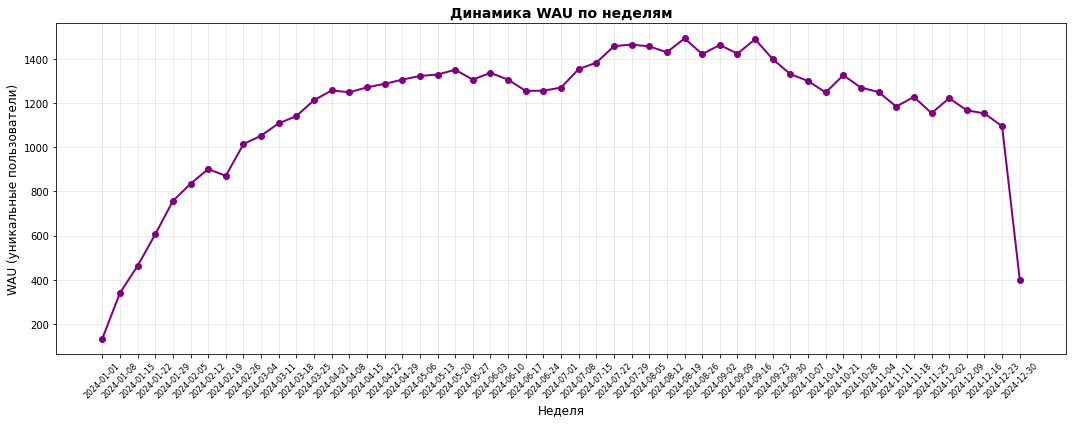

WAU по неделям (первые 10):
2024-01-01: 133 пользователей
2024-01-08: 340 пользователей
2024-01-15: 463 пользователей
2024-01-22: 606 пользователей
2024-01-29: 757 пользователей
2024-02-05: 835 пользователей
2024-02-12: 902 пользователей
2024-02-19: 871 пользователей
2024-02-26: 1,015 пользователей
2024-03-04: 1,053 пользователей

WAU по неделям (последние 10):
2024-10-28: 1,271 пользователей
2024-11-04: 1,251 пользователей
2024-11-11: 1,185 пользователей
2024-11-18: 1,229 пользователей
2024-11-25: 1,155 пользователей
2024-12-02: 1,223 пользователей
2024-12-09: 1,168 пользователей
2024-12-16: 1,154 пользователей
2024-12-23: 1,096 пользователей
2024-12-30: 401 пользователей


In [27]:
# Расчет WAU (уникальные пользователи по неделям)
wau_by_week = pa_marketplace_events.groupby('event_week')['user_id'].nunique().reset_index()
wau_by_week.columns = ['week', 'wau']
wau_by_week['week'] = wau_by_week['week'].astype(str)

# Визуализация WAU
plt.figure(figsize=(15, 6))
plt.plot(wau_by_week['week'], wau_by_week['wau'], marker='o', linewidth=2, markersize=6, color='purple')
plt.title('Динамика WAU по неделям', fontsize=14, fontweight='bold')
plt.xlabel('Неделя', fontsize=12)
plt.ylabel('WAU (уникальные пользователи)', fontsize=12)
plt.xticks(rotation=45, fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Вывод данных (первые и последние 10 значений для компактности)
print("WAU по неделям (первые 10):")
for index, row in wau_by_week.head(10).iterrows():
    print(f"{row['week']}: {row['wau']:,.0f} пользователей")

print("\nWAU по неделям (последние 10):")
for index, row in wau_by_week.tail(10).iterrows():
    print(f"{row['week']}: {row['wau']:,.0f} пользователей")

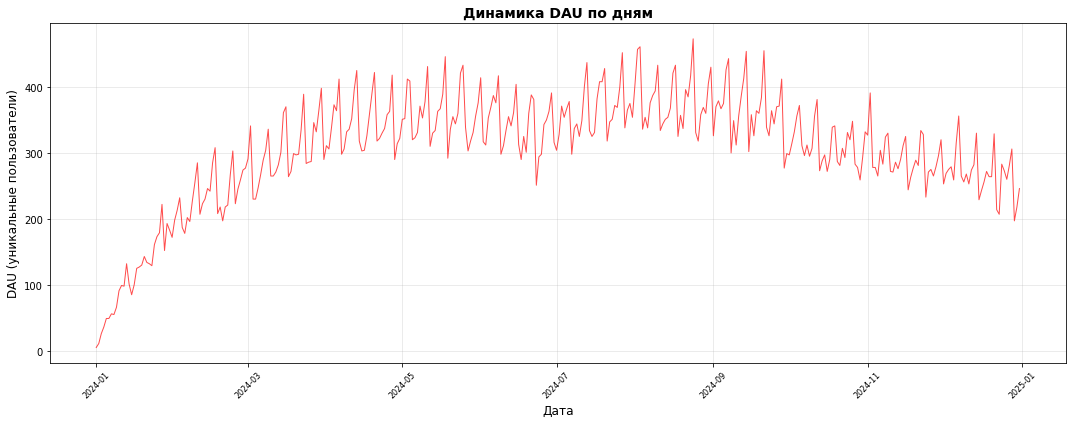

Средний DAU: 306 пользователей
Минимальный DAU: 5 пользователей
Максимальный DAU: 473 пользователей
Медианный DAU: 318 пользователей


In [28]:
# Расчет DAU (уникальные пользователи по дням)
dau_by_day = pa_marketplace_events.groupby(pa_marketplace_events['event_date'].dt.date)['user_id'].nunique().reset_index()
dau_by_day.columns = ['date', 'dau']

# Визуализация DAU
plt.figure(figsize=(15, 6))
plt.plot(dau_by_day['date'], dau_by_day['dau'], linewidth=1, color='red', alpha=0.7)
plt.title('Динамика DAU по дням', fontsize=14, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('DAU (уникальные пользователи)', fontsize=12)
plt.xticks(rotation=45, fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Вывод статистики
print(f"Средний DAU: {dau_by_day['dau'].mean():.0f} пользователей")
print(f"Минимальный DAU: {dau_by_day['dau'].min():.0f} пользователей")
print(f"Максимальный DAU: {dau_by_day['dau'].max():.0f} пользователей")
print(f"Медианный DAU: {dau_by_day['dau'].median():.0f} пользователей")

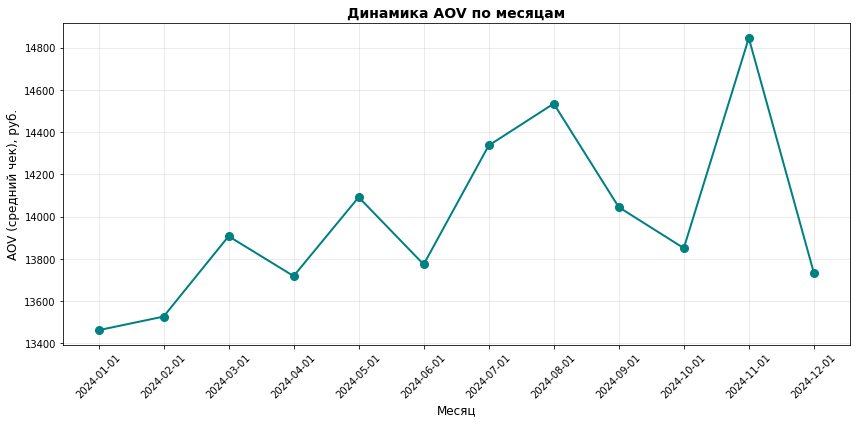

AOV по месяцам:
2024-01-01: 13,462 руб.
2024-02-01: 13,527 руб.
2024-03-01: 13,907 руб.
2024-04-01: 13,719 руб.
2024-05-01: 14,092 руб.
2024-06-01: 13,774 руб.
2024-07-01: 14,337 руб.
2024-08-01: 14,535 руб.
2024-09-01: 14,045 руб.
2024-10-01: 13,851 руб.
2024-11-01: 14,845 руб.
2024-12-01: 13,734 руб.


In [29]:
# Расчет AOV по месяцам (средний чек = среднее total_price)
aov_by_month = pa_marketplace_orders.groupby('order_month')['total_price'].mean().reset_index()
aov_by_month['order_month'] = aov_by_month['order_month'].astype(str)

# Визуализация AOV
plt.figure(figsize=(12, 6))
plt.plot(aov_by_month['order_month'], aov_by_month['total_price'], marker='o', linewidth=2, markersize=8, color='teal')
plt.title('Динамика AOV по месяцам', fontsize=14, fontweight='bold')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('AOV (средний чек), руб.', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Вывод данных
print("AOV по месяцам:")
for index, row in aov_by_month.iterrows():
    print(f"{row['order_month']}: {row['total_price']:,.0f} руб.")

In [30]:
# Количество уникальных пользователей, которые совершили хотя бы один заказ
paying_users = pa_marketplace_orders['user_id'].nunique()

# Общее количество уникальных пользователей в системе
total_users = pa_marketplace_users['user_id'].nunique()

# CR = (платящие пользователи / все пользователи) * 100%
cr = (paying_users / total_users) * 100

# Вывод данных по конверсии с заказом
print(f"Конверсия в заказ (CR): {cr:.2f}%")
print(f"Платящие пользователи: {paying_users:,}")
print(f"Всего пользователей: {total_users:,}")

Конверсия в заказ (CR): 20.21%
Платящие пользователи: 8,922
Всего пользователей: 44,151


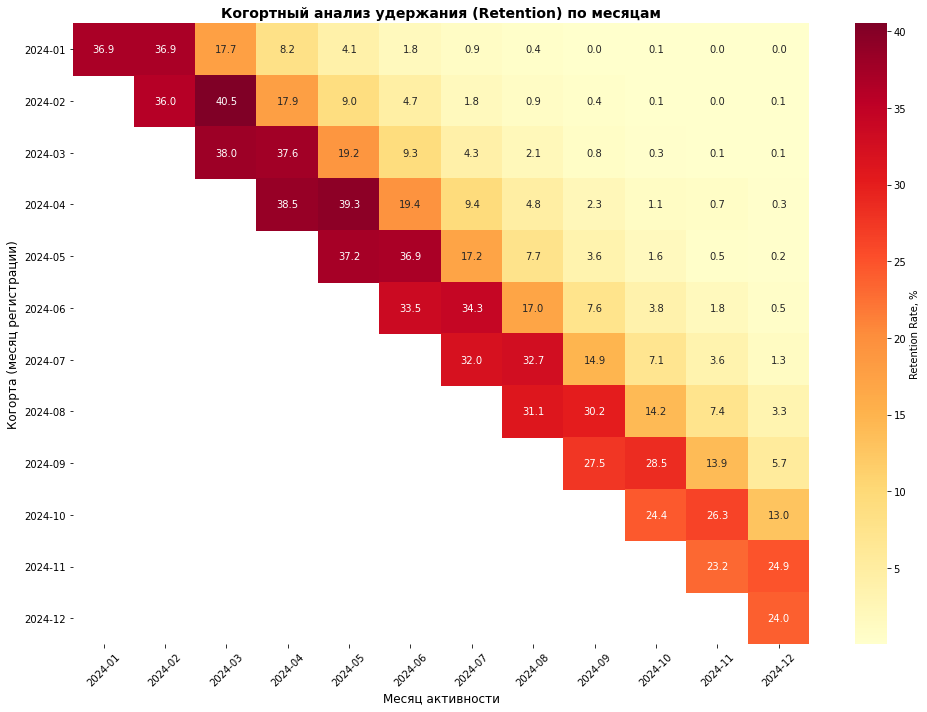

In [31]:
# Рассчитываем Retention (удержание)
# Создаем когорты по месяцу регистрации из таблицы users
pa_marketplace_users['cohort_month'] = pa_marketplace_users['registration_date'].dt.to_period('M')

# Определяем месяц активности для каждого события
pa_marketplace_events['activity_month'] = pa_marketplace_events['event_date'].dt.to_period('M')

# Объединяем пользователей с их событиями
# Используем left merge, чтобы сохранить всех зарегистрированных пользователей из users,
# даже если у них нет событий в events.
df_combined = pa_marketplace_users.merge(pa_marketplace_events[['user_id', 'activity_month']], on='user_id', how='left')

# Создаем сводную таблицу: строки - когорты, столбцы - месяцы активности
cohort_data = df_combined.groupby(['cohort_month', 'activity_month']).agg({
    'user_id': 'nunique'
}).reset_index()

# Переименовываем столбцы для ясности
cohort_data.columns = ['cohort_month', 'activity_month', 'user_count']

# Добавляем размер когорты (количество пользователей в момент регистрации)
cohort_sizes = df_combined.groupby('cohort_month')['user_id'].nunique().reset_index()
cohort_sizes.columns = ['cohort_month', 'cohort_size']

# Объединяем с размерами когорт
cohort_data = cohort_data.merge(cohort_sizes, on='cohort_month')

# Рассчитываем retention rate
cohort_data['retention_rate'] = (cohort_data['user_count'] / cohort_data['cohort_size']) * 100

# Создаем сводную таблицу для визуализации
retention_pivot = cohort_data.pivot_table(
    index='cohort_month', 
    columns='activity_month', 
    values='retention_rate'
)

# Визуализация heatmap retention
plt.figure(figsize=(14, 10))
sns.heatmap(retention_pivot, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Retention Rate, %'})
plt.title('Когортный анализ удержания (Retention) по месяцам', fontsize=14, fontweight='bold')
plt.xlabel('Месяц активности', fontsize=12)
plt.ylabel('Когорта (месяц регистрации)', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



Выручка растет с января по август, далее видим снижение к декабрю, от пиковых значений мая и июля к декабрю почти в 2 раза (с 2.4 млн до 1.3 млн)

По среднему чеку снижение идет с мая также почти в 2 раза, с 750 до 400 рублей.

При этом снижение среднего чека на платящего пользователя не такое существенное - с 1750 до 1650 рублей.

Число ежемесячно активных пользователей растет с января (1100) до мая (3300), после динамика до конца года 3700 → 3300.

Пик ежедневно активных пользователей растет с начала года, пик с мая по октябрь (300-450), далее снижение до 200-300.

Средняя конверсия в заказ составляет по году всего 20% пользователей от пришедших.

По удержанию пользователей в первый месяц в январе-мае видим 36-38%, далее снижение на 1.5-3% в месяц и в целом снижение до 24% к концу года.


### 3. Оценка метрик монетизации и юнит-экономики

Выполните анализ монетизации. Определите, сколько зарабатывает продукт и сколько тратит на привлечение.

Важны как агрегированные метрики (ARPU, AOV), так и показатели эффективности (CAC, ROI, Payback Period).

Сформулируйте первые выводы по результатам анализа метрик. Сделайте это в формате записки для заказчика. Изложите все основные результаты так, чтобы прослеживалась связь между мыслями. Не пишите много — заказчик не будет читать записку полностью, а просто просмотрит.

Напишите выводы в конце блока, чтобы заказчик мог быстро ознакомиться с основными результатами.

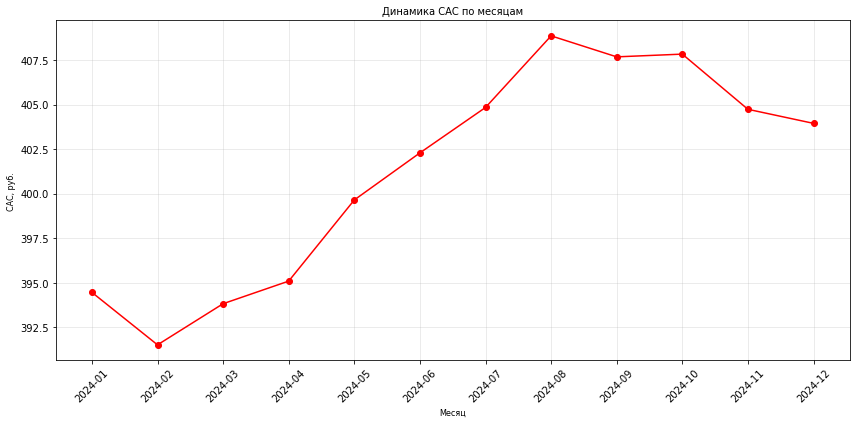

Средний CAC за период: 401.23 руб.

CAC по месяцам:
2024-01: 394.46 руб. (Затраты: 1,177,457 руб., Пользователи: 2985)
2024-02: 391.51 руб. (Затраты: 1,061,386 руб., Пользователи: 2711)
2024-03: 393.82 руб. (Затраты: 1,167,680 руб., Пользователи: 2965)
2024-04: 395.09 руб. (Затраты: 1,147,740 руб., Пользователи: 2905)
2024-05: 399.65 руб. (Затраты: 1,225,322 руб., Пользователи: 3066)
2024-06: 402.29 руб. (Затраты: 1,130,440 руб., Пользователи: 2810)
2024-07: 404.84 руб. (Затраты: 1,776,447 руб., Пользователи: 4388)
2024-08: 408.86 руб. (Затраты: 1,811,678 руб., Пользователи: 4431)
2024-09: 407.68 руб. (Затраты: 1,820,719 руб., Пользователи: 4466)
2024-10: 407.84 руб. (Затраты: 1,810,803 руб., Пользователи: 4440)
2024-11: 404.74 руб. (Затраты: 1,773,970 руб., Пользователи: 4383)
2024-12: 403.95 руб. (Затраты: 1,858,570 руб., Пользователи: 4601)


In [32]:
# Преобразование дат
pa_marketplace_users['registration_date'] = pd.to_datetime(pa_marketplace_users['registration_date'])
pa_marketplace_users['reg_month'] = pa_marketplace_users['registration_date'].dt.to_period('M')

pa_marketplace_campaign_costs['spend_month'] = pd.to_datetime(pa_marketplace_campaign_costs['spend_month'])
pa_marketplace_campaign_costs['spend_month_period'] = pa_marketplace_campaign_costs['spend_month'].dt.to_period('M')

# Расчет CAC по месяцам
# Затраты на привлечение по месяцам
monthly_spend = pa_marketplace_campaign_costs.groupby('spend_month_period')['budget'].sum().reset_index()
monthly_spend.columns = ['month', 'total_spend']

# Количество привлеченных пользователей по месяцам
monthly_users = pa_marketplace_users.groupby('reg_month')['user_id'].nunique().reset_index()
monthly_users.columns = ['month', 'user_count']

# Объединение данных и расчет CAC
monthly_cac = monthly_spend.merge(monthly_users, on='month', how='outer').fillna(0)
monthly_cac['cac'] = monthly_cac['total_spend'] / monthly_cac['user_count']
monthly_cac['cac'] = monthly_cac['cac'].replace([float('inf'), -float('inf')], 0)
monthly_cac['month_str'] = monthly_cac['month'].astype(str)

# Исключаем январь 2025
monthly_cac_filtered = monthly_cac[monthly_cac['month_str'] != '2025-01']

# Визуализация динамики CAC
plt.figure(figsize=(12, 6))
plt.plot(monthly_cac_filtered['month_str'], monthly_cac_filtered['cac'], 
         marker='o', color='red')
plt.title('Динамика CAC по месяцам', fontsize=10)
plt.xlabel('Месяц', fontsize=8)
plt.ylabel('CAC, руб.', fontsize=8)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Средний CAC за период (без января 2025)
avg_cac = monthly_cac_filtered[monthly_cac_filtered['user_count'] > 0]['cac'].mean()
print(f"Средний CAC за период: {avg_cac:.2f} руб.")

# Вывод данных
print("\nCAC по месяцам:")
print("=" * 50)
for index, row in monthly_cac_filtered.iterrows():
    if row['user_count'] > 0:  # Показываем только месяцы с пользователями
        print(f"{row['month_str']}: {row['cac']:.2f} руб. (Затраты: {row['total_spend']:,.0f} руб., Пользователи: {row['user_count']:.0f})")

LTV по месяцам регистрации:
2024-01: 705.22 руб. (Выручка: 2,105,090 руб., Пользователи: 2,985)
2024-02: 757.17 руб. (Выручка: 2,052,689 руб., Пользователи: 2,711)
2024-03: 837.08 руб. (Выручка: 2,481,938 руб., Пользователи: 2,965)
2024-04: 845.67 руб. (Выручка: 2,456,668 руб., Пользователи: 2,905)
2024-05: 732.77 руб. (Выручка: 2,246,674 руб., Пользователи: 3,066)
2024-06: 673.08 руб. (Выручка: 1,891,358 руб., Пользователи: 2,810)
2024-07: 565.34 руб. (Выручка: 2,480,705 руб., Пользователи: 4,388)
2024-08: 425.01 руб. (Выручка: 1,883,228 руб., Пользователи: 4,431)
2024-09: 323.86 руб. (Выручка: 1,446,349 руб., Пользователи: 4,466)
2024-10: 249.41 руб. (Выручка: 1,107,371 руб., Пользователи: 4,440)
2024-11: 183.34 руб. (Выручка: 803,596 руб., Пользователи: 4,383)
2024-12: 85.47 руб. (Выручка: 393,244 руб., Пользователи: 4,601)

Средний LTV: 531.95 руб.


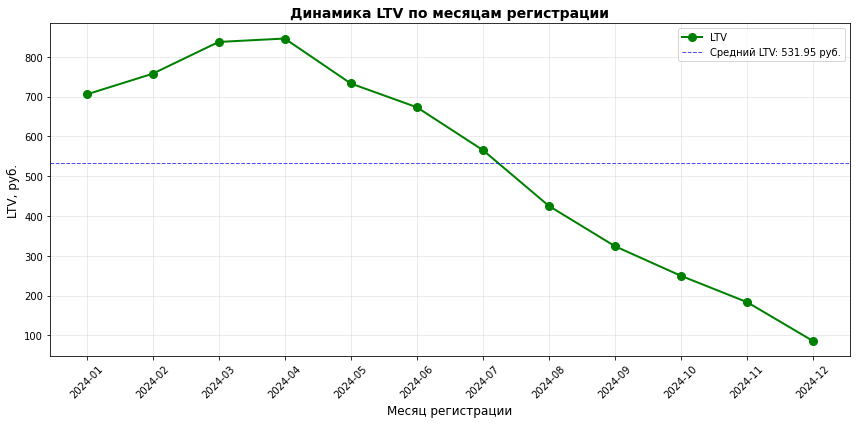

In [33]:
# Объединяем пользователей с их заказами
users_orders = pa_marketplace_users[['user_id', 'reg_month']].merge(
    pa_marketplace_orders[['user_id', 'order_date', 'revenue']], 
    on='user_id', 
    how='left'
)

# Определяем месяц заказа
users_orders['order_month'] = users_orders['order_date'].dt.to_period('M')

# Расчет LTV по месяцам регистрации
# Группировка по месяцу регистрации и расчет общей выручки
ltv_by_cohort = users_orders.groupby('reg_month').agg({
    'revenue': 'sum',
    'user_id': 'nunique'
}).reset_index()

# Переименовываем столбцы
ltv_by_cohort.columns = ['reg_month', 'total_revenue', 'user_count']

# Расчет LTV
ltv_by_cohort['ltv'] = ltv_by_cohort['total_revenue'] / ltv_by_cohort['user_count']
ltv_by_cohort['reg_month_str'] = ltv_by_cohort['reg_month'].astype(str)

# Исключаем январь 2025 (неполный месяц)
ltv_by_cohort_filtered = ltv_by_cohort[ltv_by_cohort['reg_month_str'] != '2025-01']

# Вывод данных
print("LTV по месяцам регистрации:")
print("=" * 60)
for index, row in ltv_by_cohort_filtered.iterrows():
    print(f"{row['reg_month_str']}: {row['ltv']:.2f} руб. (Выручка: {row['total_revenue']:,.0f} руб., Пользователи: {row['user_count']:,.0f})")

# Средний LTV
avg_ltv = ltv_by_cohort_filtered['ltv'].mean()
print(f"\nСредний LTV: {avg_ltv:.2f} руб.")

# Визуализация LTV по месяцам
plt.figure(figsize=(12, 6))
plt.plot(ltv_by_cohort_filtered['reg_month_str'], ltv_by_cohort_filtered['ltv'], 
         marker='o', linewidth=2, markersize=8, color='green', label='LTV')
plt.axhline(y=avg_ltv, color='blue', linestyle='--', linewidth=1, alpha=0.7, label=f'Средний LTV: {avg_ltv:.2f} руб.')
plt.title('Динамика LTV по месяцам регистрации', fontsize=14, fontweight='bold')
plt.xlabel('Месяц регистрации', fontsize=12)
plt.ylabel('LTV, руб.', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()



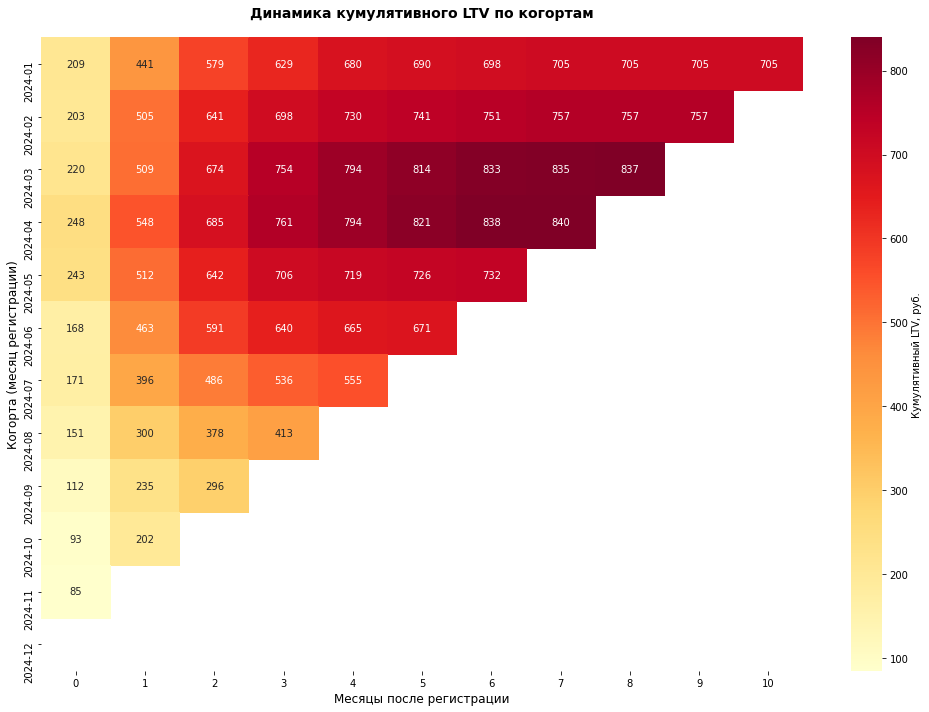

In [34]:
# Создание когорт по месяцу регистрации
pa_marketplace_users['cohort_month'] = pa_marketplace_users['registration_date'].dt.to_period('M')

# Расчет выручки (5% от total_price)
pa_marketplace_orders['revenue'] = pa_marketplace_orders['total_price'] * 0.05

# Объединение данных: пользователи с их заказами и датами
users_orders = pa_marketplace_users[['user_id', 'cohort_month']].merge(
    pa_marketplace_orders[['user_id', 'order_date', 'revenue']], 
    on='user_id', 
    how='left'
)

# Определение месяца заказа
users_orders['order_month'] = users_orders['order_date'].dt.to_period('M')

# Расчет разницы в месяцах между регистрацией и покупкой
def month_diff(cohort, order_month):
    if pd.isna(cohort) or pd.isna(order_month):
        return None
    return (order_month - cohort).n

users_orders['month_diff'] = users_orders.apply(
    lambda row: month_diff(row['cohort_month'], row['order_month']), 
    axis=1
)

# Удаление строк с None и преобразование в int
users_orders = users_orders.dropna(subset=['month_diff'])
users_orders['month_diff'] = users_orders['month_diff'].astype(int)

# Расчет кумулятивного LTV по когортам
# Группировка по когорте и месяцу после регистрации
cohort_ltv = users_orders.groupby(['cohort_month', 'month_diff'])['revenue'].sum().reset_index()

# Получение размера когорт
cohort_sizes = pa_marketplace_users.groupby('cohort_month')['user_id'].nunique().reset_index()
cohort_sizes.columns = ['cohort_month', 'cohort_size']

# Объединение с размерами когорт
cohort_ltv = cohort_ltv.merge(cohort_sizes, on='cohort_month')

# Расчет выручки на пользователя
cohort_ltv['revenue_per_user'] = cohort_ltv['revenue'] / cohort_ltv['cohort_size']

# Создание кумулятивного LTV
cohort_ltv_pivot = cohort_ltv.pivot_table(
    index='cohort_month', 
    columns='month_diff', 
    values='revenue_per_user'
).fillna(0)

# Расчет кумулятивных сумм
cohort_ltv_cumulative = cohort_ltv_pivot.cumsum(axis=1)

# Исключаем январь 2025 (неполный месяц)
cohort_ltv_cumulative_filtered = cohort_ltv_cumulative[cohort_ltv_cumulative.index != '2025-01']

# Создание "прямоугольного треугольника" - оставляем только реальные данные
# Для каждой когорты оставляем только те месяцы, которые уже прошли
cohort_ltv_triangle = cohort_ltv_cumulative_filtered.copy()

# Создаем маску для "треугольника" - скрываем будущие месяцы
for i, cohort in enumerate(cohort_ltv_triangle.index):
    # Определяем максимальный месяц для данной когорты
    max_month = len(cohort_ltv_triangle.columns) - i - 1
    if max_month < len(cohort_ltv_triangle.columns):
        # Заполняем NaN значения после максимального месяца
        for j in range(max_month + 1, len(cohort_ltv_triangle.columns)):
            cohort_ltv_triangle.loc[cohort, j] = np.nan

# Визуализация динамики кумулятивного LTV в виде "прямоугольного треугольника"
plt.figure(figsize=(14, 10))
mask = np.isnan(cohort_ltv_triangle)
sns.heatmap(cohort_ltv_triangle, 
            annot=True, 
            fmt='.0f', 
            cmap='YlOrRd', 
            cbar_kws={'label': 'Кумулятивный LTV, руб.'},
            mask=mask)
plt.title('Динамика кумулятивного LTV по когортам', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Месяцы после регистрации', fontsize=12)
plt.ylabel('Когорта (месяц регистрации)', fontsize=12)
plt.tight_layout()
plt.show()

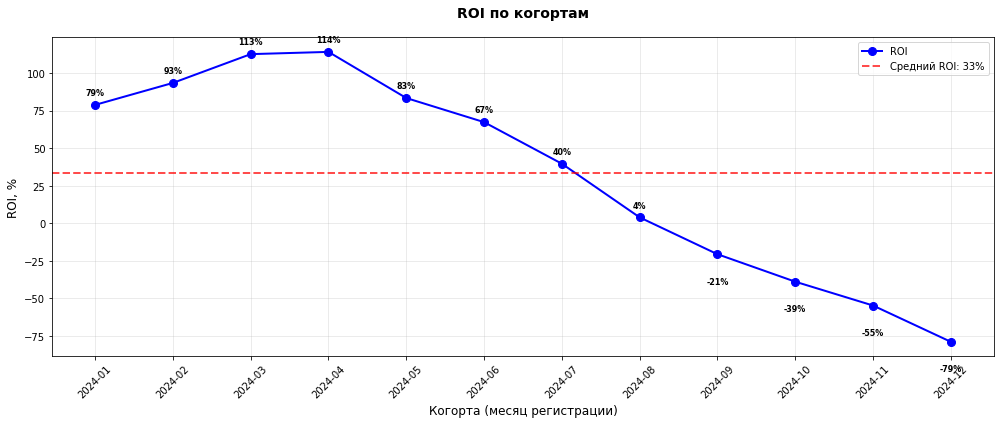

ROI по когортам:
2024-01: ROI = 79% (LTV: 705 руб., CAC: 394 руб.)
2024-02: ROI = 93% (LTV: 757 руб., CAC: 392 руб.)
2024-03: ROI = 113% (LTV: 837 руб., CAC: 394 руб.)
2024-04: ROI = 114% (LTV: 846 руб., CAC: 395 руб.)
2024-05: ROI = 83% (LTV: 733 руб., CAC: 400 руб.)
2024-06: ROI = 67% (LTV: 673 руб., CAC: 402 руб.)
2024-07: ROI = 40% (LTV: 565 руб., CAC: 405 руб.)
2024-08: ROI = 4% (LTV: 425 руб., CAC: 409 руб.)
2024-09: ROI = -21% (LTV: 324 руб., CAC: 408 руб.)
2024-10: ROI = -39% (LTV: 249 руб., CAC: 408 руб.)
2024-11: ROI = -55% (LTV: 183 руб., CAC: 405 руб.)
2024-12: ROI = -79% (LTV: 85 руб., CAC: 404 руб.)


In [35]:
# Создание когорт
pa_marketplace_users['cohort_month'] = pa_marketplace_users['registration_date'].dt.to_period('M')

# Расчет CAC по когортам
monthly_spend = pa_marketplace_campaign_costs.groupby(pa_marketplace_campaign_costs['spend_month'].dt.to_period('M'))['budget'].sum().reset_index()
monthly_spend.columns = ['cohort_month', 'total_spend']

monthly_users = pa_marketplace_users.groupby('cohort_month')['user_id'].nunique().reset_index()
monthly_users.columns = ['cohort_month', 'user_count']

cac_data = monthly_spend.merge(monthly_users, on='cohort_month', how='outer').fillna(0)
cac_data['cac'] = cac_data['total_spend'] / cac_data['user_count']
cac_data['cac'] = cac_data['cac'].replace([float('inf'), -float('inf')], 0)

# Расчет LTV по когортам
users_orders = pa_marketplace_users[['user_id', 'cohort_month']].merge(
    pa_marketplace_orders[['user_id', 'revenue']], 
    on='user_id', 
    how='left'
)

ltv_data = users_orders.groupby('cohort_month').agg({
    'revenue': 'sum',
    'user_id': 'nunique'
}).reset_index()

ltv_data.columns = ['cohort_month', 'total_revenue', 'user_count']
ltv_data['ltv'] = ltv_data['total_revenue'] / ltv_data['user_count']

# Объединение данных и расчет ROI
roi_cohorts = cac_data[['cohort_month', 'cac']].merge(
    ltv_data[['cohort_month', 'ltv']], 
    on='cohort_month', 
    how='inner'
)

roi_cohorts['roi'] = ((roi_cohorts['ltv'] - roi_cohorts['cac']) / roi_cohorts['cac']) * 100
roi_cohorts['roi'] = roi_cohorts['roi'].replace([float('inf'), -float('inf')], np.nan)
roi_cohorts = roi_cohorts.dropna(subset=['roi'])

# Исключаем январь 2025
roi_cohorts_filtered = roi_cohorts[roi_cohorts['cohort_month'].astype(str) != '2025-01']

# Линейный график ROI по когортам
plt.figure(figsize=(14, 6))
x_positions = range(len(roi_cohorts_filtered))
line = plt.plot(x_positions, roi_cohorts_filtered['roi'], 
                marker='o', linewidth=2, markersize=8, color='blue', label='ROI')

# Добавление значений на точки
for i, (x, roi_value) in enumerate(zip(x_positions, roi_cohorts_filtered['roi'])):
    plt.text(x, roi_value + (5 if roi_value > 0 else -15),
             f'{roi_value:.0f}%', ha='center', va='bottom' if roi_value > 0 else 'top', 
             fontweight='bold', fontsize=8)

avg_roi = roi_cohorts_filtered['roi'].mean()
plt.axhline(y=avg_roi, color='red', linestyle='--', linewidth=2, alpha=0.7,
            label=f'Средний ROI: {avg_roi:.0f}%')

plt.title('ROI по когортам', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Когорта (месяц регистрации)', fontsize=12)
plt.ylabel('ROI, %', fontsize=12)
plt.xticks(x_positions, roi_cohorts_filtered['cohort_month'].astype(str), rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Вывод данных
print("ROI по когортам:")
print("=" * 40)
for index, row in roi_cohorts_filtered.iterrows():
    print(f"{row['cohort_month']}: ROI = {row['roi']:.0f}% (LTV: {row['ltv']:.0f} руб., CAC: {row['cac']:.0f} руб.)")


CAC по году составляет 390-405 рублей, практически не меняется в течение года.

По LTV когорты первых месяцев суммарно приносят 700-840 рублей, потом с мая идет устойчивое падение. 

А посколько LTV c апреля по декабрь LTV падает, а CAC примерно на одном уровне, то ROI соответственно падает пропорционально LTV, с пиковых значений 114% падает до -79%. 

## Выводы по этапам 2 и 3


Представьте ключевые выводы в текстовом виде здесь или приложите ссылку на документ с презентацией.

Не забудьте предоставить доступ на просмотр и комментирование документа.

Были изучены ключевые метрики.

Выручка растет с января по август, далее видим снижение к декабрю, от пиковых значений мая и июля к декабрю почти в 2 раза (с 2.4 млн до 1.3 млн)

По среднему чеку снижение идет с мая также почти в 2 раза, с 750 до 400 рублей.

При этом снижение среднего чека на платящего пользователя не такое существенное - с 1750 до 1650 рублей.

Число ежемесячно активных пользователей растет с января (1100) до мая (3300), после динамика до конца года 3700 → 3300.

Пик ежедневно активных пользователей растет с начала года, пик с мая по октябрь (300-450), далее снижение до 200-300.

Средняя конверсия в заказ составляет по году всего 20% пользователей от пришедших.

По удержанию пользователей в первый месяц в январе-мае видим 36-38%, далее снижение на 1.5-3% в месяц и в целом снижение до 24% к концу года.

CAC по году составляет 390-405 рублей, практически не меняется в течение года.

По LTV когорты первых месяцев суммарно приносят 700-840 рублей, потом с мая идет устойчивое падение. 

А посколько LTV c апреля по декабрь LTV падает, а CAC примерно на одном уровне, то ROI соответственно падает пропорционально LTV, с пиковых значений 114% падает до -79%. 

Поскольку сейчас изучены общие показатели, то теперь нужно переходить от общей картины к точечным наблюдениям. И изучить детально данные: по каналам, сегментам пользователей, категориям товаров, регионам, типам устройств.

<div class="alert alert-success">
<b>👍 Успех:</b> Молодец, что замечаешь спад во второй половине периода (осень–зима), причины могут быть разные: изменение вовлечённости пользователей или технические сложности.

Дополнительно стоит посмотреть:
- динамику регистраций новых пользователей, чтобы понять, как менялась база;
- метрики по источнкам привлечения, что бы понять, где проблема
    
    
Раз мы видим снижение выручки и второстепенных метрик, то и монетизацию стоит смотреть в динамике
При расчёте ROI и времени окупаемости лучше использовать когортный подход, где пользователи группируются по дате регистрации. Такой подход точнее отражает возврат инвестиций и позволяет оценить, когда вложения начинают окупаться, поскольку САС считается в этом разрезе .

<font color='#2d3e16'>Посмотри, пожалуйста, пример визуализации с когортным ROI:

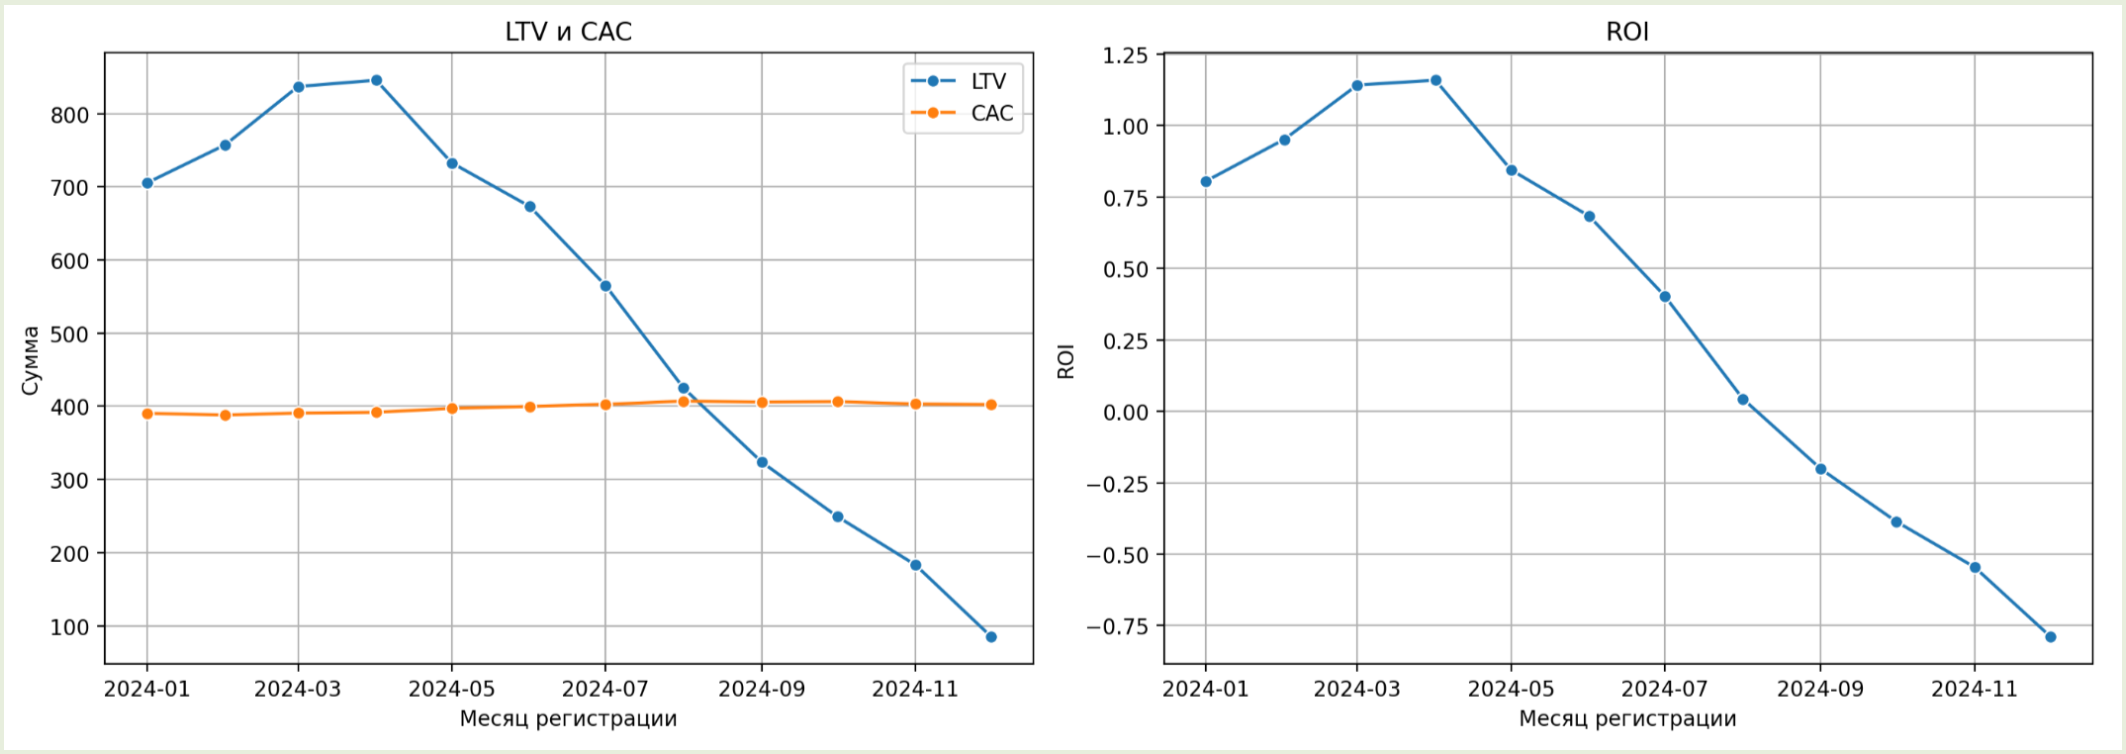
    
<font color='#2d3e16'>А поскольку у нас нет данных о горизонте событий, то по ROI лучше построить тепловую карту. Вот пример расчета периода окупаемости через тепловую карту:

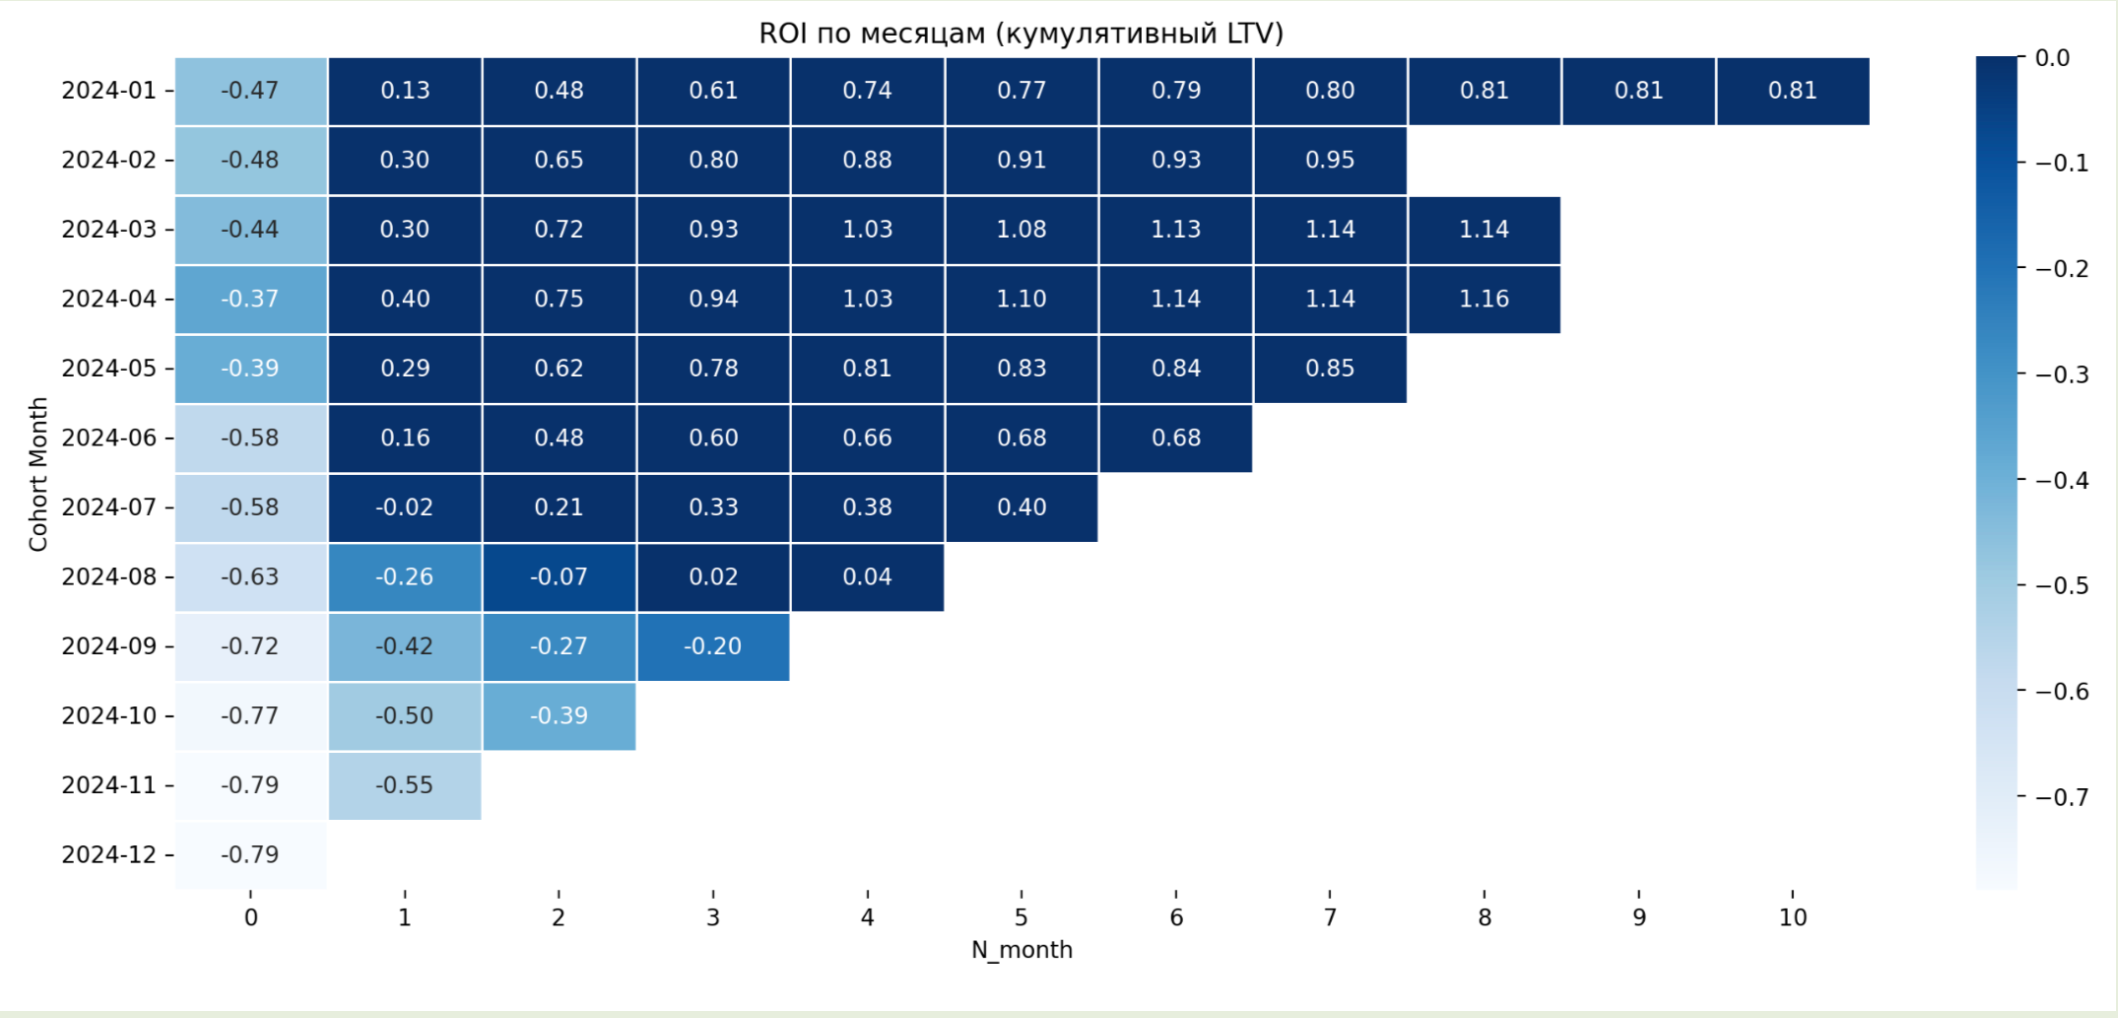
    

<font color='#2d3e16'>Снижение выручки происходит на фоне падения удержания и конверсии, несмотря на рост привлечения. Это указывает на проблему качества трафика. 
</div>

## 4. Поиск инсайтов, точек роста и сегментация


После того как вы провели верхнеуровневую оценку данных, самое время переходить от общей картины к точечным наблюдениям. Посмотрите вглубь данных: по каналам,
сегментам пользователей, категориям товаров, регионам, типам устройств. Ищите
закономерности, различия, аномалии.

Цель — сформировать обоснованные гипотезы:

* какие сегменты работают лучше остальных
* какие сегменты работают хуже остальных
* на каких этапах воронки теряются пользователи
* какие группы можно или нужно масштабировать
* куда стоит инвестировать больше внимания или ресурсов

По итогам анализа также:

* сформулируйте в виде аналитической записки выводы
* сформулируйте несколько гипотез, которые помогут развить продукт. Например: «Если предлагать клиентам на iOS персонализированные скидки, то они станут чаще конвертировать в продукт». При формулировании гипотез опишите, на что вы опираетесь при её формировании. Например, на динамику метрики или на взаимосвязь метрик.

Напишите выводы в конце блока, чтобы заказчик мог быстро ознакомиться с основными результатами.
Отправьте работу на проверку ревьюеру. Ревьюер будет проверять корректность выводов и гипотез, а не сам код расчета, поэтому проверьте, что у вас есть выводы по каждому из блоков в предназначенном для этого месте.
После завершения ревью вы получите от ревьюера новые вводные и задачу от бизнеса.


Выручка по каналам привлечения:
Google Ads: 8,236,760 руб.
Affiliate: 6,735,815 руб.
Social Media: 3,000,255 руб.
SEO: 1,909,935 руб.
TikTok: 910,448 руб.
Email Marketing: 555,699 руб.

Общая выручка: 21,348,911 руб.


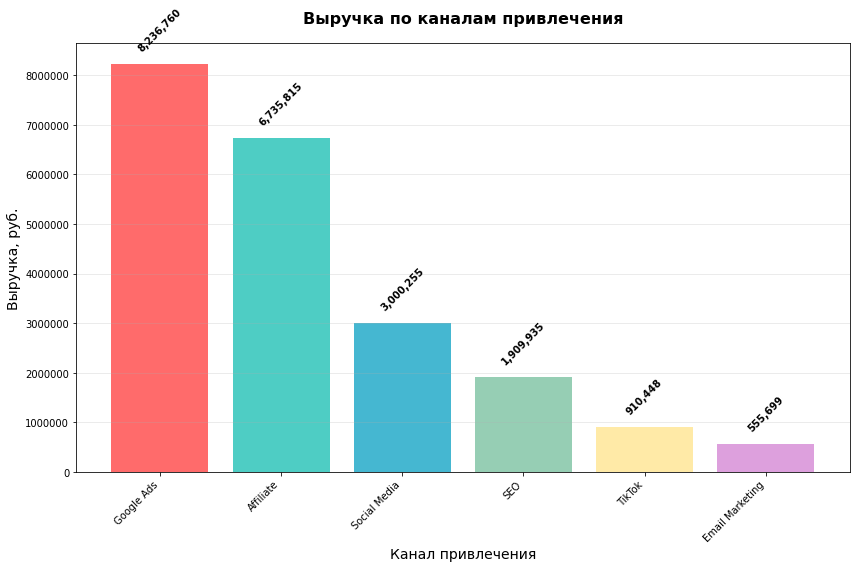

In [36]:
# Выручка по каналам привлечения
# Объединение данных: пользователи с их заказами
users_orders = pa_marketplace_users[['user_id', 'acq_channel']].merge(
    pa_marketplace_orders[['user_id', 'revenue']], 
    on='user_id', 
    how='left'
)

# Расчет выручки по каналам привлечения
revenue_by_channel = users_orders.groupby('acq_channel')['revenue'].sum().reset_index()
revenue_by_channel = revenue_by_channel.sort_values('revenue', ascending=False)

# Вывод данных
print("Выручка по каналам привлечения:")
for index, row in revenue_by_channel.iterrows():
    print(f"{row['acq_channel']}: {row['revenue']:,.0f} руб.")

# Общая выручка
total_revenue = revenue_by_channel['revenue'].sum()
print(f"\nОбщая выручка: {total_revenue:,.0f} руб.")

# Визуализация выручки по каналам (столбчатая диаграмма)
plt.figure(figsize=(12, 8))

# Создаем вертикальный bar chart
bars = plt.bar(range(len(revenue_by_channel)), revenue_by_channel['revenue'], 
                color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8'])

# Добавление значений на столбцы
for i, (bar, revenue_value) in enumerate(zip(bars, revenue_by_channel['revenue'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + total_revenue * 0.01,
             f'{revenue_value:,.0f}', ha='center', va='bottom', fontweight='bold', rotation=45)

plt.title('Выручка по каналам привлечения', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Канал привлечения', fontsize=14)
plt.ylabel('Выручка, руб.', fontsize=14)
plt.xticks(range(len(revenue_by_channel)), revenue_by_channel['acq_channel'], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Форматирование оси Y
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()



Больше всего выручки приносят Google (8.2 млн) и Affiliate (6.7 млн), меньше всего - TikTok (0.9 млн) и EMail (0.55 млн)

Выручка по категориям товаров (Топ-10):
Мебель для дома: 3,580,998 руб.
Бытовая техника: 2,248,933 руб.
Украшения и часы: 1,718,297 руб.
Спортивный инвентарь: 1,165,361 руб.
Товары для туризма: 1,137,318 руб.
Автотовары: 1,044,822 руб.
Товары для кухни: 1,030,402 руб.
Обувь мужская: 942,482 руб.
Сумки и аксессуары: 873,491 руб.
Обувь женская: 860,489 руб.


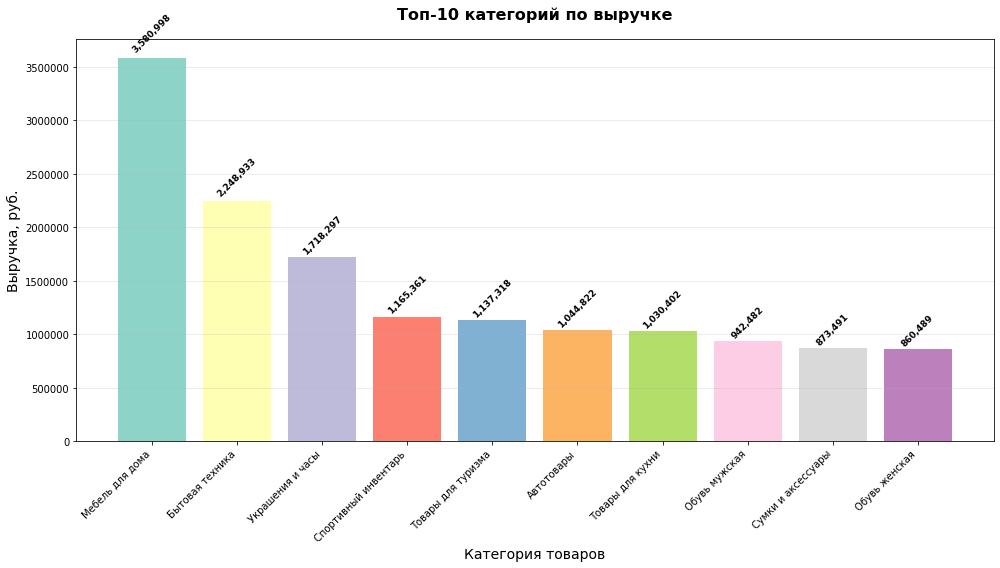

In [37]:
# Расчет выручки по категориям товаров
revenue_by_category = pa_marketplace_orders.groupby('category_name')['revenue'].sum().reset_index()
revenue_by_category = revenue_by_category.sort_values('revenue', ascending=False)

# Топ-10 категорий по выручке
top_10_categories = revenue_by_category.head(10)

# Вывод данных
print("Выручка по категориям товаров (Топ-10):")
print("=" * 50)
for index, row in top_10_categories.iterrows():
    print(f"{row['category_name']}: {row['revenue']:,.0f} руб.")

# Визуализация топ-10 категорий (столбчатая диаграмма)
plt.figure(figsize=(14, 8))

# Создаем вертикальный bar chart для топ-10
bars = plt.bar(range(len(top_10_categories)), top_10_categories['revenue'], 
                color=plt.cm.Set3(range(len(top_10_categories))))

# Добавление значений на столбцы
for i, (bar, revenue_value) in enumerate(zip(bars, top_10_categories['revenue'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + revenue_value * 0.01,
             f'{revenue_value:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=9, rotation=45)

plt.title('Топ-10 категорий по выручке', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Категория товаров', fontsize=14)
plt.ylabel('Выручка, руб.', fontsize=14)
plt.xticks(range(len(top_10_categories)), top_10_categories['category_name'], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()


Больше всего приносят - "мебель для дома", "Бытовая техника", "Украшения и часы". ПРи этом популярной категории "продукты питания" нет в топ10

Выручка по регионам:
Другие регионы: 6,837,361 руб.
Москва: 5,410,184 руб.
Санкт-Петербург: 3,396,293 руб.
Московская область: 1,658,614 руб.
Екатеринбург: 1,143,766 руб.
Нижний Новгород: 841,422 руб.
Краснодар: 728,838 руб.
Новосибирск: 728,729 руб.
Ростов-на-Дону: 603,705 руб.


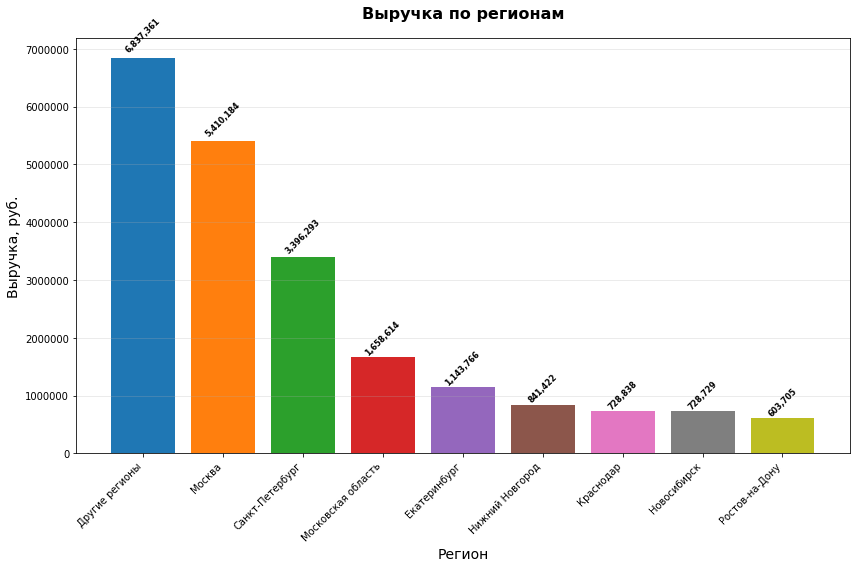

In [38]:
# Объединение данных: пользователи с их заказами
users_orders = pa_marketplace_users[['user_id', 'region']].merge(
    pa_marketplace_orders[['user_id', 'revenue']], 
    on='user_id', 
    how='left'
)

# Расчет выручки по регионам
revenue_by_region = users_orders.groupby('region')['revenue'].sum().reset_index()
revenue_by_region = revenue_by_region.sort_values('revenue', ascending=False)

# Вывод данных
print("Выручка по регионам:")
print("=" * 50)
for index, row in revenue_by_region.iterrows():
    print(f"{row['region']}: {row['revenue']:,.0f} руб.")

# Визуализация выручки по регионам (столбчатая диаграмма)
plt.figure(figsize=(12, 8))

# Создаем вертикальный bar chart
bars = plt.bar(range(len(revenue_by_region)), revenue_by_region['revenue'], 
                color=plt.cm.tab10(range(len(revenue_by_region))))

# Добавление значений на столбцы
for i, (bar, revenue_value) in enumerate(zip(bars, revenue_by_region['revenue'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + revenue_value * 0.01,
             f'{revenue_value:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=8, rotation=45)

plt.title('Выручка по регионам', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Регион', fontsize=14)
plt.ylabel('Выручка, руб.', fontsize=14)
plt.xticks(range(len(revenue_by_region)), revenue_by_region['region'], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()


Если отбросить "другие регионы" (это все регионы, кроме крупных и выделенных), то лидеры - Москва (5.4 млн), Санкт-Петербург (3.4 млн) и Московская обл (1.6 млн).

ARPU по регионам:
Екатеринбург: 533 руб. (Выручка: 1,143,766 руб., Пользователи: 2,145)
Краснодар: 521 руб. (Выручка: 728,838 руб., Пользователи: 1,398)
Санкт-Петербург: 508 руб. (Выручка: 3,396,293 руб., Пользователи: 6,690)
Москва: 494 руб. (Выручка: 5,410,184 руб., Пользователи: 10,959)
Нижний Новгород: 481 руб. (Выручка: 841,422 руб., Пользователи: 1,748)
Другие регионы: 471 руб. (Выручка: 6,837,361 руб., Пользователи: 14,516)
Московская область: 467 руб. (Выручка: 1,658,614 руб., Пользователи: 3,549)
Ростов-на-Дону: 424 руб. (Выручка: 603,705 руб., Пользователи: 1,423)
Новосибирск: 423 руб. (Выручка: 728,729 руб., Пользователи: 1,723)


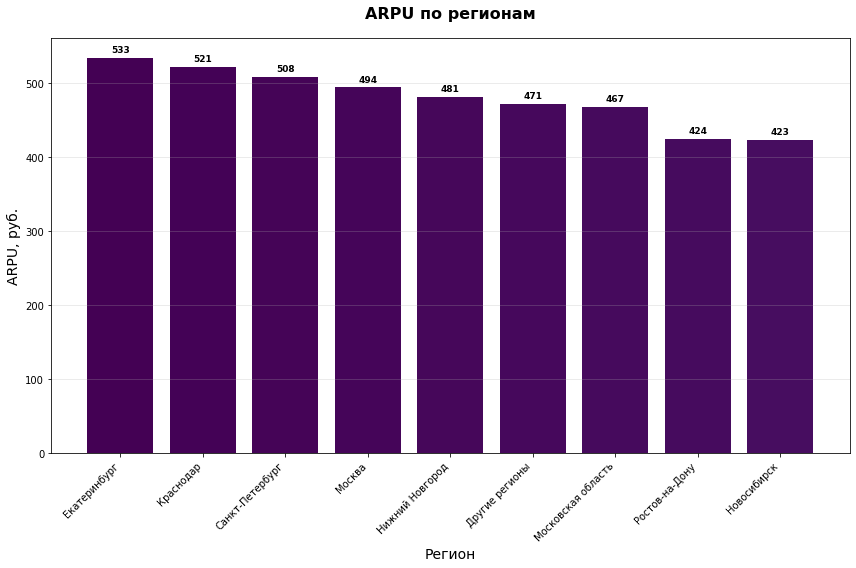

In [39]:
# Расчет выручки и количества пользователей по регионам
region_metrics = users_orders.groupby('region').agg({
    'revenue': 'sum',
    'user_id': 'nunique'
}).reset_index()

# Переименовываем столбцы
region_metrics.columns = ['region', 'total_revenue', 'user_count']

# Расчет ARPU
region_metrics['arpu'] = region_metrics['total_revenue'] / region_metrics['user_count']
region_metrics = region_metrics.sort_values('arpu', ascending=False)

# Вывод данных
print("ARPU по регионам:")
print("=" * 50)
for index, row in region_metrics.iterrows():
    print(f"{row['region']}: {row['arpu']:.0f} руб. (Выручка: {row['total_revenue']:,.0f} руб., Пользователи: {row['user_count']:,.0f})")

# Визуализация ARPU по регионам (столбчатая диаграмма)
plt.figure(figsize=(12, 8))

# Создаем вертикальный bar chart
bars = plt.bar(range(len(region_metrics)), region_metrics['arpu'], 
                color=plt.cm.viridis(range(len(region_metrics))))

# Добавление значений на столбцы
for i, (bar, arpu_value) in enumerate(zip(bars, region_metrics['arpu'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f'{arpu_value:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.title('ARPU по регионам', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Регион', fontsize=14)
plt.ylabel('ARPU, руб.', fontsize=14)
plt.xticks(range(len(region_metrics)), region_metrics['region'], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Средний чек на пользователя по регионам не сильно колеблется (423-533р), однако лидеры тут не столичные регионы, а Екатеринбург и Краснодар. Потом идут Санкт-Петербург и Москва

ARPU по каналам привлечения:
Affiliate: 1110 руб. (Выручка: 6,735,815 руб., Пользователи: 6,069)
Google Ads: 884 руб. (Выручка: 8,236,760 руб., Пользователи: 9,319)
Social Media: 718 руб. (Выручка: 3,000,255 руб., Пользователи: 4,179)
SEO: 577 руб. (Выручка: 1,909,935 руб., Пользователи: 3,312)
Email Marketing: 272 руб. (Выручка: 555,699 руб., Пользователи: 2,044)
TikTok: 47 руб. (Выручка: 910,448 руб., Пользователи: 19,228)


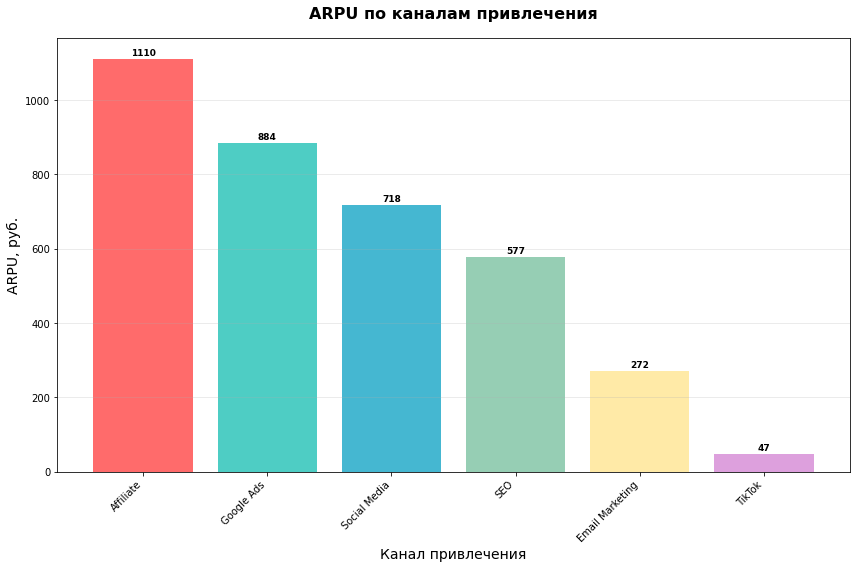

In [40]:
# Объединение данных: пользователи с их заказами
users_orders = pa_marketplace_users[['user_id', 'acq_channel']].merge(
    pa_marketplace_orders[['user_id', 'revenue']], 
    on='user_id', 
    how='left'
)

# Расчет выручки и количества пользователей по каналам привлечения
channel_metrics = users_orders.groupby('acq_channel').agg({
    'revenue': 'sum',
    'user_id': 'nunique'
}).reset_index()

# Переименовываем столбцы
channel_metrics.columns = ['channel', 'total_revenue', 'user_count']

# Расчет ARPU
channel_metrics['arpu'] = channel_metrics['total_revenue'] / channel_metrics['user_count']
channel_metrics = channel_metrics.sort_values('arpu', ascending=False)

# Вывод данных
print("ARPU по каналам привлечения:")
print("=" * 60)
for index, row in channel_metrics.iterrows():
    print(f"{row['channel']}: {row['arpu']:.0f} руб. (Выручка: {row['total_revenue']:,.0f} руб., Пользователи: {row['user_count']:,.0f})")

# Визуализация ARPU по каналам привлечения (столбчатая диаграмма)
plt.figure(figsize=(12, 8))

# Создаем вертикальный bar chart
bars = plt.bar(range(len(channel_metrics)), channel_metrics['arpu'], 
                color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8'])

# Добавление значений на столбцы
for i, (bar, arpu_value) in enumerate(zip(bars, channel_metrics['arpu'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f'{arpu_value:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.title('ARPU по каналам привлечения', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Канал привлечения', fontsize=14)
plt.ylabel('ARPU, руб.', fontsize=14)
plt.xticks(range(len(channel_metrics)), channel_metrics['channel'], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


Средний чек по каналам привлечения очень различается. Лидеры - Affiliate (1110)  и Google (884), аутсайдеры - Email (272) и Tiktok (47)

ARPPU по регионам:
Екатеринбург: 2736 руб. (Выручка: 1,143,766 руб., Платящие пользователи: 418)
Санкт-Петербург: 2579 руб. (Выручка: 3,396,293 руб., Платящие пользователи: 1,317)
Краснодар: 2513 руб. (Выручка: 728,838 руб., Платящие пользователи: 290)
Москва: 2459 руб. (Выручка: 5,410,184 руб., Платящие пользователи: 2,200)
Московская область: 2436 руб. (Выручка: 1,658,614 руб., Платящие пользователи: 681)
Другие регионы: 2428 руб. (Выручка: 6,837,361 руб., Платящие пользователи: 2,816)
Нижний Новгород: 2377 руб. (Выручка: 841,422 руб., Платящие пользователи: 354)
Новосибирск: 2351 руб. (Выручка: 728,729 руб., Платящие пользователи: 310)
Ростов-на-Дону: 2253 руб. (Выручка: 603,705 руб., Платящие пользователи: 268)


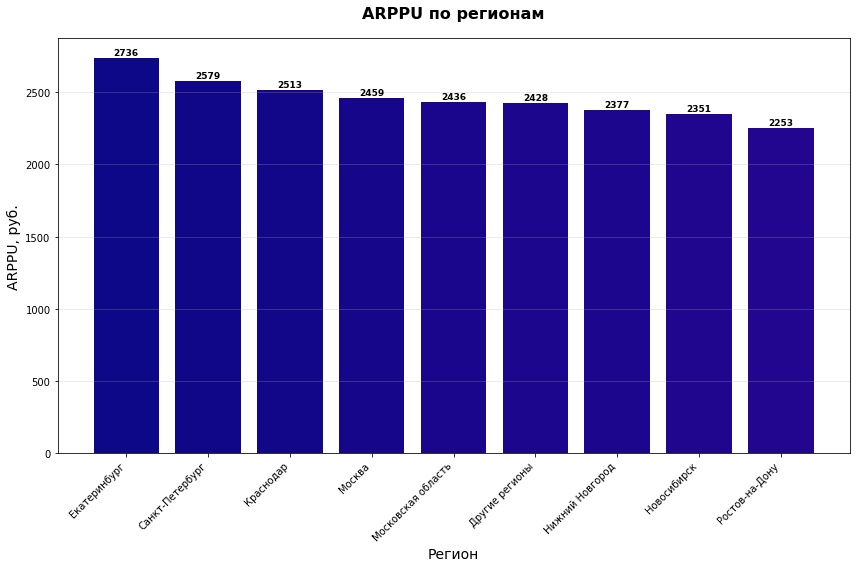

In [41]:
# Объединение данных: пользователи с их заказами
users_orders = pa_marketplace_users[['user_id', 'region']].merge(
    pa_marketplace_orders[['user_id', 'revenue']], 
    on='user_id', 
    how='left'
)


# Фильтруем только платящих пользователей
paying_users_orders = users_orders.dropna(subset=['revenue'])

# Расчет выручки и количества платящих пользователей по регионам
region_metrics = paying_users_orders.groupby('region').agg({
    'revenue': 'sum',
    'user_id': 'nunique'
}).reset_index()

# Переименовываем столбцы
region_metrics.columns = ['region', 'total_revenue', 'paying_users_count']

# Расчет ARPPU (на платящего пользователя)
region_metrics['arppu'] = region_metrics['total_revenue'] / region_metrics['paying_users_count']
region_metrics = region_metrics.sort_values('arppu', ascending=False)

# Вывод данных
print("ARPPU по регионам:")
print("=" * 60)
for index, row in region_metrics.iterrows():
    print(f"{row['region']}: {row['arppu']:.0f} руб. (Выручка: {row['total_revenue']:,.0f} руб., Платящие пользователи: {row['paying_users_count']:,.0f})")

# Визуализация ARPPU по регионам (столбчатая диаграмма)
plt.figure(figsize=(12, 8))

# Создаем вертикальный bar chart
bars = plt.bar(range(len(region_metrics)), region_metrics['arppu'], 
                color=plt.cm.plasma(range(len(region_metrics))))

# Добавление значений на столбцы
for i, (bar, arppu_value) in enumerate(zip(bars, region_metrics['arppu'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f'{arppu_value:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.title('ARPPU по регионам', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Регион', fontsize=14)
plt.ylabel('ARPPU, руб.', fontsize=14)
plt.xticks(range(len(region_metrics)), region_metrics['region'], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Средний чек на платящего пользователя по регионам в целом имеет аналогичную динамику, со средним чеком на всех пользователей. Екатеринбург (2736), Санкт-Петербург (2579), Краснодар (2513), Москва (2459).

ARPPU по каналам привлечения:
Affiliate: 2881 руб. (Выручка: 6,735,815 руб., Платящие пользователи: 2,338)
Google Ads: 2584 руб. (Выручка: 8,236,760 руб., Платящие пользователи: 3,187)
Social Media: 2478 руб. (Выручка: 3,000,255 руб., Платящие пользователи: 1,211)
SEO: 2185 руб. (Выручка: 1,909,935 руб., Платящие пользователи: 874)
Email Marketing: 1710 руб. (Выручка: 555,699 руб., Платящие пользователи: 325)
TikTok: 1266 руб. (Выручка: 910,448 руб., Платящие пользователи: 719)


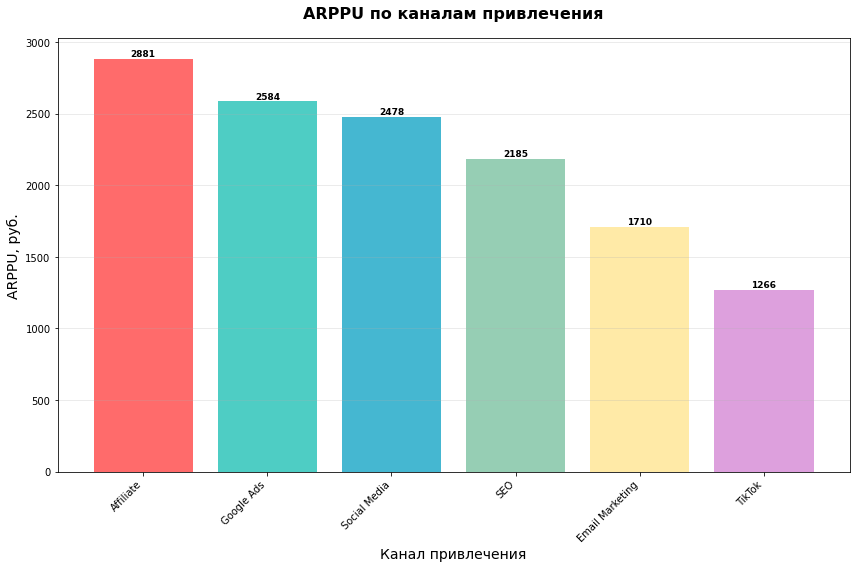

In [42]:
# Объединение данных: пользователи с их заказами
users_orders = pa_marketplace_users[['user_id', 'acq_channel']].merge(
    pa_marketplace_orders[['user_id', 'revenue']], 
    on='user_id', 
    how='left'
)
# 
# Фильтруем только платящих пользователей
paying_users_orders = users_orders.dropna(subset=['revenue'])

# Расчет выручки и количества платящих пользователей по каналам привлечения
channel_metrics = paying_users_orders.groupby('acq_channel').agg({
    'revenue': 'sum',
    'user_id': 'nunique'
}).reset_index()

# Переименовываем столбцы
channel_metrics.columns = ['channel', 'total_revenue', 'paying_users_count']

# Расчет ARPPU (на платящего пользователя)
channel_metrics['arppu'] = channel_metrics['total_revenue'] / channel_metrics['paying_users_count']
channel_metrics = channel_metrics.sort_values('arppu', ascending=False)

# Вывод данных
print("ARPPU по каналам привлечения:")
print("=" * 60)
for index, row in channel_metrics.iterrows():
    print(f"{row['channel']}: {row['arppu']:.0f} руб. (Выручка: {row['total_revenue']:,.0f} руб., Платящие пользователи: {row['paying_users_count']:,.0f})")

# Визуализация ARPPU по каналам привлечения (столбчатая диаграмма)
plt.figure(figsize=(12, 8))

# Создаем вертикальный bar chart
bars = plt.bar(range(len(channel_metrics)), channel_metrics['arppu'], 
                color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8'])

# Добавление значений на столбцы
for i, (bar, arppu_value) in enumerate(zip(bars, channel_metrics['arppu'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f'{arppu_value:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.title('ARPPU по каналам привлечения', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Канал привлечения', fontsize=14)
plt.ylabel('ARPPU, руб.', fontsize=14)
plt.xticks(range(len(channel_metrics)), channel_metrics['channel'], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Средний чек на платящего пользователя по каналам привлечения - лидеры Affiliate (2881) и Google (2584), аутсайдер TikTok (1266).

ARPPU по сегментам клиентов:
regular: 4007 руб. (Выручка: 14,890,442 руб., Платящие пользователи: 3,716)
medium: 1406 руб. (Выручка: 5,190,508 руб., Платящие пользователи: 3,692)
rare: 1060 руб. (Выручка: 1,046,910 руб., Платящие пользователи: 988)
one_time: 857 руб. (Выручка: 221,052 руб., Платящие пользователи: 258)


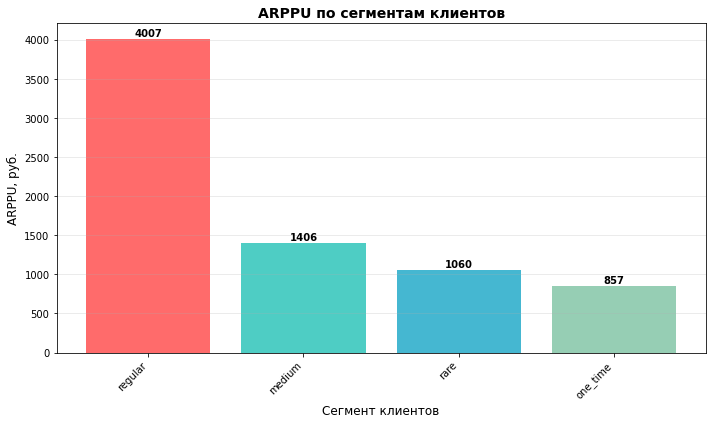


Средний ARPPU: 1832 руб.


In [43]:
# Объединение данных
users_orders = pa_marketplace_users[['user_id', 'buyer_segment']].merge(
    pa_marketplace_orders[['user_id', 'revenue']], 
    on='user_id', 
    how='left'
)

# Фильтруем только платящих пользователей
paying_users_orders = users_orders.dropna(subset=['revenue'])

# Расчет ARPPU по сегментам клиентов
arppu_by_segment = paying_users_orders.groupby('buyer_segment').agg({
    'revenue': 'sum',
    'user_id': 'nunique'
}).reset_index()

arppu_by_segment['arppu'] = arppu_by_segment['revenue'] / arppu_by_segment['user_id']
arppu_by_segment = arppu_by_segment.sort_values('arppu', ascending=False)

# Вывод данных
print("ARPPU по сегментам клиентов:")
print("=" * 50)
for index, row in arppu_by_segment.iterrows():
    print(f"{row['buyer_segment']}: {row['arppu']:.0f} руб. (Выручка: {row['revenue']:,.0f} руб., Платящие пользователи: {row['user_id']:,.0f})")

# Визуализация
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(arppu_by_segment)), arppu_by_segment['arppu'], 
                color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])

# Добавление значений на столбцы
for i, (bar, arppu_value) in enumerate(zip(bars, arppu_by_segment['arppu'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f'{arppu_value:.0f}', ha='center', va='bottom', fontweight='bold')

plt.title('ARPPU по сегментам клиентов', fontsize=14, fontweight='bold')
plt.xlabel('Сегмент клиентов', fontsize=12)
plt.ylabel('ARPPU, руб.', fontsize=12)
plt.xticks(range(len(arppu_by_segment)), arppu_by_segment['buyer_segment'], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Средний ARPPU
avg_arppu = arppu_by_segment['arppu'].mean()
print(f"\nСредний ARPPU: {avg_arppu:.0f} руб.")

Средний чек на платящего пользователя по сегментам - больше всех тратят постоянные клиенты (4007), меньше всего - разовые покупатели (857).

ARPPU по категориям (Топ-10):
Мебель для дома: 6967 руб.
Бытовая техника: 4119 руб.
Украшения и часы: 3471 руб.
Товары для туризма: 2284 руб.
Спортивный инвентарь: 2228 руб.
Автотовары: 1862 руб.
Инструменты и садовый инвентарь: 1622 руб.
Товары для кухни: 1618 руб.
Декор и освещение: 1308 руб.
Обувь мужская: 1291 руб.


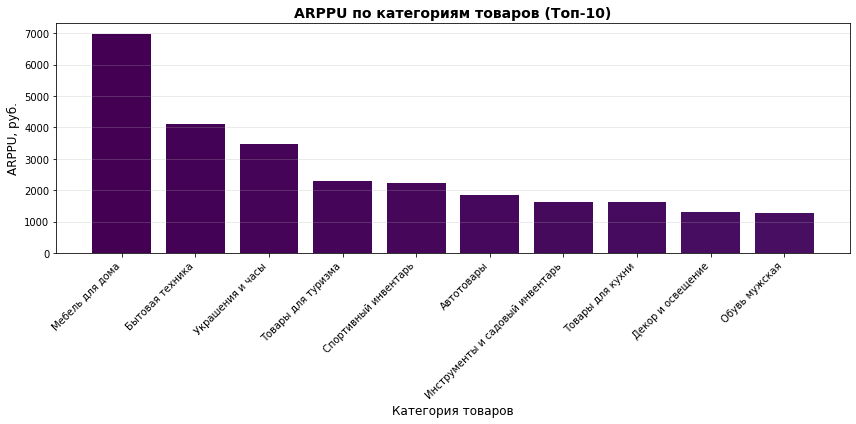

In [44]:
# Расчет выручки и ARPPU по категориям
pa_marketplace_orders['revenue'] = pa_marketplace_orders['total_price'] * 0.05
category_metrics = pa_marketplace_orders.groupby('category_name').agg({
    'revenue': 'sum',
    'user_id': 'nunique'
}).reset_index()

category_metrics['arppu'] = category_metrics['revenue'] / category_metrics['user_id']
category_metrics = category_metrics.sort_values('arppu', ascending=False).head(10)

# Вывод данных
print("ARPPU по категориям (Топ-10):")
for index, row in category_metrics.iterrows():
    print(f"{row['category_name']}: {row['arppu']:.0f} руб.")

# Вертикальная диаграмма
plt.figure(figsize=(12, 6))
plt.bar(range(len(category_metrics)), category_metrics['arppu'], 
        color=plt.cm.viridis(range(len(category_metrics))))
plt.title('ARPPU по категориям товаров (Топ-10)', fontsize=14, fontweight='bold')
plt.xlabel('Категория товаров', fontsize=12)
plt.ylabel('ARPPU, руб.', fontsize=12)
plt.xticks(range(len(category_metrics)), category_metrics['category_name'], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

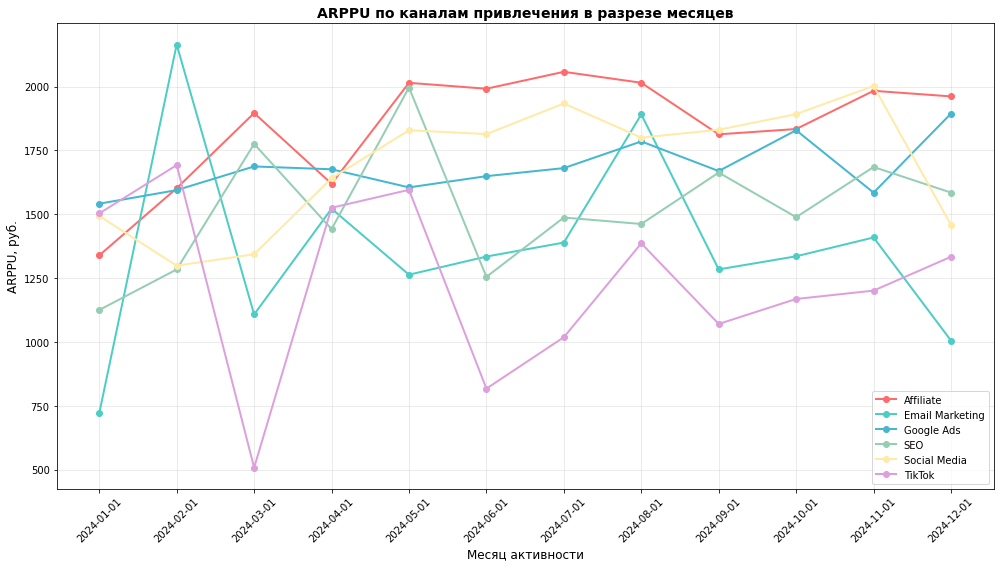


Средний ARPPU: 1558 руб.


In [45]:
# Создание таблицы с ARPPU по каналам и месяцам
arppu_by_channel_month = []

# Получаем уникальные каналы и месяцы
channels = pa_marketplace_users['acq_channel'].unique()
months = pa_marketplace_orders['order_month'].unique()

for channel in channels:
    for month in months:
        # Фильтруем данные по каналу и месяцу
        channel_users = pa_marketplace_users[pa_marketplace_users['acq_channel'] == channel]
        channel_user_ids = channel_users['user_id'].tolist()
        
        # Фильтруем заказы только для пользователей этого канала в этот месяц
        channel_orders = pa_marketplace_orders[
            (pa_marketplace_orders['user_id'].isin(channel_user_ids)) & 
            (pa_marketplace_orders['order_month'] == month)
        ]
        
        # Расчет метрик
        paying_users_count = channel_orders['user_id'].nunique()
        total_revenue = channel_orders['revenue'].sum()
        
        # Расчет ARPPU
        arppu = total_revenue / paying_users_count if paying_users_count > 0 else 0
        
        arppu_by_channel_month.append({
            'channel': channel,
            'month': str(month),
            'arppu': arppu,
            'revenue': total_revenue,
            'paying_users': paying_users_count
        })

# Создание DataFrame
arppu_df = pd.DataFrame(arppu_by_channel_month)
arppu_df = arppu_df.sort_values(['channel', 'month'])


# Линейная визуализация ARPPU по каналам в разрезе месяцев
plt.figure(figsize=(14, 8))

# Определение цветов для каналов
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']

# Построение графика для каждого канала
for i, channel in enumerate(arppu_df['channel'].unique()):
    channel_data = arppu_df[arppu_df['channel'] == channel]
    plt.plot(channel_data['month'], channel_data['arppu'], marker='o', linewidth=2, markersize=6, 
             color=colors[i % len(colors)], label=channel)

plt.title('ARPPU по каналам привлечения в разрезе месяцев', fontsize=14, fontweight='bold')
plt.xlabel('Месяц активности', fontsize=12)
plt.ylabel('ARPPU, руб.', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Средний ARPPU по всем каналам
avg_arppu = arppu_df['arppu'].mean()
print(f"\nСредний ARPPU: {avg_arppu:.0f} руб.")

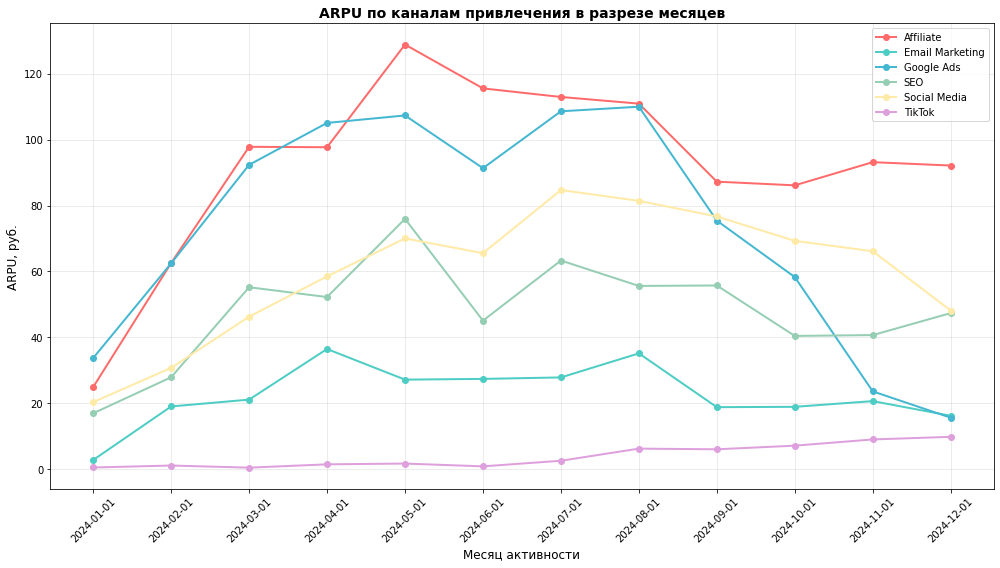

In [46]:
# Создание таблицы с ARPU по каналам и месяцам
arpu_by_channel_month = []

# Получаем уникальные каналы и месяцы
channels = pa_marketplace_users['acq_channel'].unique()
months = pa_marketplace_orders['order_month'].unique()

for channel in channels:
    for month in months:
        # Фильтруем данные по каналу и месяцу
        channel_users = pa_marketplace_users[pa_marketplace_users['acq_channel'] == channel]
        channel_user_ids = channel_users['user_id'].tolist()
        
        # Фильтруем заказы только для пользователей этого канала в этот месяц
        channel_orders = pa_marketplace_orders[
            (pa_marketplace_orders['user_id'].isin(channel_user_ids)) & 
            (pa_marketplace_orders['order_month'] == month)
        ]
        
        # Расчет метрик
        total_users = len(channel_user_ids)
        total_revenue = channel_orders['revenue'].sum()
        
        # Расчет ARPU
        arpu = total_revenue / total_users if total_users > 0 else 0
        
        arpu_by_channel_month.append({
            'channel': channel,
            'month': str(month),
            'arpu': arpu,
            'revenue': total_revenue,
            'total_users': total_users
        })

# Создание DataFrame
arpu_df = pd.DataFrame(arpu_by_channel_month)
arpu_df = arpu_df.sort_values(['channel', 'month'])

# Линейная визуализация ARPU по каналам в разрезе месяцев
plt.figure(figsize=(14, 8))

# Определение цветов для каналов
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']

# Построение графика для каждого канала
for i, channel in enumerate(arpu_df['channel'].unique()):
    channel_data = arpu_df[arpu_df['channel'] == channel]
    plt.plot(channel_data['month'], channel_data['arpu'], marker='o', linewidth=2, markersize=6, 
             color=colors[i % len(colors)], label=channel)

plt.title('ARPU по каналам привлечения в разрезе месяцев', fontsize=14, fontweight='bold')
plt.xlabel('Месяц активности', fontsize=12)
plt.ylabel('ARPU, руб.', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()



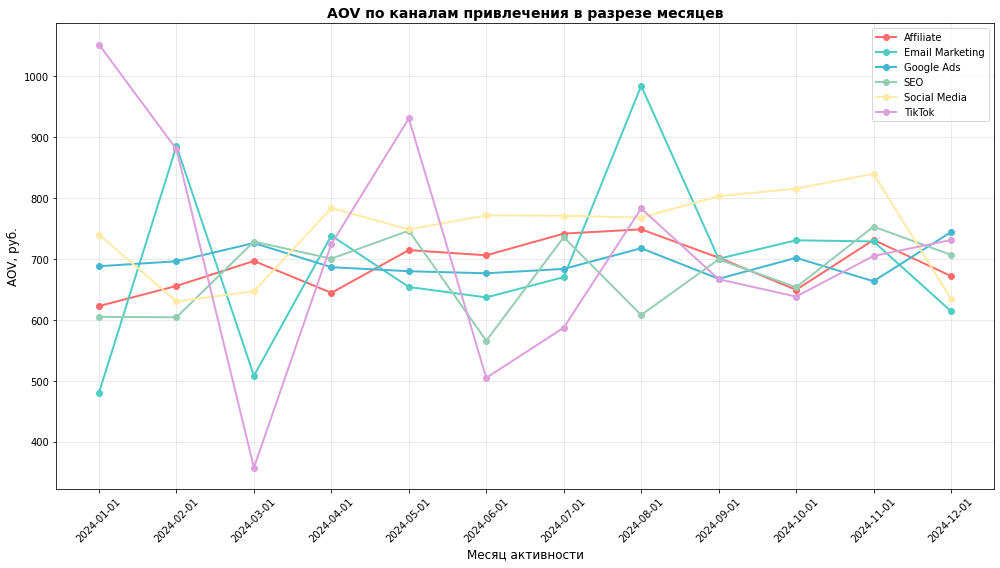


Средний AOV: 702 руб.


In [47]:
# Создание таблицы с AOV по каналам и месяцам
aov_by_channel_month = []

# Получаем уникальные каналы и месяцы
channels = pa_marketplace_users['acq_channel'].unique()
months = pa_marketplace_orders['order_month'].unique()

for channel in channels:
    for month in months:
        # Фильтруем данные по каналу и месяцу
        channel_users = pa_marketplace_users[pa_marketplace_users['acq_channel'] == channel]
        channel_user_ids = channel_users['user_id'].tolist()
        
        # Фильтруем заказы только для пользователей этого канала в этот месяц
        channel_orders = pa_marketplace_orders[
            (pa_marketplace_orders['user_id'].isin(channel_user_ids)) & 
            (pa_marketplace_orders['order_month'] == month)
        ]
        
        # Расчет метрик
        total_orders = len(channel_orders)
        total_revenue = channel_orders['revenue'].sum()
        
        # Расчет AOV
        aov = total_revenue / total_orders if total_orders > 0 else 0
        
        aov_by_channel_month.append({
            'channel': channel,
            'month': str(month),
            'aov': aov,
            'revenue': total_revenue,
            'total_orders': total_orders
        })

# Создание DataFrame
aov_df = pd.DataFrame(aov_by_channel_month)
aov_df = aov_df.sort_values(['channel', 'month'])

# Линейная визуализация AOV по каналам в разрезе месяцев
plt.figure(figsize=(14, 8))

# Определение цветов для каналов
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']

# Построение графика для каждого канала
for i, channel in enumerate(aov_df['channel'].unique()):
    channel_data = aov_df[aov_df['channel'] == channel]
    plt.plot(channel_data['month'], channel_data['aov'], marker='o', linewidth=2, markersize=6, 
             color=colors[i % len(colors)], label=channel)

plt.title('AOV по каналам привлечения в разрезе месяцев', fontsize=14, fontweight='bold')
plt.xlabel('Месяц активности', fontsize=12)
plt.ylabel('AOV, руб.', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Средний AOV по всем каналам
avg_aov = aov_df['aov'].mean()
print(f"\nСредний AOV: {avg_aov:.0f} руб.")

Средний чек на платящего пользователя по категориям товаров - больше всего мебели, бытовой техники и украшений. Продуктов питания в Топ10 нет

<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> Все эти метрики стоит смотреть в динамике (особено по каналм привлечения), всегда ли было такое распределение? Какая направленность наблюдается по категориям/каналам?
    
Например, вот так
    
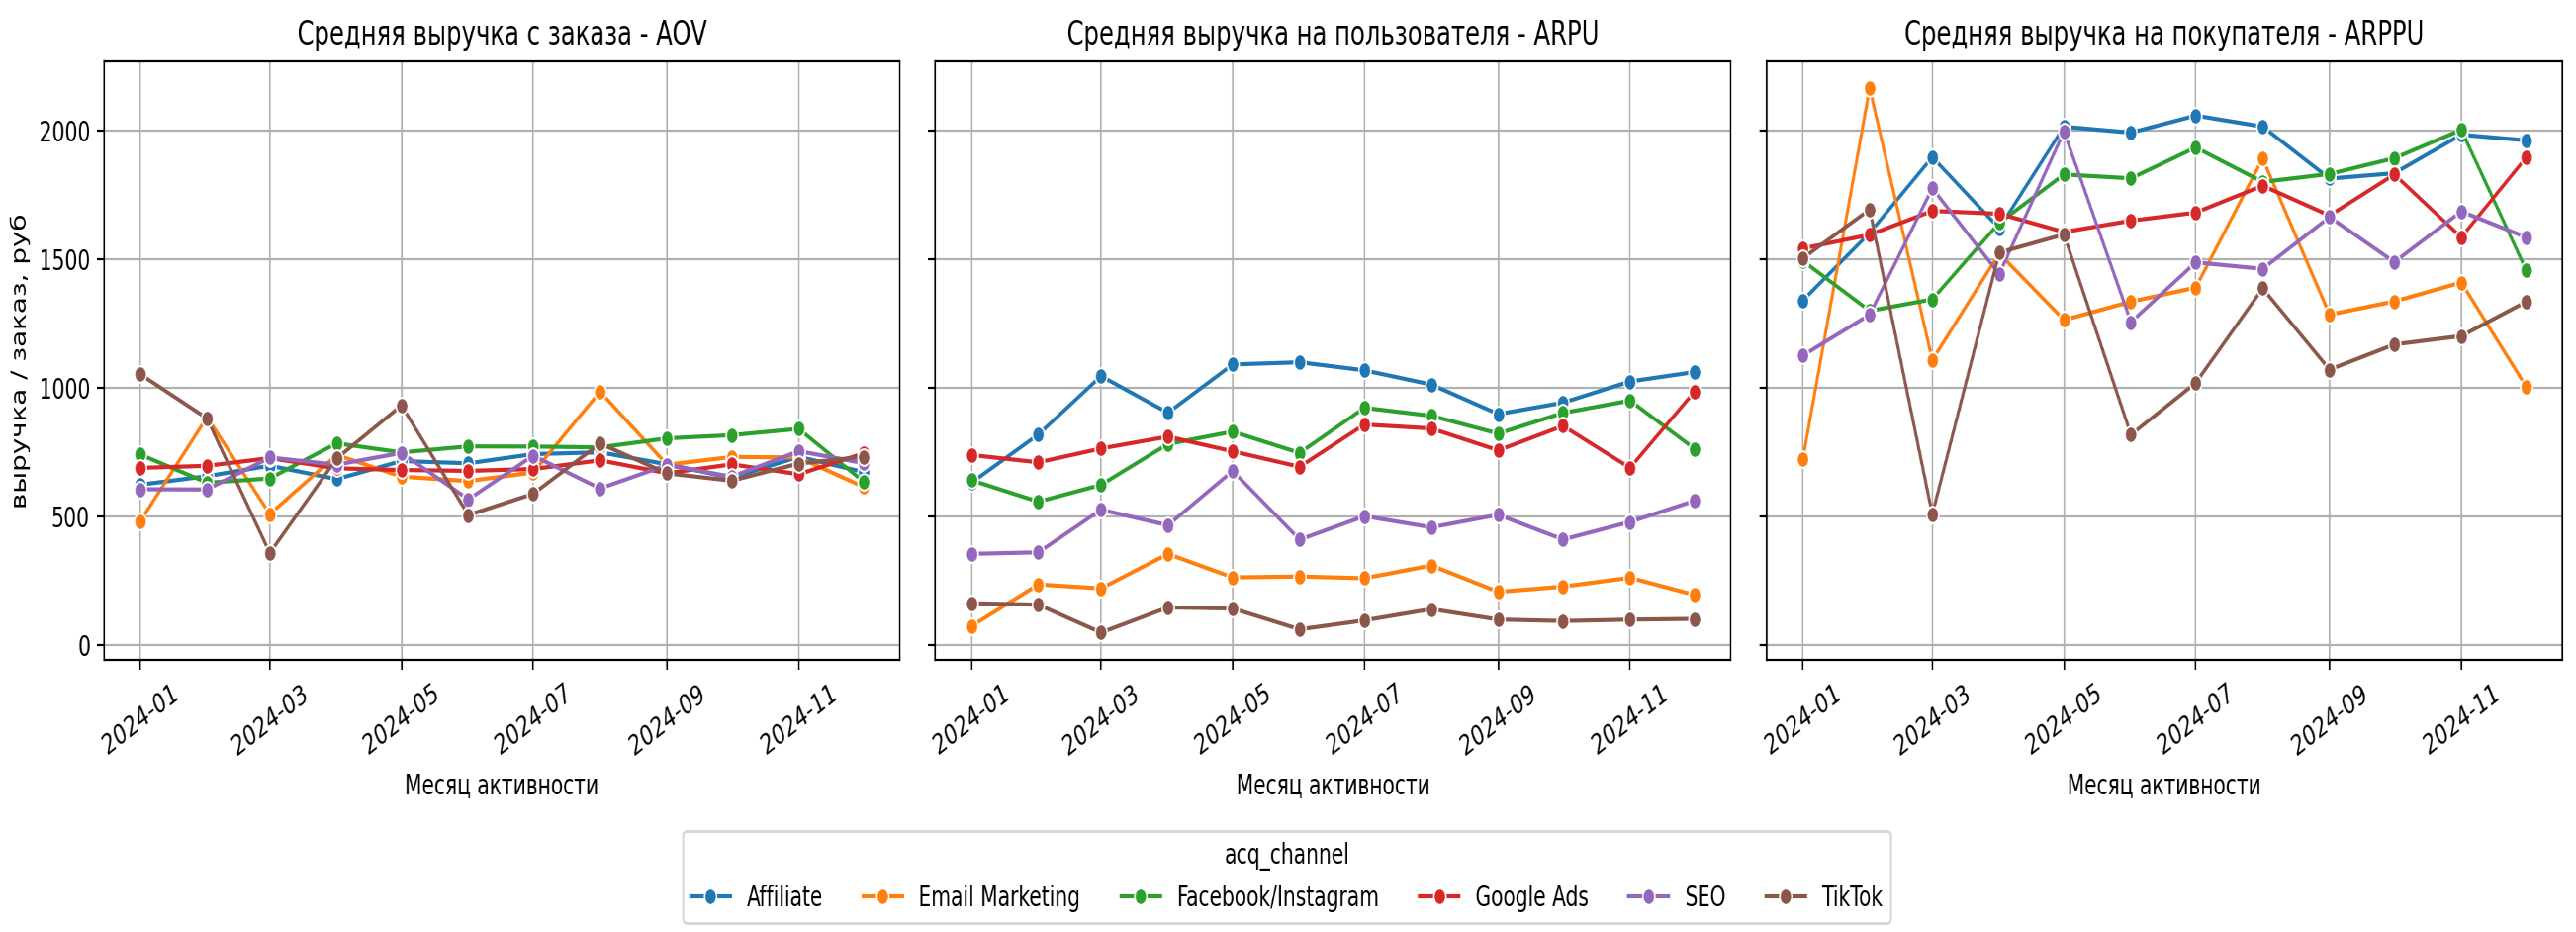
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Тоже сделал графики. По факту AOV в ТикТоке поначалу в январе-феврале была самая высокая, потом в марте резкое падение, апрель и май снова рост и далее относительная стабильность.
По ARPU тикток все время ниже всех, по ARPPU январь-февраль и апрель-май "конкурентноспособны" (картина схожа с графиком AOV), но далее "тиктокеры" ниже других каналов, несмотря на относительный рост по сравнению с маем к концу года.
</div>

<div class="alert alert-success">
<b>👍 Успех:</b> Да, ТикТок нестабилен, но там тоже были "хорошие" времена, значит стоит рекомендовать бизнесу обратить на него внимание и разобраться конкретней, возможно сменить стратегию, потенциал там есть, но что-то явно идет не так!
</div>

Пользователи по типам устройств:
desktop: 7,447 пользователей
mobile: 7,431 пользователей
tablet: 7,260 пользователей


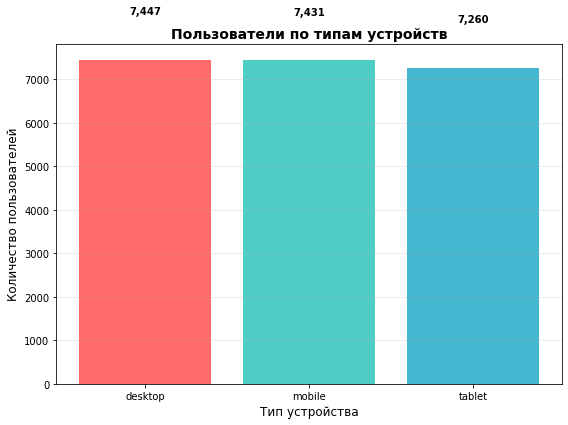

In [48]:
# Расчет пользователей по типам устройств
users_by_device = pa_marketplace_events.groupby('device')['user_id'].nunique().reset_index()
users_by_device = users_by_device.sort_values('user_id', ascending=False)

# Вывод данных
print("Пользователи по типам устройств:")
print("=" * 40)
for index, row in users_by_device.iterrows():
    print(f"{row['device']}: {row['user_id']:,.0f} пользователей")

# Визуализация
plt.figure(figsize=(8, 6))
bars = plt.bar(users_by_device['device'], users_by_device['user_id'], 
                color=['#FF6B6B', '#4ECDC4', '#45B7D1'])

# Добавление значений на столбцы
for bar, count in zip(bars, users_by_device['user_id']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000,
             f'{count:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.title('Пользователи по типам устройств', fontsize=14, fontweight='bold')
plt.xlabel('Тип устройства', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


По типу устройств пользуются примерно одинаково веб-версией, мобильным приложением и планшетом.

Количество клиентов по каналам привлечения:
TikTok: 19,228 клиентов
Google Ads: 9,319 клиентов
Affiliate: 6,069 клиентов
Social Media: 4,179 клиентов
SEO: 3,312 клиентов
Email Marketing: 2,044 клиентов


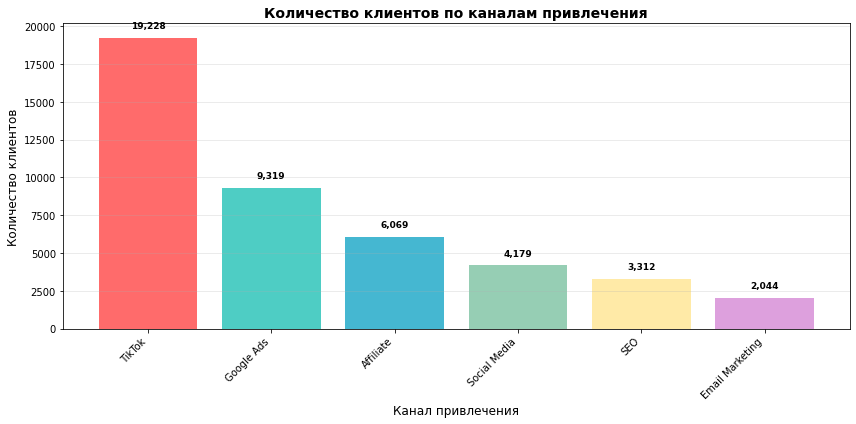


Процентное соотношение:
TikTok: 43.6%
Google Ads: 21.1%
Affiliate: 13.7%
Social Media: 9.5%
SEO: 7.5%
Email Marketing: 4.6%


In [49]:
# Количество клиентов по каналам привлечения
users_by_channel = pa_marketplace_users.groupby('acq_channel')['user_id'].nunique().reset_index()
users_by_channel = users_by_channel.sort_values('user_id', ascending=False)

# Вывод данных
print("Количество клиентов по каналам привлечения:")
print("=" * 50)
for index, row in users_by_channel.iterrows():
    print(f"{row['acq_channel']}: {row['user_id']:,.0f} клиентов")

# Визуализация
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(users_by_channel)), users_by_channel['user_id'], 
                color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8'])

# Добавление значений на столбцы
for i, (bar, count) in enumerate(zip(bars, users_by_channel['user_id'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500,
             f'{count:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.title('Количество клиентов по каналам привлечения', fontsize=14, fontweight='bold')
plt.xlabel('Канал привлечения', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.xticks(range(len(users_by_channel)), users_by_channel['acq_channel'], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Процентное соотношение
total_users = users_by_channel['user_id'].sum()
print(f"\nПроцентное соотношение:")
for index, row in users_by_channel.iterrows():
    percentage = (row['user_id'] / total_users) * 100
    print(f"{row['acq_channel']}: {percentage:.1f}%")

Больше всего клиентов по каналам привлечения у убыточного TikTok (43%), прибыльные Google (21%) и Affiliate (13%) на 2 и 3 месте соответственно. Аутсайдер - Email (4.6%)

Количество заказов по месяцам:
2024-01-01: 964 заказов
2024-02-01: 1,917 заказов
2024-03-01: 2,791 заказов
2024-04-01: 3,124 заказов
2024-05-01: 3,518 заказов
2024-06-01: 3,058 заказов
2024-07-01: 3,413 заказов
2024-08-01: 3,393 заказов
2024-09-01: 2,756 заказов
2024-10-01: 2,478 заказов
2024-11-01: 1,990 заказов
2024-12-01: 1,955 заказов


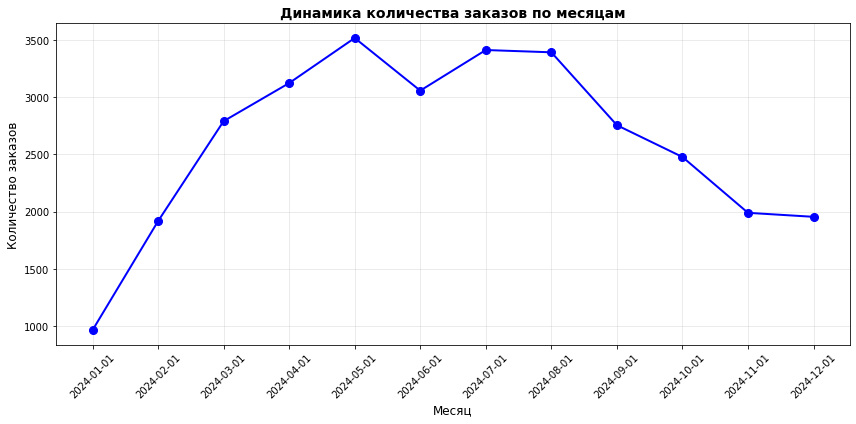


Среднее количество заказов в месяц: 2,613


In [50]:
# Количество заказов по месяцам
orders_by_month = pa_marketplace_orders.groupby('order_month')['order_id'].nunique().reset_index()
orders_by_month['order_month'] = orders_by_month['order_month'].astype(str)

# Вывод данных
print("Количество заказов по месяцам:")
print("=" * 40)
for index, row in orders_by_month.iterrows():
    print(f"{row['order_month']}: {row['order_id']:,.0f} заказов")

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(orders_by_month['order_month'], orders_by_month['order_id'], 
         marker='o', linewidth=2, markersize=8, color='blue')
plt.title('Динамика количества заказов по месяцам', fontsize=14, fontweight='bold')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Среднее количество заказов
avg_orders = orders_by_month['order_id'].mean()
print(f"\nСреднее количество заказов в месяц: {avg_orders:,.0f}")

Количество заказов по месяцам растет от января к маю (от 1000 до 3500), потом до августа примерно такой же показатель, и к декабрю падение до 2000.

/tmp/ipykernel_229/3820390860.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiktok_users['cohort_month'] = tiktok_users['registration_date'].dt.to_period('M')


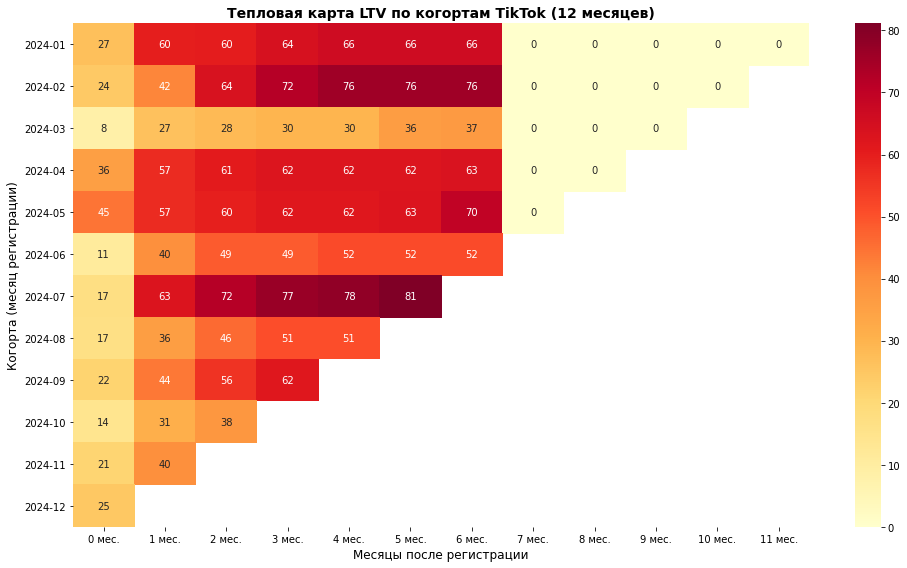

Кумулятивный LTV по когортам TikTok (12 месяцев):
Когорта 2024-01: LTV = 66 руб.
Когорта 2024-02: LTV = 76 руб.
Когорта 2024-03: LTV = 37 руб.
Когорта 2024-04: LTV = 63 руб.
Когорта 2024-05: LTV = 70 руб.
Когорта 2024-06: LTV = 52 руб.
Когорта 2024-07: LTV = 81 руб.
Когорта 2024-08: LTV = 51 руб.
Когорта 2024-09: LTV = 62 руб.
Когорта 2024-10: LTV = 38 руб.
Когорта 2024-11: LTV = 40 руб.
Когорта 2024-12: LTV = 25 руб.


In [51]:
# Фильтруем данные только по каналу TikTok
tiktok_users = pa_marketplace_users[pa_marketplace_users['acq_channel'] == 'TikTok']

# Создание когорт по месяцу регистрации
tiktok_users['cohort_month'] = tiktok_users['registration_date'].dt.to_period('M')

# Объединение данных
tiktok_users_orders = tiktok_users[['user_id', 'cohort_month']].merge(
    pa_marketplace_orders[['user_id', 'order_date', 'revenue']], 
    on='user_id', 
    how='left'
)

# Определение месяца заказа
tiktok_users_orders['order_month'] = tiktok_users_orders['order_date'].dt.to_period('M')

# Расчет разницы в месяцах
def month_diff(reg, order):
    if pd.isna(reg) or pd.isna(order):
        return None
    return (order - reg).n

tiktok_users_orders['month_diff'] = tiktok_users_orders.apply(
    lambda row: month_diff(row['cohort_month'], row['order_month']), axis=1
)

tiktok_users_orders = tiktok_users_orders.dropna(subset=['month_diff'])
tiktok_users_orders['month_diff'] = tiktok_users_orders['month_diff'].astype(int)

# Ограничиваем анализ 12 месяцами
tiktok_users_orders = tiktok_users_orders[tiktok_users_orders['month_diff'] <= 11]

# Расчет кумулятивного LTV по когортам
tiktok_ltv = tiktok_users_orders.groupby(['cohort_month', 'month_diff'])['revenue'].sum().reset_index()
tiktok_cohort_sizes = tiktok_users.groupby('cohort_month')['user_id'].nunique().reset_index()
tiktok_cohort_sizes.columns = ['cohort_month', 'user_count']
tiktok_ltv = tiktok_ltv.merge(tiktok_cohort_sizes, on='cohort_month')
tiktok_ltv['ltv_per_user'] = tiktok_ltv['revenue'] / tiktok_ltv['user_count']

# Создание сводной таблицы для всех 12 месяцев
tiktok_ltv_pivot = tiktok_ltv.pivot_table(
    index='cohort_month', 
    columns='month_diff', 
    values='ltv_per_user'
).fillna(0)

# Расчет кумулятивного LTV
tiktok_ltv_cumulative = tiktok_ltv_pivot.cumsum(axis=1)

# Убедимся, что у нас ровно 12 столбцов (0-11 месяцев)
target_columns = list(range(12))
tiktok_ltv_cumulative = tiktok_ltv_cumulative.reindex(columns=target_columns, fill_value=0)

# Создание для всех 12 месяцев
cohort_ltv_triangle = tiktok_ltv_cumulative.copy()

# Создаем маску 
for i, cohort in enumerate(cohort_ltv_triangle.index):
    # Для каждой когорты скрываем месяцы, которые еще не наступили
    cohort_month_num = int(str(cohort).split('-')[1]) if '-' in str(cohort) else 1
    max_available_months = 12 - cohort_month_num + 1
    
    if max_available_months < 12:
        for j in range(max_available_months, 12):
            cohort_ltv_triangle.loc[cohort, j] = np.nan

# Визуализация тепловой карты (ровно 12 месяцев)
plt.figure(figsize=(14, 8))
mask = np.isnan(cohort_ltv_triangle)
sns.heatmap(cohort_ltv_triangle, annot=True, fmt='.0f', cmap='YlOrRd', mask=mask,
            xticklabels=[f'{i} мес.' for i in range(12)])
plt.title('Тепловая карта LTV по когортам TikTok (12 месяцев)', fontsize=14, fontweight='bold')
plt.xlabel('Месяцы после регистрации', fontsize=12)
plt.ylabel('Когорта (месяц регистрации)', fontsize=12)
plt.tight_layout()
plt.show()

# Вывод данных
print("Кумулятивный LTV по когортам TikTok (12 месяцев):")
print("=" * 50)
for cohort in cohort_ltv_triangle.index:
    final_ltv = cohort_ltv_triangle.loc[cohort].max()
    print(f"Когорта {cohort}: LTV = {final_ltv:.0f} руб.")

Доказательство того, что канал TikTok совсем не окупается, максимальное LTV 81 рубль при затратах до 500 рублей.

<div class="alert alert-info"> <b>Комментарии студента:</b> Сделал только по ТикТоку, так как он уже "выделяется" отнсоительно других. Хотя, безусловно, можно было и по другим каналам. </div>

<div class="alert alert-success">
<b>👍 Успех:</b> Этого канала достаточно, но представь, что я менеджер, который в этом вашем Питоне мало разбирается, и решила посмотреть, как именно ты пришел к каким-то выводам, а у тебя только 1 канал анализируется, почему? То есть всегда пиши хотя бы краткие комментарии и объяснения.
</div>

CAC по каналам привлечения:
SEO: 199.73 руб. (3,312 пользователей)
Email Marketing: 263.38 руб. (2,044 пользователей)
Affiliate: 331.58 руб. (6,069 пользователей)
Social Media: 394.21 руб. (4,179 пользователей)
Google Ads: 500.43 руб. (9,319 пользователей)
TikTok: 504.23 руб. (19,228 пользователей)


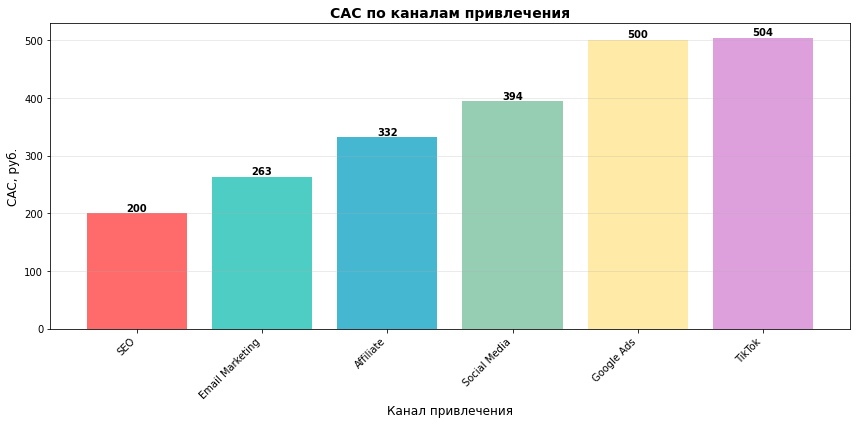


Средний CAC: 365.59 руб.


In [52]:
# Расчет CAC по каналам привлечения
# Затраты на привлечение по каналам
campaign_spend = pa_marketplace_campaign_costs.groupby('acq_channel')['budget'].sum().reset_index()
campaign_spend.columns = ['channel', 'total_spend']

# Количество пользователей по каналам
users_by_channel = pa_marketplace_users.groupby('acq_channel')['user_id'].nunique().reset_index()
users_by_channel.columns = ['channel', 'user_count']

# Объединение данных и расчет CAC
cac_analysis = campaign_spend.merge(users_by_channel, on='channel')
cac_analysis['cac'] = cac_analysis['total_spend'] / cac_analysis['user_count']
cac_analysis = cac_analysis.sort_values('cac')

# Вывод данных
print("CAC по каналам привлечения:")
print("=" * 40)
for index, row in cac_analysis.iterrows():
    print(f"{row['channel']}: {row['cac']:.2f} руб. ({row['user_count']:,.0f} пользователей)")

# Визуализация
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(cac_analysis)), cac_analysis['cac'], 
                color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8'])

# Добавление значений на столбцы
for i, (bar, cac_value) in enumerate(zip(bars, cac_analysis['cac'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{cac_value:.0f}', ha='center', va='bottom', fontweight='bold')

plt.title('CAC по каналам привлечения', fontsize=14, fontweight='bold')
plt.xlabel('Канал привлечения', fontsize=12)
plt.ylabel('CAC, руб.', fontsize=12)
plt.xticks(range(len(cac_analysis)), cac_analysis['channel'], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Средний CAC
avg_cac = cac_analysis['cac'].mean()
print(f"\nСредний CAC: {avg_cac:.2f} руб.")

На самый убыточный TikTok тратят 504 рубля. На прибыльные Google - 500 рублей, на Affiliate - 332 рубля.

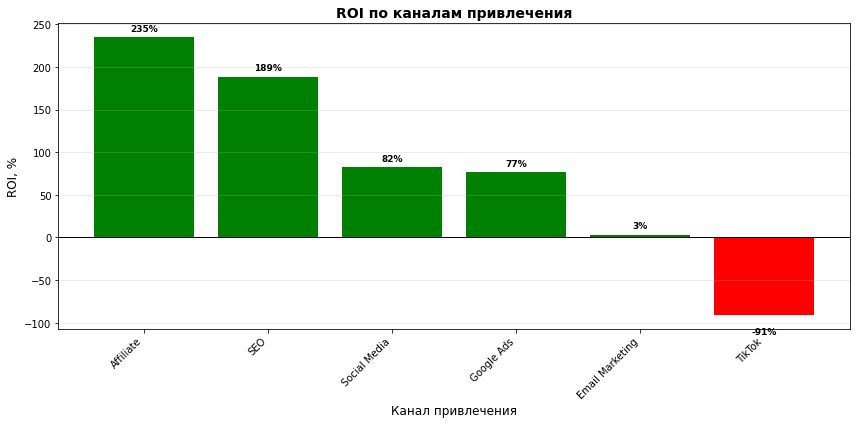

ROI по каналам привлечения:
Affiliate: 235% (LTV: 1110 руб., CAC: 332 руб.)
SEO: 189% (LTV: 577 руб., CAC: 200 руб.)
Social Media: 82% (LTV: 718 руб., CAC: 394 руб.)
Google Ads: 77% (LTV: 884 руб., CAC: 500 руб.)
Email Marketing: 3% (LTV: 272 руб., CAC: 263 руб.)
TikTok: -91% (LTV: 47 руб., CAC: 504 руб.)


In [53]:
# Расчет ROI по каналам
channels_roi = []

# Получаем уникальные каналы
channels = pa_marketplace_users['acq_channel'].unique()

for channel in channels:
    # Фильтруем данные по каналу
    channel_users = pa_marketplace_users[pa_marketplace_users['acq_channel'] == channel]
    channel_user_ids = channel_users['user_id'].tolist()
    channel_orders = pa_marketplace_orders[pa_marketplace_orders['user_id'].isin(channel_user_ids)]
    channel_costs = pa_marketplace_campaign_costs[pa_marketplace_campaign_costs['acq_channel'] == channel]
    
    # Расчет метрик
    users_count = len(channel_user_ids)
    total_revenue = channel_orders['revenue'].sum()
    total_spend = channel_costs['budget'].sum()
    
    # Расчет LTV и CAC
    ltv = total_revenue / users_count if users_count > 0 else 0
    cac = total_spend / users_count if users_count > 0 else 0
    
    # Расчет ROI
    roi = ((ltv - cac) / cac * 100) if cac > 0 else 0
    
    channels_roi.append({
        'channel': channel,
        'roi': roi,
        'ltv': ltv,
        'cac': cac
    })

# Создание DataFrame и сортировка по ROI
roi_df = pd.DataFrame(channels_roi)
roi_df = roi_df.sort_values('roi', ascending=False)

# Визуализация ROI по каналам
plt.figure(figsize=(12, 6))
colors = ['green' if roi > 0 else 'red' for roi in roi_df['roi']]
bars = plt.bar(range(len(roi_df)), roi_df['roi'], color=colors)

# Добавление значений на столбцы
for i, (bar, roi_value) in enumerate(zip(bars, roi_df['roi'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (5 if roi_value > 0 else -15),
             f'{roi_value:.0f}%', ha='center', va='bottom' if roi_value > 0 else 'top', 
             fontweight='bold', fontsize=9)

plt.title('ROI по каналам привлечения', fontsize=14, fontweight='bold')
plt.xlabel('Канал привлечения', fontsize=12)
plt.ylabel('ROI, %', fontsize=12)
plt.xticks(range(len(roi_df)), roi_df['channel'], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.axhline(y=0, color='black', linewidth=1)
plt.tight_layout()
plt.show()

# Вывод данных
print("ROI по каналам привлечения:")
print("=" * 40)
for index, row in roi_df.iterrows():
    print(f"{row['channel']}: {row['roi']:.0f}% (LTV: {row['ltv']:.0f} руб., CAC: {row['cac']:.0f} руб.)")

Все каналы окупаются окупаются, кроме TikTok (ROI -91%). Лидеры - Affiliate (235%) и SEO (189%).

In [54]:
# Задаем порядок шагов в воронке
funnel_steps = ['page_view', 'product_view', 'product_click', 'add_to_cart', 'checkout_start',
 'checkout_complete']


# Фильтруем датасет оставляя только нужные шаги воронки
funnel_df_steps = pa_marketplace_events[pa_marketplace_events['event_type'].isin(funnel_steps)]
# Считаем число уникальных пользователей на каждом шаге
funnel_counts = funnel_df_steps.groupby('event_type')['user_id'].nunique().reindex(funnel_steps)


# Собираем таблицу воронки
funnel_df = pd.DataFrame({
   'step': funnel_steps,
   'users': funnel_counts.values
})

# Добавляем конверсии и округляем до 1 знака после запятой
funnel_df['conversion_from_first_%'] = round((funnel_df['users'] / funnel_df['users'].iloc[0] * 100), 1)
funnel_df['conversion_from_previous_%'] = round((funnel_df['users'] / funnel_df['users'].shift(1) * 100), 1)

display(funnel_df.head(10))

,step,users,conversion_from_first_%,conversion_from_previous_%
0,page_view,22098,100.0,NaN
1,product_view,22069,99.9,99.9
2,product_click,21745,98.4,98.5
3,add_to_cart,20411,92.4,93.9
4,checkout_start,16769,75.9,82.2
5,checkout_complete,13897,62.9,82.9


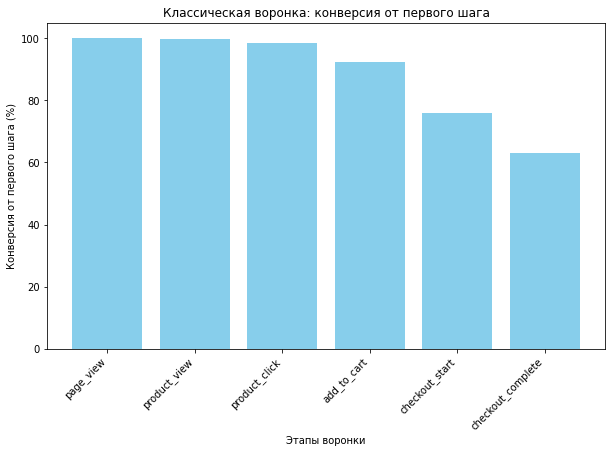

In [55]:
# Визуализируем данные, кроме первого шага, чтобы не выводить NaN
plt.figure(figsize=(10, 6))
# Строим barplot

plt.bar(funnel_df['step'], funnel_df['conversion_from_first_%'], color='skyblue')
plt.xticks(funnel_df['step'], rotation=45, ha='right')
plt.title('Классическая воронка: конверсия от первого шага')
plt.ylabel('Конверсия от первого шага (%)')
plt.xlabel('Этапы воронки')
plt.show()


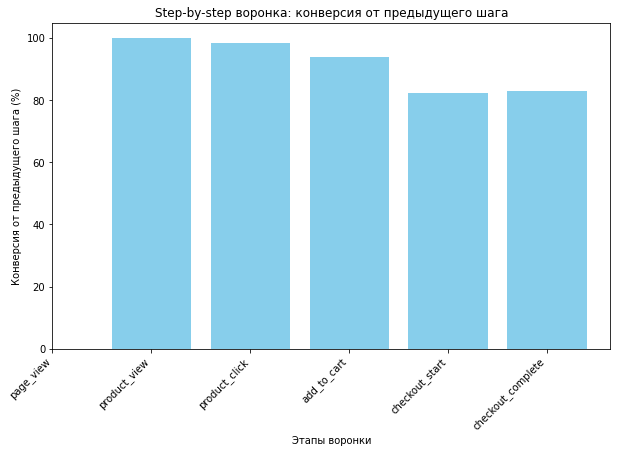

In [56]:
# Визуализируем данные, кроме первого шага, чтобы не выводить NaN
plt.figure(figsize=(10, 6))
# Строим barplot

plt.bar(funnel_df['step'], funnel_df['conversion_from_previous_%'], color='skyblue')
plt.xticks(funnel_df['step'], rotation=45, ha='right')
plt.title('Step-by-step воронка: конверсия от предыдущего шага')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

In [57]:
# Получаем уникальные каналы привлечения
channels = pa_marketplace_users['acq_channel'].unique()

# Создаем пустой список для хранения результатов
funnel_results = []

# Проходим по каждому каналу
for channel in channels:
    # Получаем user_id для текущего канала
    channel_users = pa_marketplace_users[pa_marketplace_users['acq_channel'] == channel]['user_id']
    
    # Фильтруем события только для этих пользователей и нужных шагов
    funnel_df_steps = pa_marketplace_events[
        (pa_marketplace_events['user_id'].isin(channel_users)) &
        (pa_marketplace_events['event_type'].isin(funnel_steps))
    ]
    
    # Считаем уникальных пользователей на каждом шаге
    funnel_counts = funnel_df_steps.groupby('event_type')['user_id'].nunique().reindex(funnel_steps)
    
    # Создаем датафрейм для текущего канала
    channel_funnel = pd.DataFrame({
        'step': funnel_steps,
        'users': funnel_counts.values,
        'acq_channel': channel
    })
    
    # Добавляем конверсии
    channel_funnel['conversion_from_first_%'] = round((channel_funnel['users'] / channel_funnel['users'].iloc[0]) * 100, 1)
    channel_funnel['conversion_from_previous_%'] = round((channel_funnel['users'] / channel_funnel['users'].shift(1)) * 100, 1)
    
    # Добавляем в общий список
    funnel_results.append(channel_funnel)

# Объединяем все результаты в один датафрейм
final_funnel_df = pd.concat(funnel_results, ignore_index=True)

# Выводим результат
display(final_funnel_df)

,step,users,acq_channel,conversion_from_first_%,conversion_from_previous_%
0,page_view,5611,Google Ads,100.0,NaN
1,product_view,5607,Google Ads,99.9,99.9
2,product_click,5561,Google Ads,99.1,99.2
3,add_to_cart,5344,Google Ads,95.2,96.1
4,checkout_start,4676,Google Ads,83.3,87.5
5,checkout_complete,4105,Google Ads,73.2,87.8
6,page_view,1272,Email Marketing,100.0,NaN
7,product_view,1272,Email Marketing,100.0,100.0
8,product_click,1265,Email Marketing,99.4,99.4
9,add_to_cart,1210,Email Marketing,95.1,95.7


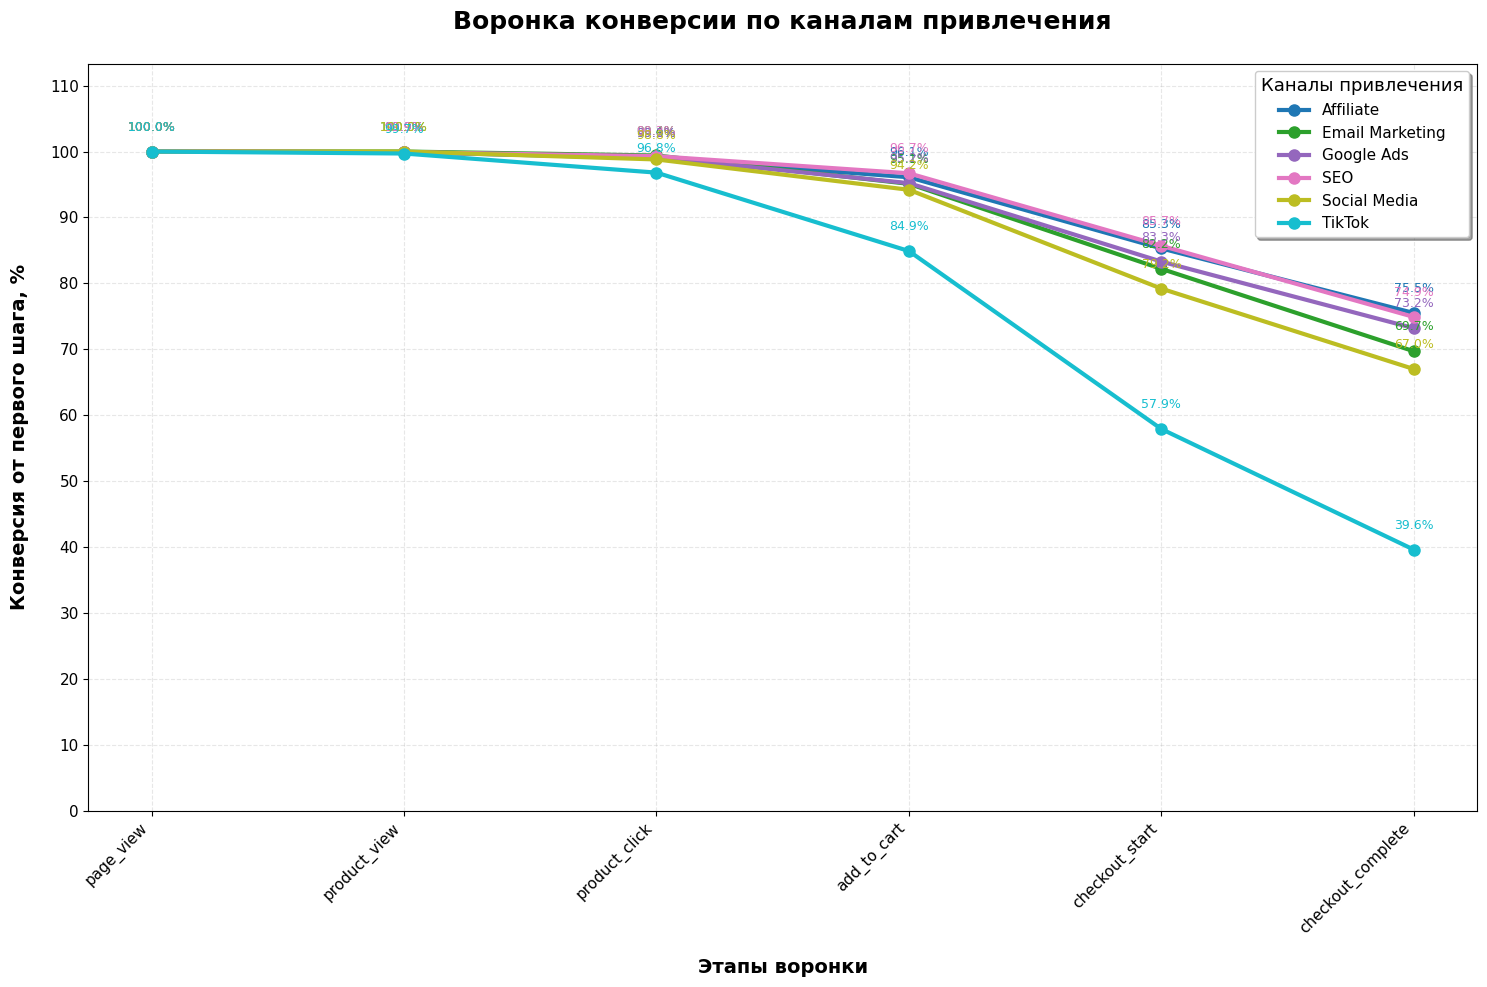

In [58]:
# Устанавливаем стиль
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 11

# Создаем сводную таблицу
pivot_df = final_funnel_df.pivot_table(
    index='acq_channel', 
    columns='step', 
    values='conversion_from_first_%'
)

# Подготовка данных
channels = pivot_df.index
steps = funnel_steps

# Создаем фигуру и оси
fig, ax = plt.subplots(figsize=(15, 10))

# Цветовая палитра
colors = plt.cm.tab10(np.linspace(0, 1, len(channels)))

# Для каждого канала строим линию
for i, channel in enumerate(channels):
    # Убираем NaN значения
    channel_data = pivot_df.loc[channel].dropna()
    channel_steps = [step for step in steps if step in channel_data.index]
    channel_values = [channel_data[step] for step in channel_steps]
    
    line = ax.plot(range(len(channel_steps)), channel_values, 
                   marker='o', linewidth=3, markersize=8, 
                   label=channel, color=colors[i])
    
    # Добавляем значения на точки
    for j, (step, value) in enumerate(zip(channel_steps, channel_values)):
        ax.annotate(f'{value:.1f}%', 
                   (j, value), 
                   textcoords="offset points", 
                   xytext=(0,15), 
                   ha='center', 
                   fontsize=9,
                   color=colors[i])

# Настройки осей
ax.set_xlabel('Этапы воронки', fontsize=14, fontweight='bold', labelpad=15)
ax.set_ylabel('Конверсия от первого шага, %', fontsize=14, fontweight='bold', labelpad=15)
ax.set_title('Воронка конверсии по каналам привлечения', fontsize=18, fontweight='bold', pad=25)

# Настройка меток по оси X
ax.set_xticks(range(len(steps)))
ax.set_xticklabels(steps, rotation=45, ha='right', fontsize=11)

# Настройка сетки
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Легенда
ax.legend(title='Каналы привлечения', title_fontsize=13, fontsize=11, 
          loc='upper right', frameon=True, fancybox=True, shadow=True)

# Настройка пределов осей для лучшей читаемости
ax.set_ylim(0, ax.get_ylim()[1] * 1.1)

# Добавляем больше промежуточных линий сетки по Y
ax.yaxis.set_major_locator(plt.MultipleLocator(10))

plt.tight_layout()
plt.show()

In [59]:
# 1. Получаем user_id, привлечённых через TikTok
tiktok_users = pa_marketplace_users[pa_marketplace_users['acq_channel'] == 'TikTok']['user_id']

# 2. Фильтруем события только для этих пользователей и нужных шагов
funnel_df_steps = pa_marketplace_events[
    (pa_marketplace_events['user_id'].isin(tiktok_users)) &
    (pa_marketplace_events['event_type'].isin(funnel_steps))
]

# 3. Считаем уникальных пользователей на каждом шаге
funnel_counts = funnel_df_steps.groupby('event_type')['user_id'].nunique().reindex(funnel_steps)

# 4. Создаём датафрейм воронки
funnel_df = pd.DataFrame({
    'step': funnel_steps,
    'users': funnel_counts.values
})

# 5. Добавляем конверсии
funnel_df['conversion_from_first_%'] = round((funnel_df['users'] / funnel_df['users'].iloc[0]) * 100, 1)
funnel_df['conversion_from_previous_%'] = round((funnel_df['users'] / funnel_df['users'].shift(1)) * 100, 1)

# Выводим результат
display(funnel_df)

,step,users,conversion_from_first_%,conversion_from_previous_%
0,page_view,6651,100.0,NaN
1,product_view,6631,99.7,99.7
2,product_click,6438,96.8,97.1
3,add_to_cart,5649,84.9,87.7
4,checkout_start,3849,57.9,68.1
5,checkout_complete,2633,39.6,68.4


В пошаговой воронке самые большие потери при просмотре товара (70%) и покупке после добавления в корзину (28%).

<div class="alert alert-warning">
<b>🤔 Рекомендация:</b>
Здесь нужно построить или разные воронки от первого и от предыдущего шага, общие и для различных сегментов, это позволит понять есть ли какие то проблемы у конкретных сегментов и на каком шаге (например сейчас нет оснований говорить, что большинство пользователей теряется в TikTok, по этому каналу воронка не строилась, как и по другим, то есть всегда должны быть наглядные доказательства. Можно пойти дальше и взять только пользователей TikTok и разделить их по другим сегментам и посмотреть на них), или воронку, где сразу будет расчет и от первого и от предыдущего шага, примеры таких воронок можно посмотреть здесь
    
https://habr.com/ru/companies/otus/articles/588190/
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Поправил, конверсии посчитал.
    
   </div>

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [60]:
# Создание сводной таблицы по каналам привлечения
channels_summary = []

# Получаем уникальные каналы
channels = pa_marketplace_users['acq_channel'].unique()

for channel in channels:
    # Фильтруем данные по каналу
    channel_users = pa_marketplace_users[pa_marketplace_users['acq_channel'] == channel]
    channel_user_ids = channel_users['user_id'].tolist()
    
    # Фильтруем заказы только для пользователей этого канала
    channel_orders = pa_marketplace_orders[pa_marketplace_orders['user_id'].isin(channel_user_ids)]
    
    # Фильтруем затраты по каналу
    channel_costs = pa_marketplace_campaign_costs[pa_marketplace_campaign_costs['acq_channel'] == channel]
    
    # Расчет метрик
    users_count = len(channel_user_ids)
    paying_users_count = channel_orders['user_id'].nunique()
    total_revenue = channel_orders['revenue'].sum()
    total_spend = channel_costs['budget'].sum()
    
    # Расчет метрик (избегаем деления на ноль)
    ltv = total_revenue / users_count if users_count > 0 else 0
    cac = total_spend / users_count if users_count > 0 else 0
    arppu = total_revenue / paying_users_count if paying_users_count > 0 else 0
    roi = ((ltv - cac) / cac * 100) if cac > 0 else 0
    
    channels_summary.append({
        'channel': channel,
        'users_count': users_count,
        'ltv': ltv,
        'cac': cac,
        'arppu': arppu,
        'roi': roi
    })

# Создание DataFrame
summary_df = pd.DataFrame(channels_summary)
summary_df = summary_df.sort_values('roi', ascending=False)

# Вывод таблицы
print("Метрики по каналам привлечения:")
print("=" * 100)
print(f"{'Канал':<15} {'Пользователи':<12} {'LTV':<8} {'CAC':<8} {'ARPPU':<8} {'ROI,%':<8}")
print("-" * 100)

for index, row in summary_df.iterrows():
    print(f"{row['channel']:<15} {row['users_count']:<12,} {row['ltv']:<8.0f} {row['cac']:<8.0f} "
          f"{row['arppu']:<8.0f} {row['roi']:<8.0f}")

# Средние значения
print("\nСредние значения:")
print(f"Средний CAC: {summary_df['cac'].mean():.0f} руб.")
print(f"Средний LTV: {summary_df['ltv'].mean():.0f} руб.")
print(f"Средний ROI: {summary_df['roi'].mean():.0f}%")

Метрики по каналам привлечения:
Канал           Пользователи LTV      CAC      ARPPU    ROI,%   
----------------------------------------------------------------------------------------------------
Affiliate       6,069        1110     332      2881     235     
SEO             3,312        577      200      2185     189     
Social Media    4,179        718      394      2478     82      
Google Ads      9,319        884      500      2584     77      
Email Marketing 2,044        272      263      1710     3       
TikTok          19,228       47       504      1266     -91     

Средние значения:
Средний CAC: 366 руб.
Средний LTV: 601 руб.
Средний ROI: 82%


## Выводы по этапу 4

Представьте ключевые выводы в текстовом виде здесь или приложите ссылку на документ с презентацией.

Не забудьте предоставить доступ на просмотр и комментирование документа.

Основные выводы.
Финансовые показатели:

Лидеры по выручке: Google Ads и Affiliate каналы, что подтверждает их высокую эффективность

Проблемный канал: TikTok с отрицательным ROI (-91%) и высокими затратами на привлечение (504 руб.)

Географическое распределение: Москва и Санкт-Петербург являются ключевыми регионами по объему выручки



Поведенческие паттерны:
    
Конверсия: Слабое звено воронки - переход от добавления в корзину к покупке (только 28% конверсия)
    
Средний чек: Значительные различия между каналами - от 1,266 руб. (TikTok) до 2,881 руб. (Affiliate)
    
Сезонность: Пик активности в мае-августе, спад к декабрю
    
Сегментация:
    
Сегменты пользователей: Постоянные клиенты тратят в 4 раза больше, чем разовые покупатели
    
Категории товаров: Мебель, бытовая техника и украшения лидируют по среднему чеку
    
Каналы: Affiliate и Google Ads привлекают наиболее платежеспособных пользователей
    

Гипотезы для развития продукта:
1. Оптимизация проблемных каналов

Гипотеза: Если снизить бюджет на TikTok на 70% и перераспределить средства в Affiliate и Google Ads, то общий ROI увеличится на 15%.

Обоснование: TikTok показывает максимальный LTV всего 81 рубль при CAC 504 рубля, в то время как Affiliate имеет ROI 235% и привлекает 13% пользователей.

2. Персонализация для постоянных клиентов

Гипотеза: Если предложить постоянным клиентам эксклюзивные предложения и программу лояльности, то их средний чек увеличится на 15%.

Обоснование: Постоянные клиенты уже тратят в среднем 4,007 руб., что в 4 раза больше разовых покупателей (857 руб.) - есть потенциал для роста.

3. Кросс-продажи в высокочековым категориям

Гипотеза: Если внедрить систему рекомендаций "с этим товаром часто покупают" для категорий мебели и бытовой техники, то средний чек увеличится на 10%.

Обоснование: Категории мебели, бытовой техники и украшений лидируют по среднему чеку, но продукты питания, несмотря на популярность, не попадают в топ-10 по чеку - есть потенциал кросс-продаж.

4. Географические цели для региональных лидеров

Гипотеза: Если запустить специальные акции для Екатеринбурга и Краснодара (регионы с высоким ARPPU), то выручка в этих регионах возрастет на 15%.

Обоснование: Екатеринбург и Краснодар показывают самый высокий ARPPU (2,736 и 2,513 руб. соответственно), превышая даже столичные регионы.



<div class="alert alert-success">
<b>👍 Успех:</b> Теперь все вижу!
</div>

## 5. Подготовка эксперимента и подведение его результатов

Получите вводную информацию для выполнения этого этапа у ревьюера после успешного завершения предыдущих шагов.

In [61]:
pa_diploma_events_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_events_AB.csv')
pa_diploma_orders_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_orders_AB.csv')
pa_diploma_sessions_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_sessions_AB.csv')
pa_diploma_users_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_users_AB.csv')
pa_diploma_AB_split_users = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_AB_split_users.csv')

In [62]:
pa_diploma_events_AB.head()

,event_id,session_id,user_id,event_date,event_type,os,device,event_index,user_segment,product_name,event_week,event_month
0,3132,479,100,2024-01-01 15:23:56,page_view,iOS,mobile,1,regular,NaN,2024-01-01,2024-01-01
1,3133,479,100,2024-01-01 15:24:01,product_view,iOS,mobile,2,regular,Шорты для тренировок,2024-01-01,2024-01-01
2,3134,479,100,2024-01-01 15:24:10,product_click,iOS,mobile,3,regular,Куртка детская,2024-01-01,2024-01-01
3,3135,479,100,2024-01-01 15:25:10,add_to_cart,iOS,mobile,4,regular,Балетки классические,2024-01-01,2024-01-01
4,3136,479,100,2024-01-01 15:25:46,checkout_start,iOS,mobile,5,regular,NaN,2024-01-01,2024-01-01


In [63]:
pa_diploma_events_AB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831231 entries, 0 to 831230
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   event_id      831231 non-null  int64 
 1   session_id    831231 non-null  int64 
 2   user_id       831231 non-null  int64 
 3   event_date    831231 non-null  object
 4   event_type    831231 non-null  object
 5   os            831231 non-null  object
 6   device        831231 non-null  object
 7   event_index   831231 non-null  int64 
 8   user_segment  831231 non-null  object
 9   product_name  409054 non-null  object
 10  event_week    831231 non-null  object
 11  event_month   831231 non-null  object
dtypes: int64(4), object(8)
memory usage: 76.1+ MB


In [64]:
pa_diploma_events_AB.duplicated().sum()

0

In [65]:
pa_diploma_orders_AB.head()

,order_id,user_id,order_date,product_name,quantity,unit_price,total_price,category_name,order_week,order_month
0,1,3,2024-01-19 01:52:52.000,Шуруповерт,2,5539.13,11078.26,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
1,2,3,2024-01-19 01:52:52.000,Молоток слесарный,1,11340.38,11340.38,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
2,3,3,2024-01-19 01:52:52.000,Секатор садовый,2,10892.09,21784.18,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
3,4,3,2024-01-25 13:59:38.000,Шуруповерт,2,5539.13,11078.26,Инструменты и садовый инвентарь,2024-01-22,2024-01-01
4,5,3,2024-01-25 13:59:38.000,Чай черный,1,2099.59,2099.59,Продукты питания,2024-01-22,2024-01-01


In [66]:
pa_diploma_orders_AB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33280 entries, 0 to 33279
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       33280 non-null  int64  
 1   user_id        33280 non-null  int64  
 2   order_date     33280 non-null  object 
 3   product_name   33280 non-null  object 
 4   quantity       33280 non-null  int64  
 5   unit_price     33280 non-null  float64
 6   total_price    33280 non-null  float64
 7   category_name  33280 non-null  object 
 8   order_week     33280 non-null  object 
 9   order_month    33280 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 2.5+ MB


In [67]:
pa_diploma_orders_AB.duplicated().sum()

0

In [68]:
pa_diploma_sessions_AB.head()

,session_id,user_id,session_start,os,device,region,browser,country,entry_path,path_start,utm_source,screen_size,scroll_depth,user_segment,utm_campaign_id,session_week,session_month
0,705,160,2024-01-12 02:30:37.000,Windows,mobile,Москва,Safari,Россия,/home,/recommend/10,unknown,768x1024,51,regular,14.0,2024-01-08,2024-01-01
1,706,160,2024-01-10 06:04:41.000,Windows,mobile,Москва,Safari,Россия,/home,/sale/2,unknown,375x667,71,regular,14.0,2024-01-08,2024-01-01
2,707,160,2024-01-23 03:31:16.000,Windows,mobile,Москва,Safari,Россия,/checkout,/click/20,unknown,768x1024,84,regular,14.0,2024-01-22,2024-01-01
3,708,160,2024-01-18 13:43:45.000,Windows,mobile,Москва,Safari,Россия,/category,/campaign/20,unknown,768x1024,20,regular,14.0,2024-01-15,2024-01-01
4,709,160,2024-01-21 01:09:58.000,Windows,mobile,Москва,Safari,Россия,/promo,/sale/3,unknown,1366x768,88,regular,14.0,2024-01-15,2024-01-01


In [69]:
pa_diploma_sessions_AB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127407 entries, 0 to 127406
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   session_id       127407 non-null  int64  
 1   user_id          127407 non-null  int64  
 2   session_start    127407 non-null  object 
 3   os               127407 non-null  object 
 4   device           127407 non-null  object 
 5   region           127407 non-null  object 
 6   browser          127407 non-null  object 
 7   country          127407 non-null  object 
 8   entry_path       127407 non-null  object 
 9   path_start       127407 non-null  object 
 10  utm_source       127407 non-null  object 
 11  screen_size      127407 non-null  object 
 12  scroll_depth     127407 non-null  int64  
 13  user_segment     127407 non-null  object 
 14  utm_campaign_id  127079 non-null  float64
 15  session_week     127407 non-null  object 
 16  session_month    127407 non-null  obje

In [70]:
pa_diploma_sessions_AB.duplicated().sum()

0

In [71]:
pa_diploma_users_AB.head()

,user_id,registration_date,os,age,device,gender,region,browser,country,acq_channel,campaign_id,user_segment,buyer_segment,cohort_week,cohort_month
0,18,2024-01-01 05:26:00,Android,49,mobile,M,Екатеринбург,Edge,Россия,TikTok,10.0,спящий,one_time,2024-01-01,2024-01-01
1,22,2024-01-01 17:13:00,iOS,50,tablet,M,Санкт-Петербург,Chrome,Россия,TikTok,43.0,VIP,one_time,2024-01-01,2024-01-01
2,26,2024-01-01 21:15:00,iOS,60,desktop,F,Москва,Firefox,Россия,TikTok,27.0,активный,rare,2024-01-01,2024-01-01
3,33,2024-01-01 14:43:00,iOS,31,desktop,M,Екатеринбург,Firefox,Россия,TikTok,15.0,новичок,rare,2024-01-01,2024-01-01
4,39,2024-01-01 01:13:00,Android,44,tablet,M,Санкт-Петербург,Firefox,Россия,TikTok,15.0,спящий,rare,2024-01-01,2024-01-01


In [72]:
pa_diploma_users_AB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22196 entries, 0 to 22195
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            22196 non-null  int64  
 1   registration_date  22196 non-null  object 
 2   os                 22196 non-null  object 
 3   age                22196 non-null  int64  
 4   device             22196 non-null  object 
 5   gender             22196 non-null  object 
 6   region             22196 non-null  object 
 7   browser            22196 non-null  object 
 8   country            22196 non-null  object 
 9   acq_channel        22196 non-null  object 
 10  campaign_id        22196 non-null  float64
 11  user_segment       22196 non-null  object 
 12  buyer_segment      22196 non-null  object 
 13  cohort_week        22196 non-null  object 
 14  cohort_month       22196 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 2.5+ MB


In [73]:
pa_diploma_users_AB.duplicated().sum()

0

In [74]:
pa_diploma_AB_split_users.head()

,user_id,group
0,44965,control
1,44967,control
2,44968,control
3,44969,treatment
4,44970,control


In [75]:
pa_diploma_AB_split_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2968 entries, 0 to 2967
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  2968 non-null   int64 
 1   group    2968 non-null   object
dtypes: int64(1), object(1)
memory usage: 46.5+ KB


In [76]:
pa_diploma_AB_split_users.duplicated().sum()

0

In [77]:
# Преобразуем в формат даты
pa_diploma_events_AB['event_date'] = pd.to_datetime(pa_diploma_events_AB['event_date'])  
pa_diploma_orders_AB['order_date'] = pd.to_datetime(pa_diploma_orders_AB['order_date'])
pa_diploma_users_AB['registration_date'] = pd.to_datetime(pa_diploma_users_AB['registration_date'])  

In [78]:
# Просмотр структуры данных
# Получение списка участников эксперимента
experiment_users = pa_diploma_AB_split_users['user_id'].unique()


# Распределение по группам
group_distribution = pa_diploma_AB_split_users['group'].value_counts()
print(f"\nРаспределение по группам:")
print(group_distribution)

# Фильтрация данных только по участникам эксперимента
events_experiment = pa_diploma_events_AB[pa_diploma_events_AB['user_id'].isin(experiment_users)]
orders_experiment = pa_diploma_orders_AB[pa_diploma_orders_AB['user_id'].isin(experiment_users)]

print(f"\nСобытия участников эксперимента: {len(events_experiment)}")
print(f"Заказы участников эксперимента: {len(orders_experiment)}")

# Объединение данных пользователей с группами
users_with_groups = pa_diploma_users_AB.merge(pa_diploma_AB_split_users, on='user_id', how='inner')
print(f"\nПользователи с группами: {len(users_with_groups)}")

# Проверка распределения по группам
group_check = users_with_groups['group'].value_counts()
print(f"\nПроверка распределения по группам:")
print(group_check)


Распределение по группам:
control      1503
treatment    1465
Name: group, dtype: int64

События участников эксперимента: 4349
Заказы участников эксперимента: 255

Пользователи с группами: 2968

Проверка распределения по группам:
control      1503
treatment    1465
Name: group, dtype: int64


In [79]:

# Обрезка датасетов, оставив только данные по участникам теста
events_experiment = pa_diploma_events_AB[pa_diploma_events_AB['user_id'].isin(experiment_users)]
orders_experiment = pa_diploma_orders_AB[pa_diploma_orders_AB['user_id'].isin(experiment_users)]
users_experiment = pa_diploma_users_AB[pa_diploma_users_AB['user_id'].isin(experiment_users)]

print(f"\nДанные после фильтрации:")
print(f"События: {len(events_experiment)}")
print(f"Заказы: {len(orders_experiment)}")
print(f"Пользователи: {len(users_experiment)}")

# Объединение пользователей с группами
users_with_groups = users_experiment.merge(pa_diploma_AB_split_users, on='user_id', how='inner')
print(f"Пользователи с группами: {len(users_with_groups)}")

# Проверка распределения по группам после объединения
group_check = users_with_groups['group'].value_counts()
print(f"\nРаспределение по группам после объединения:")
print(group_check)




Данные после фильтрации:
События: 4349
Заказы: 255
Пользователи: 2968
Пользователи с группами: 2968

Распределение по группам после объединения:
control      1503
treatment    1465
Name: group, dtype: int64


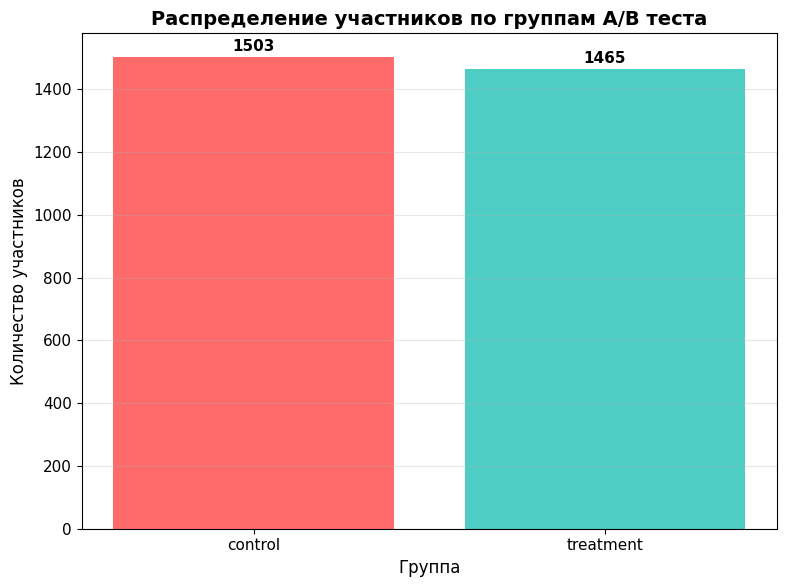

In [80]:
# Визуализация
plt.figure(figsize=(8, 6))
bars = plt.bar(group_distribution.index, group_distribution.values, 
                color=['#FF6B6B', '#4ECDC4'])

# Добавление значений на столбцы
for bar, count in zip(bars, group_distribution.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
             f'{count}', ha='center', va='bottom', fontweight='bold')

plt.title('Распределение участников по группам A/B теста', fontsize=14, fontweight='bold')
plt.xlabel('Группа', fontsize=12)
plt.ylabel('Количество участников', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Выборки посчитаны практически равномерно - 50.64% и 49.36%. Разница 1.28% допустима.

In [81]:
events_experiment.head()

,event_id,session_id,user_id,event_date,event_type,os,device,event_index,user_segment,product_name,event_week,event_month
787804,844987,135457,45076,2025-01-02 03:25:32,page_view,Android,tablet,1,regular,NaN,2024-12-30,2025-01-01
787806,844988,135457,45076,2025-01-02 03:25:49,product_view,Android,tablet,2,regular,Картина маслом,2024-12-30,2025-01-01
787808,844989,135457,45076,2025-01-02 03:26:23,product_click,Android,tablet,3,regular,Сумка кожаная,2024-12-30,2025-01-01
787809,844990,135457,45076,2025-01-02 03:26:50,add_to_cart,Android,tablet,4,regular,Дезодорант,2024-12-30,2025-01-01
787811,844991,135457,45076,2025-01-02 03:27:11,checkout_start,Android,tablet,5,regular,NaN,2024-12-30,2025-01-01


In [82]:
events_experiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4349 entries, 787804 to 831211
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   event_id      4349 non-null   int64         
 1   session_id    4349 non-null   int64         
 2   user_id       4349 non-null   int64         
 3   event_date    4349 non-null   datetime64[ns]
 4   event_type    4349 non-null   object        
 5   os            4349 non-null   object        
 6   device        4349 non-null   object        
 7   event_index   4349 non-null   int64         
 8   user_segment  4349 non-null   object        
 9   product_name  2335 non-null   object        
 10  event_week    4349 non-null   object        
 11  event_month   4349 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 441.7+ KB


In [83]:
orders_experiment.head()

,order_id,user_id,order_date,product_name,quantity,unit_price,total_price,category_name,order_week,order_month
31399,37141,45065,2025-01-01 11:57:43,Цепочка серебряная,3,7202.01,21606.03,Украшения и часы,2024-12-30,2025-01-01
31415,37148,45081,2025-01-01 16:01:22,Куртка детская,2,2156.91,4313.82,Детская одежда,2024-12-30,2025-01-01
31416,37149,45081,2025-01-01 16:01:22,Джинсы детские,1,873.16,873.16,Детская одежда,2024-12-30,2025-01-01
31451,37147,45077,2025-01-02 04:59:13,Корм для кошек,2,851.39,1702.78,Зоотовары,2024-12-30,2025-01-01
31452,37146,45077,2025-01-02 04:59:13,Чай черный,2,239.45,478.90,Продукты питания,2024-12-30,2025-01-01


In [84]:
orders_experiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255 entries, 31399 to 33269
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       255 non-null    int64         
 1   user_id        255 non-null    int64         
 2   order_date     255 non-null    datetime64[ns]
 3   product_name   255 non-null    object        
 4   quantity       255 non-null    int64         
 5   unit_price     255 non-null    float64       
 6   total_price    255 non-null    float64       
 7   category_name  255 non-null    object        
 8   order_week     255 non-null    object        
 9   order_month    255 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 21.9+ KB


In [85]:
users_experiment.head()

,user_id,registration_date,os,age,device,gender,region,browser,country,acq_channel,campaign_id,user_segment,buyer_segment,cohort_week,cohort_month
19228,44965,2025-01-01 18:10:00,iOS,66,desktop,M,Новосибирск,Safari,Россия,TikTok,14.0,новичок,one_time,2024-12-30,2025-01-01
19229,44967,2025-01-01 11:29:00,iOS,70,tablet,M,Московская область,Firefox,Россия,TikTok,13.0,новичок,rare,2024-12-30,2025-01-01
19230,44968,2025-01-01 13:05:00,Android,68,mobile,F,Нижний Новгород,Edge,Россия,TikTok,10.0,спящий,regular,2024-12-30,2025-01-01
19231,44969,2025-01-01 00:23:00,Windows,24,mobile,F,Краснодар,Chrome,Россия,TikTok,8.0,спящий,medium,2024-12-30,2025-01-01
19232,44970,2025-01-01 06:33:00,iOS,50,tablet,M,Санкт-Петербург,Chrome,Россия,TikTok,2.0,спящий,regular,2024-12-30,2025-01-01


In [86]:
users_experiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2968 entries, 19228 to 22195
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            2968 non-null   int64         
 1   registration_date  2968 non-null   datetime64[ns]
 2   os                 2968 non-null   object        
 3   age                2968 non-null   int64         
 4   device             2968 non-null   object        
 5   gender             2968 non-null   object        
 6   region             2968 non-null   object        
 7   browser            2968 non-null   object        
 8   country            2968 non-null   object        
 9   acq_channel        2968 non-null   object        
 10  campaign_id        2968 non-null   float64       
 11  user_segment       2968 non-null   object        
 12  buyer_segment      2968 non-null   object        
 13  cohort_week        2968 non-null   object        
 14  coh

In [87]:
# Проверка минимальных и максимальных дат
min_date = events_experiment['event_date'].min()
max_date = events_experiment['event_date'].max()

print(f"Минимальная дата: {min_date}")
print(f"Максимальная дата: {max_date}")
print(f"Период эксперимента: {max_date - min_date}")

Минимальная дата: 2025-01-02 03:25:32
Максимальная дата: 2025-01-26 23:46:15
Период эксперимента: 24 days 20:20:43


In [88]:
# Посмотрим уникальные значения в типе события
print("\nУникальные значения:")
print(events_experiment['event_type'].unique())


Уникальные значения:
['page_view' 'product_view' 'product_click' 'add_to_cart' 'checkout_start'
 'checkout_complete' 'category_view' 'user_login' 'remove_from_cart'
 'filter_apply' 'wishlist_add' 'promo_view' 'user_logout' 'search'
 'banner_click']


In [89]:
# Задаем порядок шагов в воронке
funnel_steps = ['page_view', 'product_view', 'product_click', 'add_to_cart', 'checkout_start',
 'checkout_complete']


# Фильтруем датасет оставляя только нужные шаги воронки
funnel_df_steps = events_experiment[events_experiment['event_type'].isin(funnel_steps)]
# Считаем число уникальных пользователей на каждом шаге
funnel_counts = funnel_df_steps.groupby('event_type')['user_id'].nunique().reindex(funnel_steps)


# Собираем таблицу воронки
funnel_df = pd.DataFrame({
   'step': funnel_steps,
   'users': funnel_counts.values
})

# Добавляем конверсии и округляем до 1 знака после запятой
funnel_df['conversion_from_first_%'] = round((funnel_df['users'] / funnel_df['users'].iloc[0] * 100), 1)
funnel_df['conversion_from_previous_%'] = round((funnel_df['users'] / funnel_df['users'].shift(1) * 100), 1)

display(funnel_df.head(10))

,step,users,conversion_from_first_%,conversion_from_previous_%
0,page_view,490,100.0,NaN
1,product_view,487,99.4,99.4
2,product_click,470,95.9,96.5
3,add_to_cart,404,82.4,86.0
4,checkout_start,254,51.8,62.9
5,checkout_complete,164,33.5,64.6


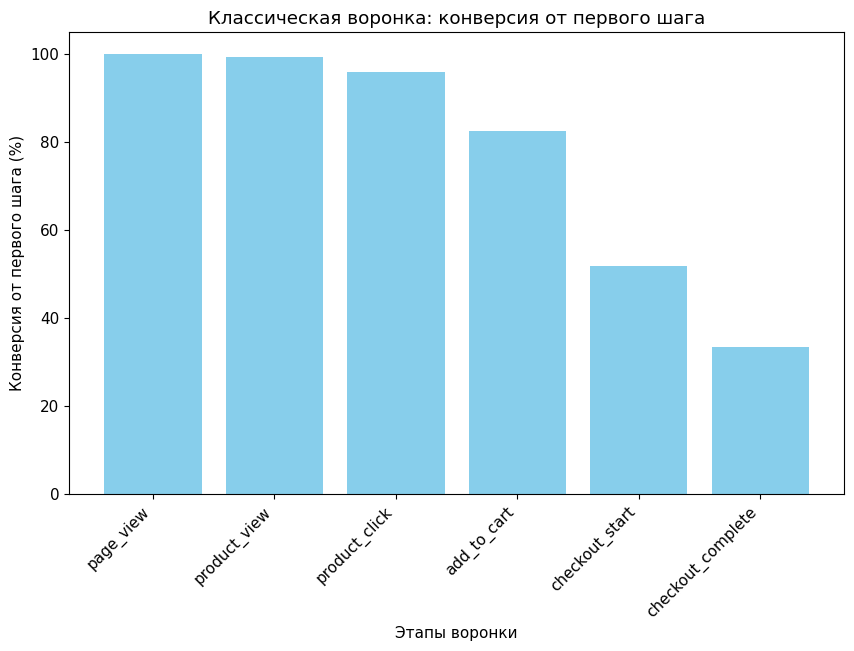

In [90]:
# Визуализируем данные, кроме первого шага, чтобы не выводить NaN
plt.figure(figsize=(10, 6))
# Строим barplot

plt.bar(funnel_df['step'], funnel_df['conversion_from_first_%'], color='skyblue')
plt.xticks(funnel_df['step'], rotation=45, ha='right')
plt.title('Классическая воронка: конверсия от первого шага')
plt.ylabel('Конверсия от первого шага (%)')
plt.xlabel('Этапы воронки')
plt.show()


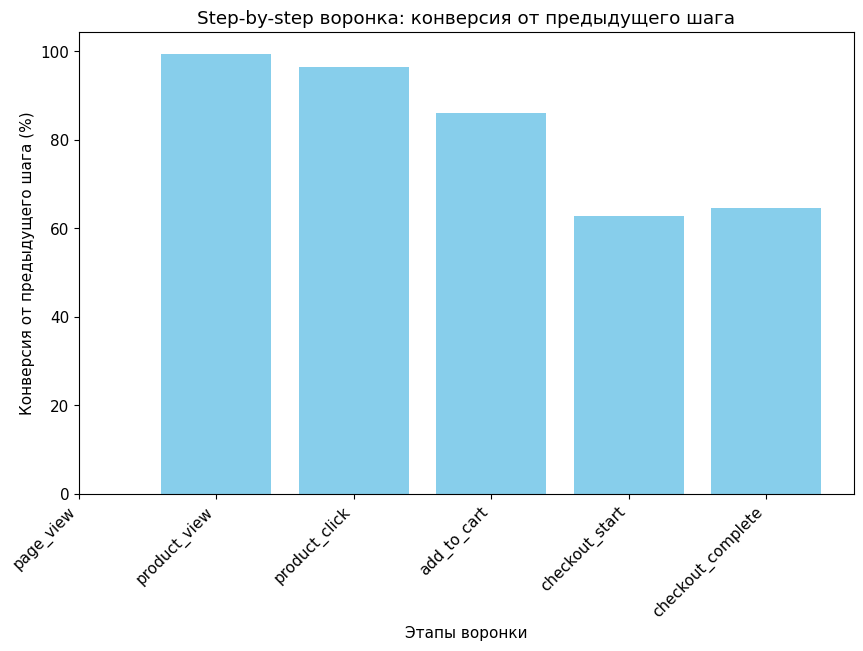

In [91]:
# Визуализируем данные, кроме первого шага, чтобы не выводить NaN
plt.figure(figsize=(10, 6))
# Строим barplot

plt.bar(funnel_df['step'], funnel_df['conversion_from_previous_%'], color='skyblue')
plt.xticks(funnel_df['step'], rotation=45, ha='right')
plt.title('Step-by-step воронка: конверсия от предыдущего шага')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

In [92]:
# Получение участников эксперимента
experiment_users = pa_diploma_AB_split_users['user_id'].unique()
events_experiment = pa_diploma_events_AB[pa_diploma_events_AB['user_id'].isin(experiment_users)]

# Объединение событий с группами
events_with_groups = events_experiment.merge(pa_diploma_AB_split_users, on='user_id', how='inner')

# Задаем порядок шагов воронке
funnel_steps = ['page_view', 'product_view', 'product_click', 'add_to_cart', 'checkout_start', 'checkout_complete']

# Фильтруем датасет, оставляя только нужные шаги воронки
funnel_df_steps = events_with_groups[events_with_groups['event_type'].isin(funnel_steps)]

# Создаем отдельные датасеты для каждой группы
control_group = funnel_df_steps[funnel_df_steps['group'] == 'control']
test_group = funnel_df_steps[funnel_df_steps['group'] == 'treatment']

print(f"\nКоличество записей в контрольной группе: {len(control_group):,}")
print(f"Количество записей в тестовой группе: {len(test_group):,}")



Количество записей в контрольной группе: 1,812
Количество записей в тестовой группе: 1,716


In [93]:
# Считаем число уникальных пользователей на каждом шаге для каждой группы
control_counts = control_group.groupby('event_type')['user_id'].nunique().reindex(funnel_steps).fillna(0)
test_counts = test_group.groupby('event_type')['user_id'].nunique().reindex(funnel_steps).fillna(0)

# Создаем таблицы воронок для каждой группы
control_funnel = pd.DataFrame({
   'step': funnel_steps,
   'users': control_counts.values.astype(int)
})

test_funnel = pd.DataFrame({
   'step': funnel_steps,
   'users': test_counts.values.astype(int)
})

# Добавляем конверсии для каждой группы
control_funnel['conversion_from_first_%'] = round((control_funnel['users'] / control_funnel['users'].iloc[0] * 100), 1)
control_funnel['conversion_from_previous_%'] = round((control_funnel['users'] / control_funnel['users'].shift(1) * 100), 1)

test_funnel['conversion_from_first_%'] = round((test_funnel['users'] / test_funnel['users'].iloc[0] * 100), 1)
test_funnel['conversion_from_previous_%'] = round((test_funnel['users'] / test_funnel['users'].shift(1) * 100), 1)

print("\n=== ВОРОНКА КОНТРОЛЬНОЙ ГРУППЫ ===")
print(control_funnel.to_string(index=False))

print("\n=== ВОРОНКА ТЕСТОВОЙ ГРУППЫ ===")
print(test_funnel.to_string(index=False))


=== ВОРОНКА КОНТРОЛЬНОЙ ГРУППЫ ===
             step  users  conversion_from_first_%  conversion_from_previous_%
        page_view    258                    100.0                         NaN
     product_view    257                     99.6                        99.6
    product_click    245                     95.0                        95.3
      add_to_cart    211                     81.8                        86.1
   checkout_start    126                     48.8                        59.7
checkout_complete     79                     30.6                        62.7

=== ВОРОНКА ТЕСТОВОЙ ГРУППЫ ===
             step  users  conversion_from_first_%  conversion_from_previous_%
        page_view    232                    100.0                         NaN
     product_view    230                     99.1                        99.1
    product_click    225                     97.0                        97.8
      add_to_cart    193                     83.2                        

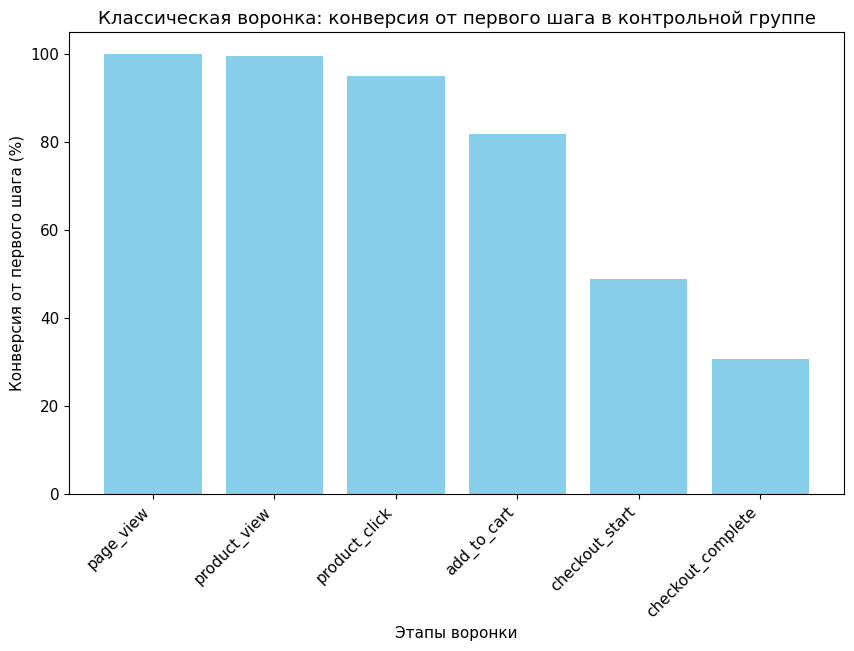

In [94]:
# Визуализируем данные, кроме первого шага, чтобы не выводить NaN
plt.figure(figsize=(10, 6))
# Строим barplot

plt.bar(control_funnel['step'], control_funnel['conversion_from_first_%'], color='skyblue')
plt.xticks(control_funnel['step'], rotation=45, ha='right')
plt.title('Классическая воронка: конверсия от первого шага в контрольной группе')
plt.ylabel('Конверсия от первого шага (%)')
plt.xlabel('Этапы воронки')
plt.show()


В контрольной группе самое большое падение на этапах начала покупки (48.8%) и завершения покупки (30.6%).

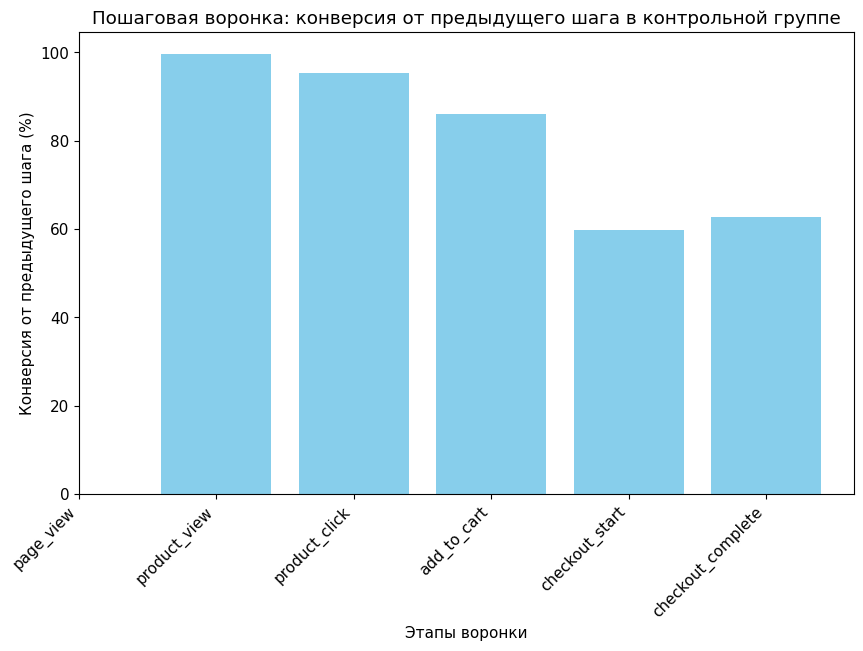

In [95]:
# Визуализируем данные, кроме первого шага, чтобы не выводить NaN
plt.figure(figsize=(10, 6))
# Строим barplot

plt.bar(control_funnel['step'], control_funnel['conversion_from_previous_%'], color='skyblue')
plt.xticks(control_funnel['step'], rotation=45, ha='right')
plt.title('Пошаговая воронка: конверсия от предыдущего шага в контрольной группе')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

После применения бонуса также существенное падение на этапах начала покупки (55.2%, а было 48.8%) и завершения покупки (36.6%, а было 30.6%). 

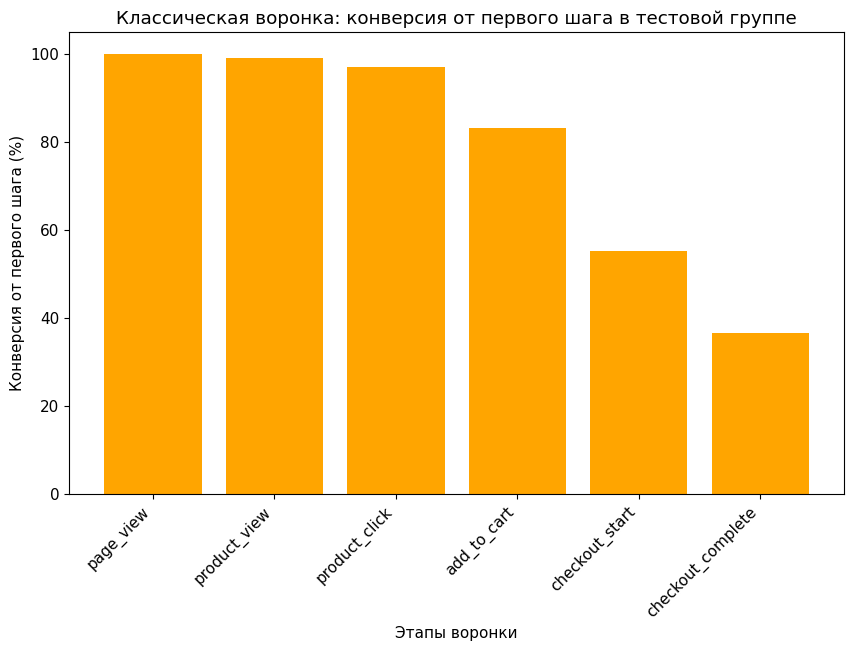

In [96]:
# Визуализируем данные, кроме первого шага, чтобы не выводить NaN
plt.figure(figsize=(10, 6))
# Строим barplot

plt.bar(test_funnel['step'], test_funnel['conversion_from_first_%'], color='orange')
plt.xticks(test_funnel['step'], rotation=45, ha='right')
plt.title('Классическая воронка: конверсия от первого шага в тестовой группе')
plt.ylabel('Конверсия от первого шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

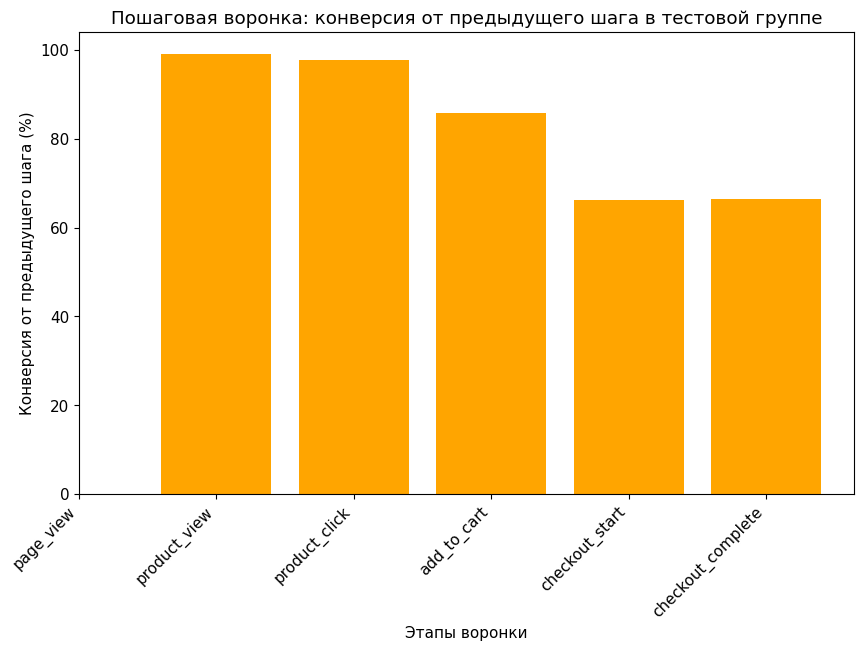

In [97]:
# Визуализируем данные, кроме первого шага, чтобы не выводить NaN
plt.figure(figsize=(10, 6))
# Строим barplot

plt.bar(test_funnel['step'], test_funnel['conversion_from_previous_%'], color='orange')
plt.xticks(test_funnel['step'], rotation=45, ha='right')
plt.title('Пошаговая воронка: конверсия от предыдущего шага в тестовой группе')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

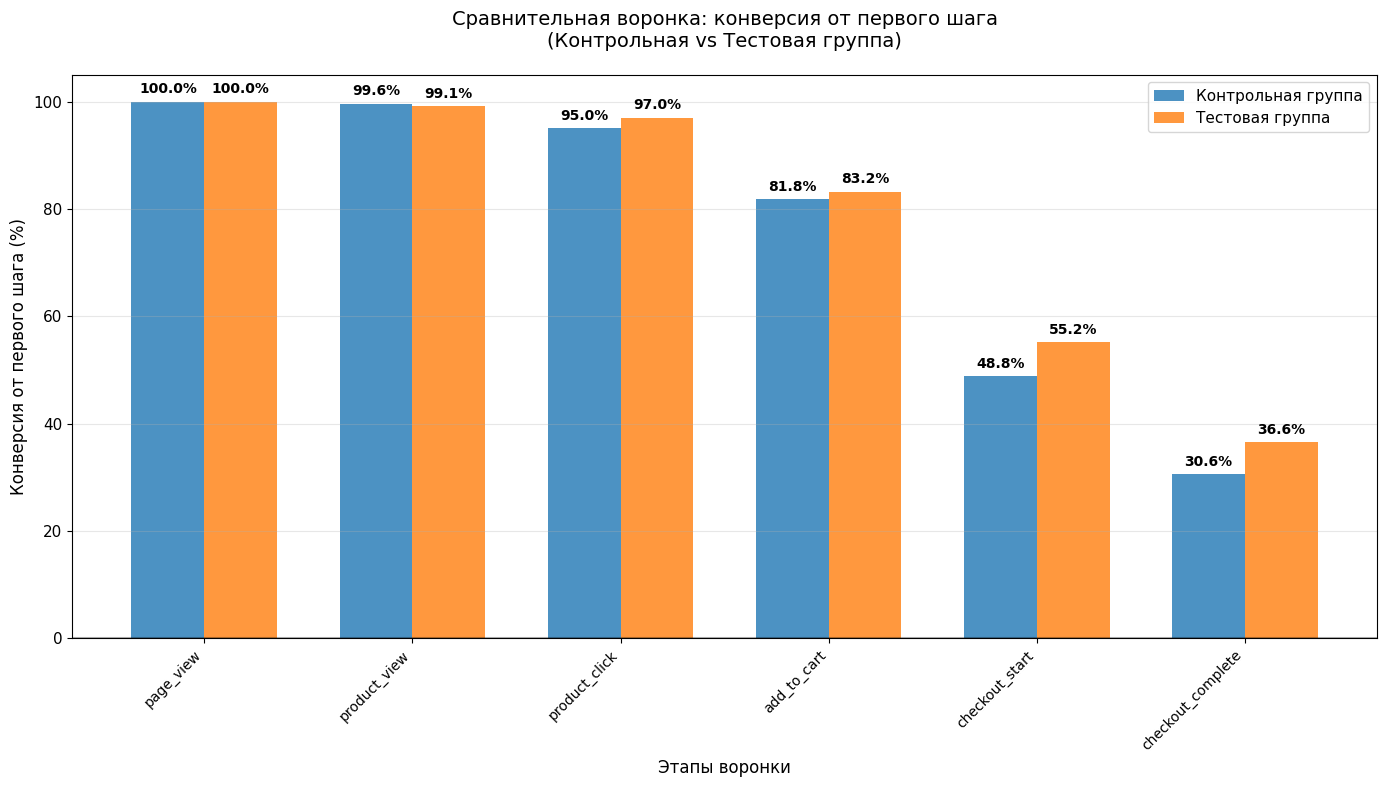

In [98]:
# Создаем сравнительную воронку на одном графике
plt.figure(figsize=(14, 8))

# Определяем положение столбцов (сдвиг для каждой группы)
x_pos = np.arange(len(control_funnel))
width = 0.35

# Строим столбцы для контрольной группы (синий)
bars_control = plt.bar(x_pos - width/2, control_funnel['conversion_from_first_%'], 
                      width, label='Контрольная группа', color='#1f77b4', alpha=0.8)

# Строим столбцы для тестовой группы (оранжевый)
bars_test = plt.bar(x_pos + width/2, test_funnel['conversion_from_first_%'], 
                   width, label='Тестовая группа', color='#ff7f0e', alpha=0.8)

# Добавляем подписи на столбцах
for i, (bar_control, bar_test, control_conv, test_conv) in enumerate(zip(bars_control, bars_test,
                                                                        control_funnel['conversion_from_first_%'],
                                                                        test_funnel['conversion_from_first_%'])):
    # Подписи для контрольной группы
    plt.text(bar_control.get_x() + bar_control.get_width()/2, bar_control.get_height() + 1,
             f'{control_conv}%', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Подписи для тестовой группы
    plt.text(bar_test.get_x() + bar_test.get_width()/2, bar_test.get_height() + 1,
             f'{test_conv}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Настройка осей
plt.xlabel('Этапы воронки', fontsize=12)
plt.ylabel('Конверсия от первого шага (%)', fontsize=12)
plt.title('Сравнительная воронка: конверсия от первого шага\n(Контрольная vs Тестовая группа)', fontsize=14, pad=20)
plt.xticks(x_pos, control_funnel['step'], rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Легенда
plt.legend(fontsize=11)

# Добавляем линию нуля и сетку
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

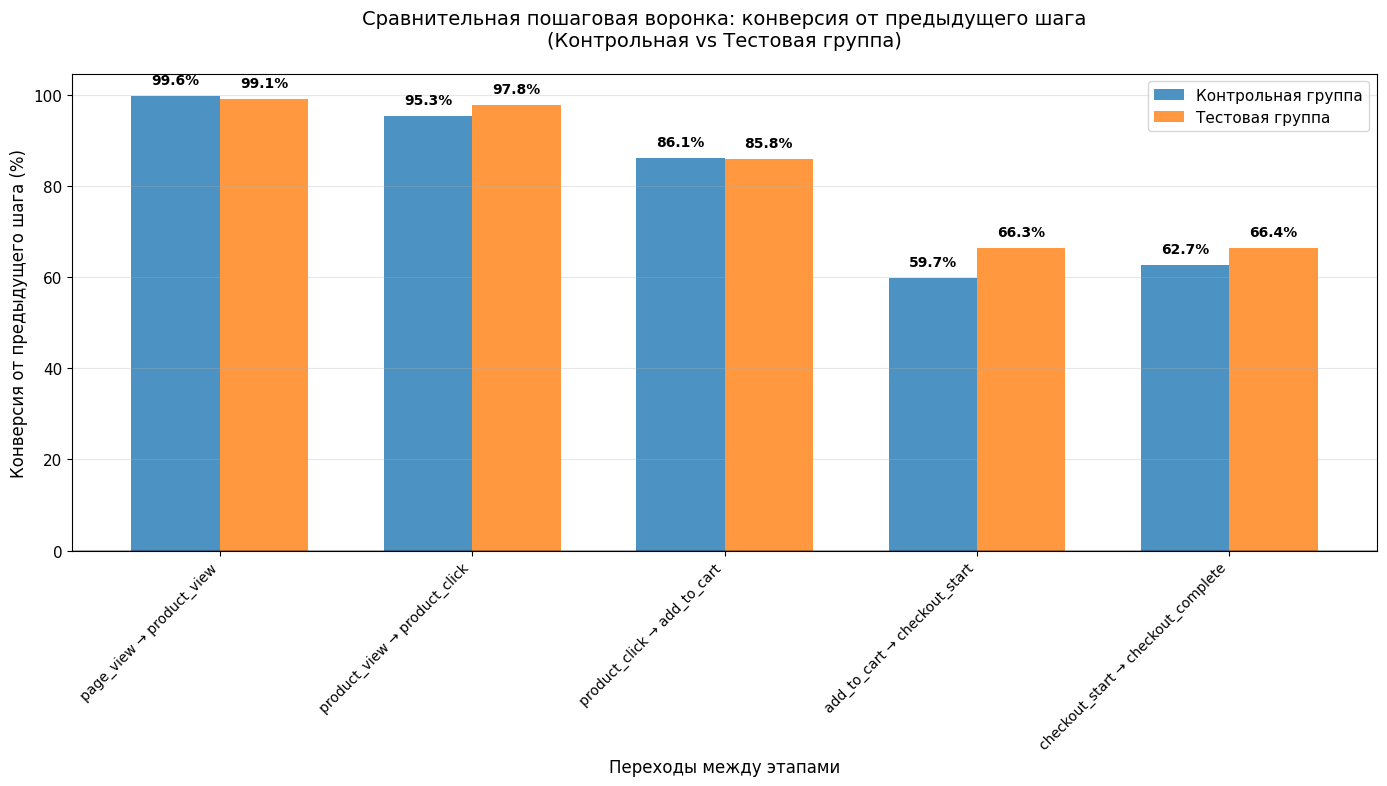

In [99]:
# Исключаем первый шаг, так как у него нет предыдущего шага (NaN)
steps_without_first = control_funnel['step'][1:]
control_conv_prev = control_funnel['conversion_from_previous_%'][1:].fillna(0)
test_conv_prev = test_funnel['conversion_from_previous_%'][1:].fillna(0)

plt.figure(figsize=(14, 8))

# Определяем положение столбцов (сдвиг для каждой группы)
x_pos = np.arange(len(steps_without_first))
width = 0.35

# Строим столбцы для контрольной группы (синий)
bars_control = plt.bar(x_pos - width/2, control_conv_prev, 
                      width, label='Контрольная группа', color='#1f77b4', alpha=0.8)

# Строим столбцы для тестовой группы (оранжевый)
bars_test = plt.bar(x_pos + width/2, test_conv_prev, 
                   width, label='Тестовая группа', color='#ff7f0e', alpha=0.8)

# Добавляем подписи на столбцах
for i, (bar_control, bar_test, control_conv, test_conv) in enumerate(zip(bars_control, bars_test,
                                                                        control_conv_prev,
                                                                        test_conv_prev)):
    # Подписи для контрольной группы
    plt.text(bar_control.get_x() + bar_control.get_width()/2, bar_control.get_height() + 2,
             f'{control_conv}%', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Подписи для тестовой группы
    plt.text(bar_test.get_x() + bar_test.get_width()/2, bar_test.get_height() + 2,
             f'{test_conv}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Настройка осей
plt.xlabel('Переходы между этапами', fontsize=12)
plt.ylabel('Конверсия от предыдущего шага (%)', fontsize=12)
plt.title('Сравнительная пошаговая воронка: конверсия от предыдущего шага\n(Контрольная vs Тестовая группа)', fontsize=14, pad=20)
plt.xticks(x_pos, [f'{prev} → {curr}' for prev, curr in zip(control_funnel['step'][:-1], control_funnel['step'][1:])], 
           rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Легенда
plt.legend(fontsize=11)

# Добавляем линию нуля
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()


In [100]:
# Получаем данные для конверсии в покупку (checkout_complete)
checkout_step_index = funnel_steps.index('checkout_complete')

control_purchasers = control_funnel['users'].iloc[checkout_step_index]
test_purchasers = test_funnel['users'].iloc[checkout_step_index]

control_total = control_funnel['users'].iloc[0]
test_total = test_funnel['users'].iloc[0]

# Z-тест пропорций для конверсии в покупку
count = [test_purchasers, control_purchasers]
nobs = [test_total, control_total]
stat, p_value = proportions_ztest(count, nobs)

# Вывод результатов
print("Z-тест для конверсии в покупку (checkout_complete):")
print("=" * 50)
print(f"Контрольная группа (A): {control_purchasers}/{control_total} = {(control_purchasers/control_total*100):.2f}%")
print(f"Тестовая группа (B): {test_purchasers}/{test_total} = {(test_purchasers/test_total*100):.2f}%")
print(f"Z-статистика: {stat:.4f}")
print(f"P-значение: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    improvement = ((test_purchasers/test_total) - (control_purchasers/control_total)) * 100
    print(f"Результат: СТАТИСТИЧЕСКИ ЗНАЧИМЫЙ (p < {alpha})")
    if improvement > 0:
        print(f"Эффект: УВЕЛИЧЕНИЕ конверсии на {improvement:.2f}%")
    else:
        print(f"Эффект: СНИЖЕНИЕ конверсии на {abs(improvement):.2f}%")
else:
    print(f"Результат: НЕТ СТАТИСТИЧЕСКИ ЗНАЧИМОЙ РАЗНИЦЫ (p >= {alpha})")

Z-тест для конверсии в покупку (checkout_complete):
Контрольная группа (A): 79/258 = 30.62%
Тестовая группа (B): 85/232 = 36.64%
Z-статистика: 1.4095
P-значение: 0.1587
Результат: НЕТ СТАТИСТИЧЕСКИ ЗНАЧИМОЙ РАЗНИЦЫ (p >= 0.05)


In [101]:
# Гипотезы:
# H0: средняя выручка на пользователя TikTok в группе тестовой НЕ выше, чем в группе контрольной. p_A <= p_B
# H1: средняя выручка на пользователя TikTok в группе тестовой выше, чем в группе контрольной. p_B > p_A
    
# Контрольная группа (A)
control_user_ids = pa_diploma_AB_split_users[pa_diploma_AB_split_users['group'] == 'control']['user_id'].tolist()
control_orders = orders_experiment[orders_experiment['user_id'].isin(control_user_ids)]
control_revenue = control_orders.groupby('user_id')['total_price'].sum().reset_index()
control_revenue['total_price'] = control_revenue['total_price'] * 0.05  # 5% комиссия

# Тестовая группа (B)
test_user_ids = pa_diploma_AB_split_users[pa_diploma_AB_split_users['group'] == 'treatment']['user_id'].tolist()
test_orders = orders_experiment[orders_experiment['user_id'].isin(test_user_ids)]
test_revenue = test_orders.groupby('user_id')['total_price'].sum().reset_index()
test_revenue['total_price'] = test_revenue['total_price'] * 0.05  # 5% комиссия

# Создаем полные списки пользователей с выручкой (включая 0 для неплатящих)
control_all_users = pd.DataFrame({'user_id': control_user_ids})
control_all_users = control_all_users.merge(control_revenue, on='user_id', how='left')
control_all_users['total_price'] = control_all_users['total_price'].fillna(0)
control_arpu = control_all_users['total_price']

test_all_users = pd.DataFrame({'user_id': test_user_ids})
test_all_users = test_all_users.merge(test_revenue, on='user_id', how='left')
test_all_users['total_price'] = test_all_users['total_price'].fillna(0)
test_arpu = test_all_users['total_price']

# T-тест
stat, p_value = ttest_ind(control_arpu, test_arpu, equal_var=False, alternative="less")

# Вывод результатов
print("T-тест для ARPU:")
print("=" * 40)
print(f"Контрольная группа (A):")
print(f"  Пользователей: {len(control_arpu)}")
print(f"  Средний ARPU: {control_arpu.mean():.2f} руб.")
print(f"  Стандартное отклонение: {control_arpu.std():.2f} руб.")

print(f"\nТестовая группа (B):")
print(f"  Пользователей: {len(test_arpu)}")
print(f"  Средний ARPU: {test_arpu.mean():.2f} руб.")
print(f"  Стандартное отклонение: {test_arpu.std():.2f} руб.")

print(f"\nРезультаты T-теста:")
print(f"T-статистика: {stat:.4f}")
print(f"P-значение: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    diff = test_arpu.mean() - control_arpu.mean()
    print(f"Результат: СТАТИСТИЧЕСКИ ЗНАЧИМЫЙ (p < {alpha})")
    if diff > 0:
        print(f"Эффект: УВЕЛИЧЕНИЕ ARPU на {diff:.2f} руб.")
    else:
        print(f"Эффект: СНИЖЕНИЕ ARPU на {abs(diff):.2f} руб.")
else:
    print(f"Результат: НЕТ СТАТИСТИЧЕСКИ ЗНАЧИМОЙ РАЗНИЦЫ (p >= {alpha})")

T-тест для ARPU:
Контрольная группа (A):
  Пользователей: 1503
  Средний ARPU: 12.59 руб.
  Стандартное отклонение: 143.04 руб.

Тестовая группа (B):
  Пользователей: 1465
  Средний ARPU: 131.25 руб.
  Стандартное отклонение: 754.89 руб.

Результаты T-теста:
T-статистика: -5.9139
P-значение: 0.0000
Результат: СТАТИСТИЧЕСКИ ЗНАЧИМЫЙ (p < 0.05)
Эффект: УВЕЛИЧЕНИЕ ARPU на 118.66 руб.


In [102]:
# Расчет ARPPU для каждой группы (только платящие пользователи)

# Гипотезы:
# H0: средняя выручка на плательщика TikTok в группе тестовой НЕ выше, чем в группе контрольной. p_A <= p_B
# H1: средняя выручка на плательщика TikTok в группе тестовой выше, чем в группе контрольной. p_B > p_A

# Контрольная группа (A)
control_user_ids = pa_diploma_AB_split_users[pa_diploma_AB_split_users['group'] == 'control']['user_id'].tolist()
control_orders = orders_experiment[orders_experiment['user_id'].isin(control_user_ids)]
control_paying_users = control_orders['user_id'].unique()
control_paying_revenue = control_orders.groupby('user_id')['total_price'].sum().reset_index()
control_paying_revenue['total_price'] = control_paying_revenue['total_price'] * 0.05  # 5% комиссия
control_arppu = control_paying_revenue['total_price']

# Тестовая группа (B)
test_user_ids = pa_diploma_AB_split_users[pa_diploma_AB_split_users['group'] == 'treatment']['user_id'].tolist()
test_orders = orders_experiment[orders_experiment['user_id'].isin(test_user_ids)]
test_paying_users = test_orders['user_id'].unique()
test_paying_revenue = test_orders.groupby('user_id')['total_price'].sum().reset_index()
test_paying_revenue['total_price'] = test_paying_revenue['total_price'] * 0.05  # 5% комиссия
test_arppu = test_paying_revenue['total_price']

# T-тест
stat, p_value = ttest_ind(control_arppu, test_arppu, equal_var=False, alternative="less")

# Вывод результатов
print("T-тест для ARPPU:")
print("=" * 40)
print(f"Контрольная группа (A):")
print(f"  Платящих пользователей: {len(control_arppu)}")
print(f"  Средний ARPPU: {control_arppu.mean():.2f} руб.")
print(f"  Стандартное отклонение: {control_arppu.std():.2f} руб.")

print(f"\nТестовая группа (B):")
print(f"  Платящих пользователей: {len(test_arppu)}")
print(f"  Средний ARPPU: {test_arppu.mean():.2f} руб.")
print(f"  Стандартное отклонение: {test_arppu.std():.2f} руб.")

print(f"\nРезультаты T-теста:")
print(f"T-статистика: {stat:.4f}")
print(f"P-значение: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    diff = test_arppu.mean() - control_arppu.mean()
    print(f"Результат: СТАТИСТИЧЕСКИ ЗНАЧИМЫЙ (p < {alpha})")
    if diff > 0:
        print(f"Эффект: УВЕЛИЧЕНИЕ ARPPU на {diff:.2f} руб.")
    else:
        print(f"Эффект: СНИЖЕНИЕ ARPPU на {abs(diff):.2f} руб.")
else:
    print(f"Результат: НЕТ СТАТИСТИЧЕСКИ ЗНАЧИМОЙ РАЗНИЦЫ (p >= {alpha})")

T-тест для ARPPU:
Контрольная группа (A):
  Платящих пользователей: 16
  Средний ARPPU: 1182.42 руб.
  Стандартное отклонение: 757.26 руб.

Тестовая группа (B):
  Платящих пользователей: 110
  Средний ARPPU: 1748.00 руб.
  Стандартное отклонение: 2191.33 руб.

Результаты T-теста:
T-статистика: -2.0060
P-значение: 0.0246
Результат: СТАТИСТИЧЕСКИ ЗНАЧИМЫЙ (p < 0.05)
Эффект: УВЕЛИЧЕНИЕ ARPPU на 565.58 руб.


In [103]:
# Расчет AOV для каждой группы (средний чек по заказам)

# Гипотезы:
# H0: средний чек в группе тестовой НЕ выше, чем в группе контрольной. p_A <= p_B
# H1: средний чек в группе тестовой выше, чем в группе контрольной. p_B > p_A

# Контрольная группа (A)
control_user_ids = pa_diploma_AB_split_users[pa_diploma_AB_split_users['group'] == 'control']['user_id'].tolist()
control_orders = orders_experiment[orders_experiment['user_id'].isin(control_user_ids)]
control_aov_data = control_orders['total_price'] * 0.05  # 5% комиссия

# Тестовая группа (B)
test_user_ids = pa_diploma_AB_split_users[pa_diploma_AB_split_users['group'] == 'treatment']['user_id'].tolist()
test_orders = orders_experiment[orders_experiment['user_id'].isin(test_user_ids)]
test_aov_data = test_orders['total_price'] * 0.05  # 5% комиссия

# T-тест
stat, p_value = ttest_ind(control_aov_data, test_aov_data, equal_var=False, alternative="less")

# Вывод результатов
print("T-тест для AOV (средний чек):")
print("=" * 40)
print(f"Контрольная группа (A):")
print(f"  Количество заказов: {len(control_aov_data)}")
print(f"  Средний чек (AOV): {control_aov_data.mean():.2f} руб.")
print(f"  Стандартное отклонение: {control_aov_data.std():.2f} руб.")

print(f"\nТестовая группа (B):")
print(f"  Количество заказов: {len(test_aov_data)}")
print(f"  Средний чек (AOV): {test_aov_data.mean():.2f} руб.")
print(f"  Стандартное отклонение: {test_aov_data.std():.2f} руб.")

print(f"\nРезультаты T-теста:")
print(f"T-статистика: {stat:.4f}")
print(f"P-значение: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    diff = test_aov_data.mean() - control_aov_data.mean()
    print(f"Результат: СТАТИСТИЧЕСКИ ЗНАЧИМЫЙ (p < {alpha})")
    if diff > 0:
        print(f"Эффект: УВЕЛИЧЕНИЕ среднего чека на {diff:.2f} руб.")
    else:
        print(f"Эффект: СНИЖЕНИЕ среднего чека на {abs(diff):.2f} руб.")
else:
    print(f"Результат: НЕТ СТАТИСТИЧЕСКИ ЗНАЧИМОЙ РАЗНИЦЫ (p >= {alpha})")

T-тест для AOV (средний чек):
Контрольная группа (A):
  Количество заказов: 24
  Средний чек (AOV): 788.28 руб.
  Стандартное отклонение: 705.43 руб.

Тестовая группа (B):
  Количество заказов: 231
  Средний чек (AOV): 832.38 руб.
  Стандартное отклонение: 1134.47 руб.

Результаты T-теста:
T-статистика: -0.2719
P-значение: 0.3936
Результат: НЕТ СТАТИСТИЧЕСКИ ЗНАЧИМОЙ РАЗНИЦЫ (p >= 0.05)


In [104]:
# Проведение t-test для общей выручки
# Создаем массивы выручки по пользователям для каждой группы

# Гипотезы:
# H0: обшая выручка в группе тестовой НЕ выше, чем в группе контрольной. p_A <= p_B
# H1: обшая выручка в группе тестовой выше, чем в группе контрольной. p_B > p_A

# Контрольная группа (A)
control_user_ids = pa_diploma_AB_split_users[pa_diploma_AB_split_users['group'] == 'control']['user_id'].tolist()
control_orders = orders_experiment[orders_experiment['user_id'].isin(control_user_ids)]
control_revenue_per_user = control_orders.groupby('user_id')['total_price'].sum() * 0.05

# Создаем полный массив с выручкой для всех пользователей контрольной группы
control_all_users = pd.DataFrame({'user_id': control_user_ids})
control_all_users = control_all_users.merge(
    control_revenue_per_user.reset_index(name='revenue'), 
    on='user_id', 
    how='left'
)
control_all_users['revenue'] = control_all_users['revenue'].fillna(0)
control_revenue_array = control_all_users['revenue'].values

# Тестовая группа (B)
test_user_ids = pa_diploma_AB_split_users[pa_diploma_AB_split_users['group'] == 'treatment']['user_id'].tolist()
test_orders = orders_experiment[orders_experiment['user_id'].isin(test_user_ids)]
test_revenue_per_user = test_orders.groupby('user_id')['total_price'].sum() * 0.05

# Создаем полный массив с выручкой для всех пользователей тестовой группы
test_all_users = pd.DataFrame({'user_id': test_user_ids})
test_all_users = test_all_users.merge(
    test_revenue_per_user.reset_index(name='revenue'), 
    on='user_id', 
    how='left'
)
test_all_users['revenue'] = test_all_users['revenue'].fillna(0)
test_revenue_array = test_all_users['revenue'].values

# T-тест
stat, p_value = ttest_ind(control_revenue_array, test_revenue_array, equal_var=False, alternative="less")

# Вывод результатов t-test
print("T-тест для общей выручки:")
print("=" * 40)
print(f"Контрольная группа (A):")
print(f"  Пользователей: {len(control_revenue_array)}")
print(f"  Средняя выручка на пользователя: {control_revenue_array.mean():.2f} руб.")
print(f"  Общая выручка: {control_revenue_array.sum():.2f} руб.")

print(f"\nТестовая группа (B):")
print(f"  Пользователей: {len(test_revenue_array)}")
print(f"  Средняя выручка на пользователя: {test_revenue_array.mean():.2f} руб.")
print(f"  Общая выручка: {test_revenue_array.sum():.2f} руб.")

print(f"\nРезультаты T-теста:")
print(f"T-статистика: {stat:.4f}")
print(f"P-значение: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    diff = test_revenue_array.mean() - control_revenue_array.mean()
    print(f"\nРезультат: СТАТИСТИЧЕСКИ ЗНАЧИМЫЙ (p < {alpha})")
    if diff > 0:
        print(f"Эффект: УВЕЛИЧЕНИЕ выручки на пользователя на {diff:.2f} руб.")
    else:
        print(f"Эффект: СНИЖЕНИЕ выручки на пользователя на {abs(diff):.2f} руб.")
else:
    print(f"\nРезультат: НЕТ СТАТИСТИЧЕСКИ ЗНАЧИМОЙ РАЗНИЦЫ (p >= {alpha})")

# Процентное изменение
percent_change = ((test_revenue_array.mean() / control_revenue_array.mean() - 1) * 100)
print(f"\nПроцентное изменение средней выручки: {percent_change:.2f}%")

T-тест для общей выручки:
Контрольная группа (A):
  Пользователей: 1503
  Средняя выручка на пользователя: 12.59 руб.
  Общая выручка: 18918.65 руб.

Тестовая группа (B):
  Пользователей: 1465
  Средняя выручка на пользователя: 131.25 руб.
  Общая выручка: 192279.85 руб.

Результаты T-теста:
T-статистика: -5.9139
P-значение: 0.0000

Результат: СТАТИСТИЧЕСКИ ЗНАЧИМЫЙ (p < 0.05)
Эффект: УВЕЛИЧЕНИЕ выручки на пользователя на 118.66 руб.

Процентное изменение средней выручки: 942.71%


## Выводы по этапу 5

Представьте ключевые выводы в текстовом виде здесь или приложите ссылку на документ с презентацией.

Не забудьте предоставить доступ на просмотр и комментирование документа.

Суммарно было отобрано 2968 пользователей, однако в тесте суммарно участвовали 490, так как, вероятно, бОльшая часть не совершала активных действий в январе 2025 года во время проведения теста. Вероятно, стоило отобрать изначально выборку больше.

После внедрения бонуса ключевая метрика (конверсия в покупку) увеличилась на 6%, а именно стало 36.6% вместо 30.6%. При этом при проведении z-теста пропорций статистической разницы обнаружено не было.

По барьерным метрикам - средняя выручка на пользователя показала существенный прирост (131.25 руб вместо 12.59 руб), однако там высокое стандартное отклонение в обеих группах и стоит посмотреть более внимательно на метрику ARPPU.

ARPPU показало существенно значимую разницу, а именно стало 1748.00 руб вместо 1182.42 руб, прирост составил 565.58 руб. Но тут стоит учесть, что в контрольной группе было 16 платящих пользователей, а в тестовой - 110. Корректность теста на выборке в 16 человек сомнительна.

Средний чек с заказа вырос, составил 832.38 вместо 788.28 руб, рост составил 44.10 руб. Рост выручки не оказался статистически значимым, однако тут также есть проблема с количеством заказов - 24 в контрольной группе и 231 в тестовой. Здесь проблема похожа с ARPPU, так как очень низкий размер выборки в контрольной группе.

Общая выручка также показала рост, пропорциональный ARPPU, однако этот показатель тоже можно поставить под сомнение.

Считаю, что если и работать с сегментом ТикТок, то стоит провести другой эксперимент. Например, сделать две группы тестовых - с бонусом 5% и 10%, также увеличить выборку пользователей. Также, как вариант, можно провести тест по другой гипотезе. Например, снизить бюджет на TikTok  и перераспределить эти средства в Affiliate и Google Ads. Эти каналы показывают гораздо более существенный доход и их стоит развивать. А пользователи ТикТока покажут кратковременный эффект от бонуса, но в дальнейшем есть большие риски, что они пропадут и не станут делать покупки.